In [1]:
import requests
import pandas as pd
import json
#from collections import OrderedDict
#from pyjstat import pyjstat
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#r = requests.get('https://ws.cso.ie/public/api.jsonrpc?data=%7B%22jsonrpc%22:%222.0%22,%22method%22:%22PxStat.Data.Cube_API.ReadDataset%22,%22params%22:%7B%22class%22:%22query%22,%22id%22:%5B%5D,%22dimension%22:%7B%7D,%22extension%22:%7B%22pivot%22:null,%22codes%22:false,%22language%22:%7B%22code%22:%22en%22%7D,%22format%22:%7B%22type%22:%22JSON-stat%22,%22version%22:%222.0%22%7D,%22matrix%22:%22TAM07%22%7D,%22version%22:%222.0%22%7D%7D')
#x = r.json()
#df = pd.DataFrame(x['result'])
#r = requests.get('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/TAM07/JSON-stat/2.0/en')
#df = pd.read_json(r.text)

#print(r.text)

In [2]:
pd.set_option('display.max_columns',None)

## Loading dataframe for the Netherlands

In [3]:
dfNd = pd.read_csv('Monthly_figures_on_aviation.csv', sep=';') #Information for Dutch airports
dfNd.tail(10)

Airports            Periods  \
2000  Groningen Airport Eelde  2023 1st quarter*   
2001  Groningen Airport Eelde        2023 April*   
2002  Groningen Airport Eelde          2023 May*   
2003  Groningen Airport Eelde         2023 June*   
2004  Groningen Airport Eelde  2023 2nd quarter*   
2005  Groningen Airport Eelde         2023 July*   
2006  Groningen Airport Eelde       2023 August*   
2007  Groningen Airport Eelde    2023 September*   
2008  Groningen Airport Eelde  2023 3rd quarter*   
2009  Groningen Airport Eelde      2023 October*   

      Aircraft movements/Cross-country flights (number)  \
2000                                               2453   
2001                                               1030   
2002                                               1100   
2003                                               1194   
2004                                               3324   
2005                                               1016   
2006                                               1045   
2007                                               1075   
2008                                               3136   
2009                                                748   

      Aircraft movements/Local flights (number)  \
2000                                      12929   
2001                                       4770   
2002                                       4939   
2003                                       5484   
2004                                      15193   
2005                                       4229   
2006                                       5272   
2007                                       3998   
2008                                      13499   
2009                                       2887   

      Commercial air traffic/Flights/All flights/Total flights (number)  \
2000                                                199                   
2001                                                 61                   
2002                                                126                   
2003                                                126                   
2004                                                313                   
2005                                                126                   
2006                                                157                   
2007                                                122                   
2008                                                405                   
2009                                                119                   

     Commercial air traffic/Flights/All flights/Scheduled (number)  \
2000                                                  0              
2001                                                  0              
2002                                                  0              
2003                                                  0              
2004                                                  0              
2005                                                  0              
2006                                                  0              
2007                                                  0              
2008                                                  0              
2009                                                  0              

      Commercial air traffic/Flights/All flights/Non-scheduled (number)  \
2000                                                199                   
2001                                                 61                   
2002                                                126                   
2003                                                126                   
2004                                                313                   
2005                                                126                   
2006                                                157                   
2007                                   

## Understanding and cleaning the database for use in the analysis

In [4]:
dfNd['Airports'].unique()

array(['Total Dutch airports', 'Amsterdam Airport Schiphol',
       'Rotterdam The Hague Airport', 'Eindhoven Airport',
       'Maastricht Aachen Airport', 'Groningen Airport Eelde'],
      dtype=object)

In [5]:
dfNd['Periods'].unique()

array(['1997', '1998', '1999 January', '1999 February', '1999 March',
       '1999 April', '1999 May', '1999 June', '1999 July', '1999 August',
       '1999 September', '1999 October', '1999 November', '1999 December',
       '1999', '2000 January', '2000 February', '2000 March',
       '2000 April', '2000 May', '2000 June', '2000 July', '2000 August',
       '2000 September', '2000 October', '2000 November', '2000 December',
       '2000', '2001 January', '2001 February', '2001 March',
       '2001 April', '2001 May', '2001 June', '2001 July', '2001 August',
       '2001 September', '2001 October', '2001 November', '2001 December',
       '2001', '2002 January', '2002 February', '2002 March',
       '2002 April', '2002 May', '2002 June', '2002 July', '2002 August',
       '2002 September', '2002 October', '2002 November', '2002 December',
       '2002', '2003 January', '2003 February', '2003 March',
       '2003 April', '2003 May', '2003 June', '2003 July', '2003 August',
       '2003

In [6]:
dfNd[['Year','Month','Quarter']] = dfNd['Periods'].str.split(' ', expand=True) #Dividing the column Periods into year and month, with an extra column to identify information in Quarters to dropp it later

In [7]:
dfNd.tail()

Airports            Periods  \
2005  Groningen Airport Eelde         2023 July*   
2006  Groningen Airport Eelde       2023 August*   
2007  Groningen Airport Eelde    2023 September*   
2008  Groningen Airport Eelde  2023 3rd quarter*   
2009  Groningen Airport Eelde      2023 October*   

      Aircraft movements/Cross-country flights (number)  \
2005                                               1016   
2006                                               1045   
2007                                               1075   
2008                                               3136   
2009                                                748   

      Aircraft movements/Local flights (number)  \
2005                                       4229   
2006                                       5272   
2007                                       3998   
2008                                      13499   
2009                                       2887   

      Commercial air traffic/Flights/All flights/Total flights (number)  \
2005                                                126                   
2006                                                157                   
2007                                                122                   
2008                                                405                   
2009                                                119                   

     Commercial air traffic/Flights/All flights/Scheduled (number)  \
2005                                                  0              
2006                                                  0              
2007                                                  0              
2008                                                  0              
2009                                                  0              

      Commercial air traffic/Flights/All flights/Non-scheduled (number)  \
2005                                                126                   
2006                                                157                   
2007                                                122                   
2008                                                405                   
2009                                                119                   

      Commercial air traffic/Flights/Arrivals/Total arrivals flights (number)  \
2005                                                 62                         
2006                                                 73                         
2007                                                 59                         
2008                                                194                         
2009                                                 56                         

     Commercial air traffic/Flights/Arrivals/Scheduled (number)  \
2005                                                  0           
2006                                                  0           
2007                                                  0           
2008                                                  0           
2009                                                  0           

      Commercial air traffic/Flights/Arrivals/Non-scheduled (number)  \
2005                                                 62                
2006                                                 73                
2007                                                 59                
2008                                                194                
2009                                                 56                

      Commercial air traffic/Flights/Departures/Total departures flights (number)  \
2005                                                 64                             
2006                                                 84                             
2007                                                 63                             
2008                                                211     

In [8]:
dfNd.Year.unique()

array(['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2022*', '2023'], dtype=object)

In [9]:
dfNd.Month.unique()

array([None, 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December',
       '1st', '2nd', '3rd', '4th', 'January*', 'February*', 'March*',
       'April*', 'May*', 'June*', 'July*', 'August*', 'September*',
       'October*', 'November*', 'December*'], dtype=object)

In [10]:
dfNd.Quarter.unique()

array([None, 'quarter', 'quarter*'], dtype=object)

In [11]:
dfNd.loc[dfNd["Month"] == "January*", "Month"] = "January" #Values with * are not confirmed yet, but they will be used as final for the study
dfNd.loc[dfNd["Month"] == "February*", "Month"] = "February"
dfNd.loc[dfNd["Month"] == "March*", "Month"] = "March"
dfNd.loc[dfNd["Month"] == "April*", "Month"] = "April"
dfNd.loc[dfNd["Month"] == "May*", "Month"] = "May"
dfNd.loc[dfNd["Month"] == "June*", "Month"] = "June"
dfNd.loc[dfNd["Month"] == "July*", "Month"] = "July"
dfNd.loc[dfNd["Month"] == "August*", "Month"] = "August"
dfNd.loc[dfNd["Month"] == "September*", "Month"] = "September"
dfNd.loc[dfNd["Month"] == "October*", "Month"] = "October"
dfNd.loc[dfNd["Month"] == "November*", "Month"] = "November"
dfNd.loc[dfNd["Month"] == "December*", "Month"] = "December"

In [12]:
dfNd.Month.unique()

array([None, 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December',
       '1st', '2nd', '3rd', '4th'], dtype=object)

In [13]:
dfNd = dfNd.loc[(dfNd['Month']!='1st') & (dfNd['Month']!='2nd') & (dfNd['Month']!='3rd') & (dfNd['Month']!='4th')] #Filtering the database so it is per month

In [14]:
dfNd.shape

(1944, 107)

In [15]:
dfNd.Month.unique()

array([None, 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [16]:
dfNd.tail()

Airports          Periods  \
2003  Groningen Airport Eelde       2023 June*   
2005  Groningen Airport Eelde       2023 July*   
2006  Groningen Airport Eelde     2023 August*   
2007  Groningen Airport Eelde  2023 September*   
2009  Groningen Airport Eelde    2023 October*   

      Aircraft movements/Cross-country flights (number)  \
2003                                               1194   
2005                                               1016   
2006                                               1045   
2007                                               1075   
2009                                                748   

      Aircraft movements/Local flights (number)  \
2003                                       5484   
2005                                       4229   
2006                                       5272   
2007                                       3998   
2009                                       2887   

      Commercial air traffic/Flights/All flights/Total flights (number)  \
2003                                                126                   
2005                                                126                   
2006                                                157                   
2007                                                122                   
2009                                                119                   

     Commercial air traffic/Flights/All flights/Scheduled (number)  \
2003                                                  0              
2005                                                  0              
2006                                                  0              
2007                                                  0              
2009                                                  0              

      Commercial air traffic/Flights/All flights/Non-scheduled (number)  \
2003                                                126                   
2005                                                126                   
2006                                                157                   
2007                                                122                   
2009                                                119                   

      Commercial air traffic/Flights/Arrivals/Total arrivals flights (number)  \
2003                                                 64                         
2005                                                 62                         
2006                                                 73                         
2007                                                 59                         
2009                                                 56                         

     Commercial air traffic/Flights/Arrivals/Scheduled (number)  \
2003                                                  0           
2005                                                  0           
2006                                                  0           
2007                                                  0           
2009                                                  0           

      Commercial air traffic/Flights/Arrivals/Non-scheduled (number)  \
2003                                                 64                
2005                                                 62                
2006                                                 73                
2007                                                 59                
2009                                                 56                

      Commercial air traffic/Flights/Departures/Total departures flights (number)  \
2003                                                 62                             
2005                                                 64                             
2006                                                 84                             
2007                                                 63                 

In [17]:
dfNd.Quarter.unique()

array([None], dtype=object)

In [18]:
dfNd = dfNd.drop('Quarter', axis='columns')

In [19]:
dfNd = dfNd.fillna(value=np.nan)

In [20]:
dfNd.head()

Airports        Periods  \
0  Total Dutch airports           1997   
1  Total Dutch airports           1998   
2  Total Dutch airports   1999 January   
3  Total Dutch airports  1999 February   
4  Total Dutch airports     1999 March   

   Aircraft movements/Cross-country flights (number)  \
0                                             467579   
1                                             485852   
2                                              36810   
3                                              34356   
4                                              41290   

   Aircraft movements/Local flights (number)  \
0                                     206214   
1                                     201265   
2                                      14868   
3                                      11314   
4                                      18152   

   Commercial air traffic/Flights/All flights/Total flights (number)  \
0                                             400118                   
1                                             425608                   
2                                              33145                   
3                                              30912                   
4                                              35591                   

  Commercial air traffic/Flights/All flights/Scheduled (number)  \
0                                             364095              
1                                             387560              
2                                              31222              
3                                              29015              
4                                              33278              

   Commercial air traffic/Flights/All flights/Non-scheduled (number)  \
0                                              36023                   
1                                              38048                   
2                                               1923                   
3                                               1897                   
4                                               2313                   

   Commercial air traffic/Flights/Arrivals/Total arrivals flights (number)  \
0                                             200040                         
1                                             212751                         
2                                              16565                         
3                                              15444                         
4                                              17802                         

  Commercial air traffic/Flights/Arrivals/Scheduled (number)  \
0                                             182043           
1                                             193792           
2                                              15616           
3                                              14513           
4                                              16644           

   Commercial air traffic/Flights/Arrivals/Non-scheduled (number)  \
0                                              17997                
1                                              18959                
2                                                949                
3                                                931                
4                                               1158                

   Commercial air traffic/Flights/Departures/Total departures flights (number)  \
0                                             200078                             
1                                             212857                             
2                                              16580                             
3                                              15468                             
4                                              17789                             

  Commercial air traffic/Flights/Departures/Scheduled (number)  \
0                                      

In [21]:
dfNd = dfNd[dfNd['Month'].notna()]

In [22]:
dfNd.head()

Airports        Periods  \
2  Total Dutch airports   1999 January   
3  Total Dutch airports  1999 February   
4  Total Dutch airports     1999 March   
5  Total Dutch airports     1999 April   
6  Total Dutch airports       1999 May   

   Aircraft movements/Cross-country flights (number)  \
2                                              36810   
3                                              34356   
4                                              41290   
5                                              41338   
6                                              44679   

   Aircraft movements/Local flights (number)  \
2                                      14868   
3                                      11314   
4                                      18152   
5                                      18043   
6                                      18932   

   Commercial air traffic/Flights/All flights/Total flights (number)  \
2                                              33145                   
3                                              30912                   
4                                              35591                   
5                                              35832                   
6                                              38376                   

  Commercial air traffic/Flights/All flights/Scheduled (number)  \
2                                              31222              
3                                              29015              
4                                              33278              
5                                              33114              
6                                              34138              

   Commercial air traffic/Flights/All flights/Non-scheduled (number)  \
2                                               1923                   
3                                               1897                   
4                                               2313                   
5                                               2718                   
6                                               4238                   

   Commercial air traffic/Flights/Arrivals/Total arrivals flights (number)  \
2                                              16565                         
3                                              15444                         
4                                              17802                         
5                                              17910                         
6                                              19200                         

  Commercial air traffic/Flights/Arrivals/Scheduled (number)  \
2                                              15616           
3                                              14513           
4                                              16644           
5                                              16552           
6                                              17066           

   Commercial air traffic/Flights/Arrivals/Non-scheduled (number)  \
2                                                949                
3                                                931                
4                                               1158                
5                                               1358                
6                                               2134                

   Commercial air traffic/Flights/Departures/Total departures flights (number)  \
2                                              16580                             
3                                              15468                             
4                                              17789                             
5                                              17922                             
6                                              19176                             

  Commercial air traffic/Flights/Departures/Scheduled (number)  \
2                                      

In [23]:
dfNd = dfNd.drop('Periods', axis='columns')

In [24]:
dfNd.head()

Airports  Aircraft movements/Cross-country flights (number)  \
2  Total Dutch airports                                              36810   
3  Total Dutch airports                                              34356   
4  Total Dutch airports                                              41290   
5  Total Dutch airports                                              41338   
6  Total Dutch airports                                              44679   

   Aircraft movements/Local flights (number)  \
2                                      14868   
3                                      11314   
4                                      18152   
5                                      18043   
6                                      18932   

   Commercial air traffic/Flights/All flights/Total flights (number)  \
2                                              33145                   
3                                              30912                   
4                                              35591                   
5                                              35832                   
6                                              38376                   

  Commercial air traffic/Flights/All flights/Scheduled (number)  \
2                                              31222              
3                                              29015              
4                                              33278              
5                                              33114              
6                                              34138              

   Commercial air traffic/Flights/All flights/Non-scheduled (number)  \
2                                               1923                   
3                                               1897                   
4                                               2313                   
5                                               2718                   
6                                               4238                   

   Commercial air traffic/Flights/Arrivals/Total arrivals flights (number)  \
2                                              16565                         
3                                              15444                         
4                                              17802                         
5                                              17910                         
6                                              19200                         

  Commercial air traffic/Flights/Arrivals/Scheduled (number)  \
2                                              15616           
3                                              14513           
4                                              16644           
5                                              16552           
6                                              17066           

   Commercial air traffic/Flights/Arrivals/Non-scheduled (number)  \
2                                                949                
3                                                931                
4                                               1158                
5                                               1358                
6                                               2134                

   Commercial air traffic/Flights/Departures/Total departures flights (number)  \
2                                              16580                             
3                                              15468                             
4                                              17789                             
5                                              17922                             
6                                              19176                             

  Commercial air traffic/Flights/Departures/Scheduled (number)  \
2                                              15606             
3                                              14502             
4                           

In [25]:
dfNd = dfNd[ ['Month'] + [ col for col in dfNd.columns if col != 'Month' ] ]
dfNd = dfNd[ ['Year'] + [ col for col in dfNd.columns if col != 'Year' ] ]

In [26]:
dfNd.head()

Year     Month              Airports  \
2  1999   January  Total Dutch airports   
3  1999  February  Total Dutch airports   
4  1999     March  Total Dutch airports   
5  1999     April  Total Dutch airports   
6  1999       May  Total Dutch airports   

   Aircraft movements/Cross-country flights (number)  \
2                                              36810   
3                                              34356   
4                                              41290   
5                                              41338   
6                                              44679   

   Aircraft movements/Local flights (number)  \
2                                      14868   
3                                      11314   
4                                      18152   
5                                      18043   
6                                      18932   

   Commercial air traffic/Flights/All flights/Total flights (number)  \
2                                              33145                   
3                                              30912                   
4                                              35591                   
5                                              35832                   
6                                              38376                   

  Commercial air traffic/Flights/All flights/Scheduled (number)  \
2                                              31222              
3                                              29015              
4                                              33278              
5                                              33114              
6                                              34138              

   Commercial air traffic/Flights/All flights/Non-scheduled (number)  \
2                                               1923                   
3                                               1897                   
4                                               2313                   
5                                               2718                   
6                                               4238                   

   Commercial air traffic/Flights/Arrivals/Total arrivals flights (number)  \
2                                              16565                         
3                                              15444                         
4                                              17802                         
5                                              17910                         
6                                              19200                         

  Commercial air traffic/Flights/Arrivals/Scheduled (number)  \
2                                              15616           
3                                              14513           
4                                              16644           
5                                              16552           
6                                              17066           

   Commercial air traffic/Flights/Arrivals/Non-scheduled (number)  \
2                                                949                
3                                                931                
4                                               1158                
5                                               1358                
6                                               2134                

   Commercial air traffic/Flights/Departures/Total departures flights (number)  \
2                                              16580                             
3                                              15468                             
4                                              17789                             
5                                              17922                             
6                                              19176                             

  Commercial air traffic/Flights/Departures/Scheduled (number)  \
2                    

In [27]:
list(dfNd.columns)

['Year',
 'Month',
 'Airports',
 'Aircraft movements/Cross-country flights (number)',
 'Aircraft movements/Local flights (number)',
 'Commercial air traffic/Flights/All flights/Total flights (number)',
 'Commercial air traffic/Flights/All flights/Scheduled (number)',
 'Commercial air traffic/Flights/All flights/Non-scheduled (number)',
 'Commercial air traffic/Flights/Arrivals/Total arrivals flights (number)',
 'Commercial air traffic/Flights/Arrivals/Scheduled (number)',
 'Commercial air traffic/Flights/Arrivals/Non-scheduled (number)',
 'Commercial air traffic/Flights/Departures/Total departures flights (number)',
 'Commercial air traffic/Flights/Departures/Scheduled (number)',
 'Commercial air traffic/Flights/Departures/Non-scheduled (number)',
 'Commercial air traffic/Passengers/Total passengers/Total passengers (number)',
 'Commercial air traffic/Passengers/Total passengers/Scheduled (number)',
 'Commercial air traffic/Passengers/Total passengers/Non-scheduled (number)',
 'Commerc

In [28]:
dfNd = dfNd.iloc[:, :-29] #To focus on passengers and cargo, getting rid of mail information

In [29]:
list(dfNd.columns)

['Year',
 'Month',
 'Airports',
 'Aircraft movements/Cross-country flights (number)',
 'Aircraft movements/Local flights (number)',
 'Commercial air traffic/Flights/All flights/Total flights (number)',
 'Commercial air traffic/Flights/All flights/Scheduled (number)',
 'Commercial air traffic/Flights/All flights/Non-scheduled (number)',
 'Commercial air traffic/Flights/Arrivals/Total arrivals flights (number)',
 'Commercial air traffic/Flights/Arrivals/Scheduled (number)',
 'Commercial air traffic/Flights/Arrivals/Non-scheduled (number)',
 'Commercial air traffic/Flights/Departures/Total departures flights (number)',
 'Commercial air traffic/Flights/Departures/Scheduled (number)',
 'Commercial air traffic/Flights/Departures/Non-scheduled (number)',
 'Commercial air traffic/Passengers/Total passengers/Total passengers (number)',
 'Commercial air traffic/Passengers/Total passengers/Scheduled (number)',
 'Commercial air traffic/Passengers/Total passengers/Non-scheduled (number)',
 'Commerc

In [30]:
dfNd.columns = dfNd.columns.str.lstrip("Commercial air traffic/")

In [31]:
list(dfNd.columns)

['Year',
 'Month',
 'Airports',
 'Aircraft movements/Cross-country flights (number)',
 'Aircraft movements/Local flights (number)',
 'Flights/All flights/Total flights (number)',
 'Flights/All flights/Scheduled (number)',
 'Flights/All flights/Non-scheduled (number)',
 'Flights/Arrivals/Total arrivals flights (number)',
 'Flights/Arrivals/Scheduled (number)',
 'Flights/Arrivals/Non-scheduled (number)',
 'Flights/Departures/Total departures flights (number)',
 'Flights/Departures/Scheduled (number)',
 'Flights/Departures/Non-scheduled (number)',
 'Passengers/Total passengers/Total passengers (number)',
 'Passengers/Total passengers/Scheduled (number)',
 'Passengers/Total passengers/Non-scheduled (number)',
 'Passengers/Passenger arrivals/Total arrivals passengers (number)',
 'Passengers/Passenger arrivals/Scheduled (number)',
 'Passengers/Passenger arrivals/Non-scheduled (number)',
 'Passengers/Passenger departures/Total departures passengers (number)',
 'Passengers/Passenger departures

In [32]:
list(dfNd.columns)

['Year',
 'Month',
 'Airports',
 'Aircraft movements/Cross-country flights (number)',
 'Aircraft movements/Local flights (number)',
 'Flights/All flights/Total flights (number)',
 'Flights/All flights/Scheduled (number)',
 'Flights/All flights/Non-scheduled (number)',
 'Flights/Arrivals/Total arrivals flights (number)',
 'Flights/Arrivals/Scheduled (number)',
 'Flights/Arrivals/Non-scheduled (number)',
 'Flights/Departures/Total departures flights (number)',
 'Flights/Departures/Scheduled (number)',
 'Flights/Departures/Non-scheduled (number)',
 'Passengers/Total passengers/Total passengers (number)',
 'Passengers/Total passengers/Scheduled (number)',
 'Passengers/Total passengers/Non-scheduled (number)',
 'Passengers/Passenger arrivals/Total arrivals passengers (number)',
 'Passengers/Passenger arrivals/Scheduled (number)',
 'Passengers/Passenger arrivals/Non-scheduled (number)',
 'Passengers/Passenger departures/Total departures passengers (number)',
 'Passengers/Passenger departures

In [33]:
dfNd.head()

Year     Month              Airports  \
2  1999   January  Total Dutch airports   
3  1999  February  Total Dutch airports   
4  1999     March  Total Dutch airports   
5  1999     April  Total Dutch airports   
6  1999       May  Total Dutch airports   

   Aircraft movements/Cross-country flights (number)  \
2                                              36810   
3                                              34356   
4                                              41290   
5                                              41338   
6                                              44679   

   Aircraft movements/Local flights (number)  \
2                                      14868   
3                                      11314   
4                                      18152   
5                                      18043   
6                                      18932   

   Flights/All flights/Total flights (number)  \
2                                       33145   
3                                       30912   
4                                       35591   
5                                       35832   
6                                       38376   

  Flights/All flights/Scheduled (number)  \
2                                  31222   
3                                  29015   
4                                  33278   
5                                  33114   
6                                  34138   

   Flights/All flights/Non-scheduled (number)  \
2                                        1923   
3                                        1897   
4                                        2313   
5                                        2718   
6                                        4238   

   Flights/Arrivals/Total arrivals flights (number)  \
2                                             16565   
3                                             15444   
4                                             17802   
5                                             17910   
6                                             19200   

  Flights/Arrivals/Scheduled (number)  \
2                               15616   
3                               14513   
4                               16644   
5                               16552   
6                               17066   

   Flights/Arrivals/Non-scheduled (number)  \
2                                      949   
3                                      931   
4                                     1158   
5                                     1358   
6                                     2134   

   Flights/Departures/Total departures flights (number)  \
2                                              16580      
3                                              15468      
4                                              17789      
5                                              17922      
6                                              19176      

  Flights/Departures/Scheduled (number)  \
2                                 15606   
3                                 14502   
4                                 16634   
5                                 16562   
6                                 17072   

   Flights/Departures/Non-scheduled (number)  \
2                                        974   
3                                        966   
4                                       1155   
5                                       1360   
6                                       2104   

   Passengers/Total passengers/Total passengers (number)  \
2                                            2439980       
3                                            2405830       
4                                            2905023       
5                                            2983754       
6                                            3399339       

  Passengers/Total passengers/Scheduled (number)  \
2                                        2274958   
3                                       

In [34]:
dfNd = dfNd.iloc[:, :-17] #Getting rid of division per country

In [35]:
list(dfNd.columns) 

['Year',
 'Month',
 'Airports',
 'Aircraft movements/Cross-country flights (number)',
 'Aircraft movements/Local flights (number)',
 'Flights/All flights/Total flights (number)',
 'Flights/All flights/Scheduled (number)',
 'Flights/All flights/Non-scheduled (number)',
 'Flights/Arrivals/Total arrivals flights (number)',
 'Flights/Arrivals/Scheduled (number)',
 'Flights/Arrivals/Non-scheduled (number)',
 'Flights/Departures/Total departures flights (number)',
 'Flights/Departures/Scheduled (number)',
 'Flights/Departures/Non-scheduled (number)',
 'Passengers/Total passengers/Total passengers (number)',
 'Passengers/Total passengers/Scheduled (number)',
 'Passengers/Total passengers/Non-scheduled (number)',
 'Passengers/Passenger arrivals/Total arrivals passengers (number)',
 'Passengers/Passenger arrivals/Scheduled (number)',
 'Passengers/Passenger arrivals/Non-scheduled (number)',
 'Passengers/Passenger departures/Total departures passengers (number)',
 'Passengers/Passenger departures

In [36]:
dfNd = dfNd.drop(['Passengers/Country of origin/destination/Intercontinental/Africa/Africa (number)', #Eliminating the division by countries
 'Passengers/Country of origin/destination/Intercontinental/Africa/North Africa (number)',
 'Passengers/Country of origin/destination/Intercontinental/Africa/West Africa (number)',
 'Passengers/Country of origin/destination/Intercontinental/Africa/Central Africa (number)',
 'Passengers/Country of origin/destination/Intercontinental/Africa/East Africa (number)',
 'Passengers/Country of origin/destination/Intercontinental/Africa/South Africa (number)',
 'Passengers/Country of origin/destination/Intercontinental/America/America (number)',
 'Passengers/Country of origin/destination/Intercontinental/America/North America (number)',
 'Passengers/Country of origin/destination/Intercontinental/America/Central America (number)',
 'Passengers/Country of origin/destination/Intercontinental/America/South America (number)',
 'Passengers/Country of origin/destination/Intercontinental/Asia/Asia (number)',
 'Passengers/Country of origin/destination/Intercontinental/Asia/West Asia (number)',
 'Passengers/Country of origin/destination/Intercontinental/Asia/South-East Asia (number)',
 'Passengers/Country of origin/destination/Intercontinental/Asia/North-East Asia (number)',
 'Passengers/Country of origin/destination/Intercontinental/Oceania (number)',
 'Passengers/Country of origin/destination/Intercontinental/Other/unknown (number)',
 'go/Country of origin/destination/Total country of origin/destination (ton)',
 'go/Country of origin/destination/Europe cargo/Europe total cargo (ton)',
 'go/Country of origin/destination/Europe cargo/EU countries (ton)',
 'go/Country of origin/destination/Europe cargo/Other Europe (ton)',
 'go/Country of origin/destination/Intercontinental cargo/Total intercontinental cargo (ton)',
 'Passengers/Country of origin/destination/Total country of origin/destination (number)',
 'Passengers/Country of origin/destination/Europe/Europe total (number)',
 'Passengers/Country of origin/destination/Europe/EU countries (number)',
 'Passengers/Country of origin/destination/Europe/Other Europe (number)',
 'Passengers/Country of origin/destination/Intercontinental/Total intercontinental passengers (number)',
 'Passengers/Country of origin/destination/Unknown (number)'], axis=1)

In [37]:
dfNd.columns = dfNd.columns.str.replace('Flights/', 'F/') #Shortening column names: F for Flights, P for Passengers and C for Cargo
dfNd.columns = dfNd.columns.str.replace('Passengers/', 'P/')
dfNd.columns = dfNd.columns.str.replace('go/', 'C/')

In [38]:
dfNd.columns = dfNd.columns.str.rstrip(" (number)") #Eliminating the description of the measurement
dfNd.columns = dfNd.columns.str.rstrip(" (ton)")

In [39]:
dfNd = dfNd.rename(columns={'Yea':'Year',
'Aircraft movements/Cross-country flights': 'Cross-country flights', #Cleaning the name of the columns to be used
 'Aircraft movements/Local flights':'Local flights',
 'F/All flights/Total flights':'Total flights',
 'F/All flights/Scheduled':'Scheduled flights',
 'F/All flights/Non-scheduled':'Non-scheduled flights',
 'F/Arrivals/Total arrivals flights':'Total arrival flights',
 'F/Arrivals/Scheduled':'Scheduled arrival flights',
 'F/Arrivals/Non-scheduled':'Non-scheduled arrival flights',
 'F/Departures/Total departures flights':'Total departure flights',
 'F/Departures/Scheduled':'Scheduled departure flights',
 'F/Departures/Non-scheduled':'Non-scheduled departure flights',
 'P/Total passengers/Total passengers':'Total passengers',
 'P/Total passengers/Scheduled':'Scheduled passengers',
 'P/Total passengers/Non-scheduled':'Non-scheduled passengers',
 'P/Passenger arrivals/Total arrivals passengers':'Total arrival passengers',
 'P/Passenger arrivals/Scheduled':'Arrival scheduled passengers',
 'P/Passenger arrivals/Non-scheduled':'Arrival non-scheduled passengers',
 'P/Passenger departures/Total departures passengers':'Total departure passengers',
 'P/Passenger departures/Scheduled':'Departure scheduled passengers',
 'P/Passenger departures/Non-scheduled':'Departure non-scheduled passengers',
 'C/Total carC/Total carg':'Total cargo',
 'C/Total carC/Scheduled carg':'Scheduled cargo',
 'C/Total carC/Non-scheduled carg':'Non-scheduled cargo',
 'C/Unloaded carC/Total unloaded carg':'Total unloaded cargo',
 'C/Unloaded carC/Scheduled carg':'Unloaded scheluled cargo',
 'C/Unloaded carC/Non-scheduled carg':'Unloaded non-scheduled cargo',
 'C/Loaded carC/Total loaded carg':'Total loaded cargo',
 'C/Loaded carC/Scheduled carg':'Loaded scheduled cargo',
 'C/Loaded carC/Non-scheduled carg':'Loaded non-scheduled cargo'
                   })

In [40]:
list(dfNd.columns)

['Year',
 'Month',
 'Airports',
 'Cross-country flights',
 'Local flights',
 'Total flights',
 'Scheduled flights',
 'Non-scheduled flights',
 'Total arrival flights',
 'Scheduled arrival flights',
 'Non-scheduled arrival flights',
 'Total departure flights',
 'Scheduled departure flights',
 'Non-scheduled departure flights',
 'Total passengers',
 'Scheduled passengers',
 'Non-scheduled passengers',
 'Total arrival passengers',
 'Arrival scheduled passengers',
 'Arrival non-scheduled passengers',
 'Total departure passengers',
 'Departure scheduled passengers',
 'Departure non-scheduled passengers',
 'Total cargo',
 'Scheduled cargo',
 'Non-scheduled cargo',
 'Total unloaded cargo',
 'Unloaded scheluled cargo',
 'Unloaded non-scheduled cargo',
 'Total loaded cargo',
 'Loaded scheduled cargo',
 'Loaded non-scheduled cargo']

In [41]:
dfNd.isna().sum() #no NaN values

Year                                  0
Month                                 0
Airports                              0
Cross-country flights                 0
Local flights                         0
Total flights                         0
Scheduled flights                     0
Non-scheduled flights                 0
Total arrival flights                 0
Scheduled arrival flights             0
Non-scheduled arrival flights         0
Total departure flights               0
Scheduled departure flights           0
Non-scheduled departure flights       0
Total passengers                      0
Scheduled passengers                  0
Non-scheduled passengers              0
Total arrival passengers              0
Arrival scheduled passengers          0
Arrival non-scheduled passengers      0
Total departure passengers            0
Departure scheduled passengers        0
Departure non-scheduled passengers    0
Total cargo                           0
Scheduled cargo                       0


In [42]:
dfNd.info() #Several columns are objects when they should be numbers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1788 entries, 2 to 2009
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Year                                1788 non-null   object
 1   Month                               1788 non-null   object
 2   Airports                            1788 non-null   object
 3   Cross-country flights               1788 non-null   int64 
 4   Local flights                       1788 non-null   int64 
 5   Total flights                       1788 non-null   int64 
 6   Scheduled flights                   1788 non-null   object
 7   Non-scheduled flights               1788 non-null   int64 
 8   Total arrival flights               1788 non-null   int64 
 9   Scheduled arrival flights           1788 non-null   object
 10  Non-scheduled arrival flights       1788 non-null   int64 
 11  Total departure flights             1788 non-null   int6

In [43]:
dfNd.head(20)

Year      Month              Airports  Cross-country flights  \
2   1999    January  Total Dutch airports                  36810   
3   1999   February  Total Dutch airports                  34356   
4   1999      March  Total Dutch airports                  41290   
5   1999      April  Total Dutch airports                  41338   
6   1999        May  Total Dutch airports                  44679   
7   1999       June  Total Dutch airports                  44664   
8   1999       July  Total Dutch airports                  46107   
9   1999     August  Total Dutch airports                  45084   
10  1999  September  Total Dutch airports                  44734   
11  1999    October  Total Dutch airports                  44734   
12  1999   November  Total Dutch airports                  41721   
13  1999   December  Total Dutch airports                  38258   
15  2000    January  Total Dutch airports                  40054   
16  2000   February  Total Dutch airports                  40602   
17  2000      March  Total Dutch airports                  43728   
18  2000      April  Total Dutch airports                  43812   
19  2000        May  Total Dutch airports                  47975   
20  2000       June  Total Dutch airports                  46890   
21  2000       July  Total Dutch airports                  47051   
22  2000     August  Total Dutch airports                  47748   

    Local flights  Total flights Scheduled flights  Non-scheduled flights  \
2           14868          33145             31222                   1923   
3           11314          30912             29015                   1897   
4           18152          35591             33278                   2313   
5           18043          35832             33114                   2718   
6           18932          38376             34138                   4238   
7           19476          37971             33966                   4005   
8           18988          39824             34940                   4884   
9           18732          39908             34910                   4998   
10          18298          38969             34641                   4328   
11          15909          39553             35589                   3964   
12          15551          37387             35175                   2212   
13          10401          35119             33105                   2014   
15          11453          36446             34406                   2040   
16          13621          36041             33968                   2073   
17          16187          38790             36251                   2539   
18          17560          38281             34964                   3317   
19          17011          41972             37136                   4836   
20          15620          40483             35712                   4771   
21          14172          42092             36620                   5472   
22          18232          42255             36766                   5489   

    Total arrival flights Scheduled arrival flights  \
2                   16565                     15616   
3                   15444                     14513   
4                   17802                     16644   
5                   17910                     16552   
6                   19200                     17066   
7                   18991                     16983   
8                   19904                     17459   
9                   19961                     17466   
10                  19478                     17319   
11                  19779                     17789   
12                  18704                     17581   
13                  17592                     16584   
15                  18182                     17148   
16                  18024                     16982   
17                  19396                     18121   
18                  19143                     17471   
19                  20

In [44]:
dfNd.columns.to_series().groupby(dfNd.dtypes).groups

{int64: ['Cross-country flights', 'Local flights', 'Total flights', 'Non-scheduled flights', 'Total arrival flights', 'Non-scheduled arrival flights', 'Total departure flights', 'Non-scheduled departure flights', 'Total passengers', 'Non-scheduled passengers', 'Total arrival passengers', 'Arrival non-scheduled passengers', 'Total departure passengers', 'Departure non-scheduled passengers', 'Total cargo', 'Scheduled cargo', 'Non-scheduled cargo', 'Total unloaded cargo', 'Unloaded scheluled cargo', 'Unloaded non-scheduled cargo', 'Total loaded cargo', 'Loaded scheduled cargo', 'Loaded non-scheduled cargo'], object: ['Year', 'Month', 'Airports', 'Scheduled flights', 'Scheduled arrival flights', 'Scheduled departure flights', 'Scheduled passengers', 'Arrival scheduled passengers', 'Departure scheduled passengers']}

In [45]:
dfNd= dfNd.replace({'       .': 0,}) #Cleaning the string causing and error and making it 0

In [46]:
dfNd.iloc[:,3: ] = dfNd.iloc[:,3: ].astype(float)

C:\Users\ruben\AppData\Local\Temp\ipykernel_9112\821131953.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dfNd.iloc[:,3: ] = dfNd.iloc[:,3: ].astype(float)


In [47]:
dfNd['Year'] = dfNd['Year'].astype(int)

In [48]:
dfNd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1788 entries, 2 to 2009
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                1788 non-null   int32  
 1   Month                               1788 non-null   object 
 2   Airports                            1788 non-null   object 
 3   Cross-country flights               1788 non-null   float64
 4   Local flights                       1788 non-null   float64
 5   Total flights                       1788 non-null   float64
 6   Scheduled flights                   1788 non-null   float64
 7   Non-scheduled flights               1788 non-null   float64
 8   Total arrival flights               1788 non-null   float64
 9   Scheduled arrival flights           1788 non-null   float64
 10  Non-scheduled arrival flights       1788 non-null   float64
 11  Total departure flights             1788 no

In [49]:
#list(dfNd.drop(['Year','Month','Airports'],axis=1).columns.values)

In [50]:
print(list(dfNd.index.values))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239

## Understanding data throughout the years (for Total Dutch Airports)

In [51]:
dfNdTotal = dfNd[(dfNd['Airports']=='Total Dutch airports') & (dfNd['Year']>2014)]

In [52]:
data = dfNdTotal.set_index(['Year','Month'])

In [53]:
print(dfNdTotal.groupby(['Year'])['Total flights'].sum())

Year
2015    504967.0
2016    535242.0
2017    555785.0
2018    564546.0
2019    566031.0
2020    258226.0
2021    303062.0
2022    462600.0
2023    426745.0
Name: Total flights, dtype: float64


<Axes: xlabel='Year', ylabel='Total flights'>

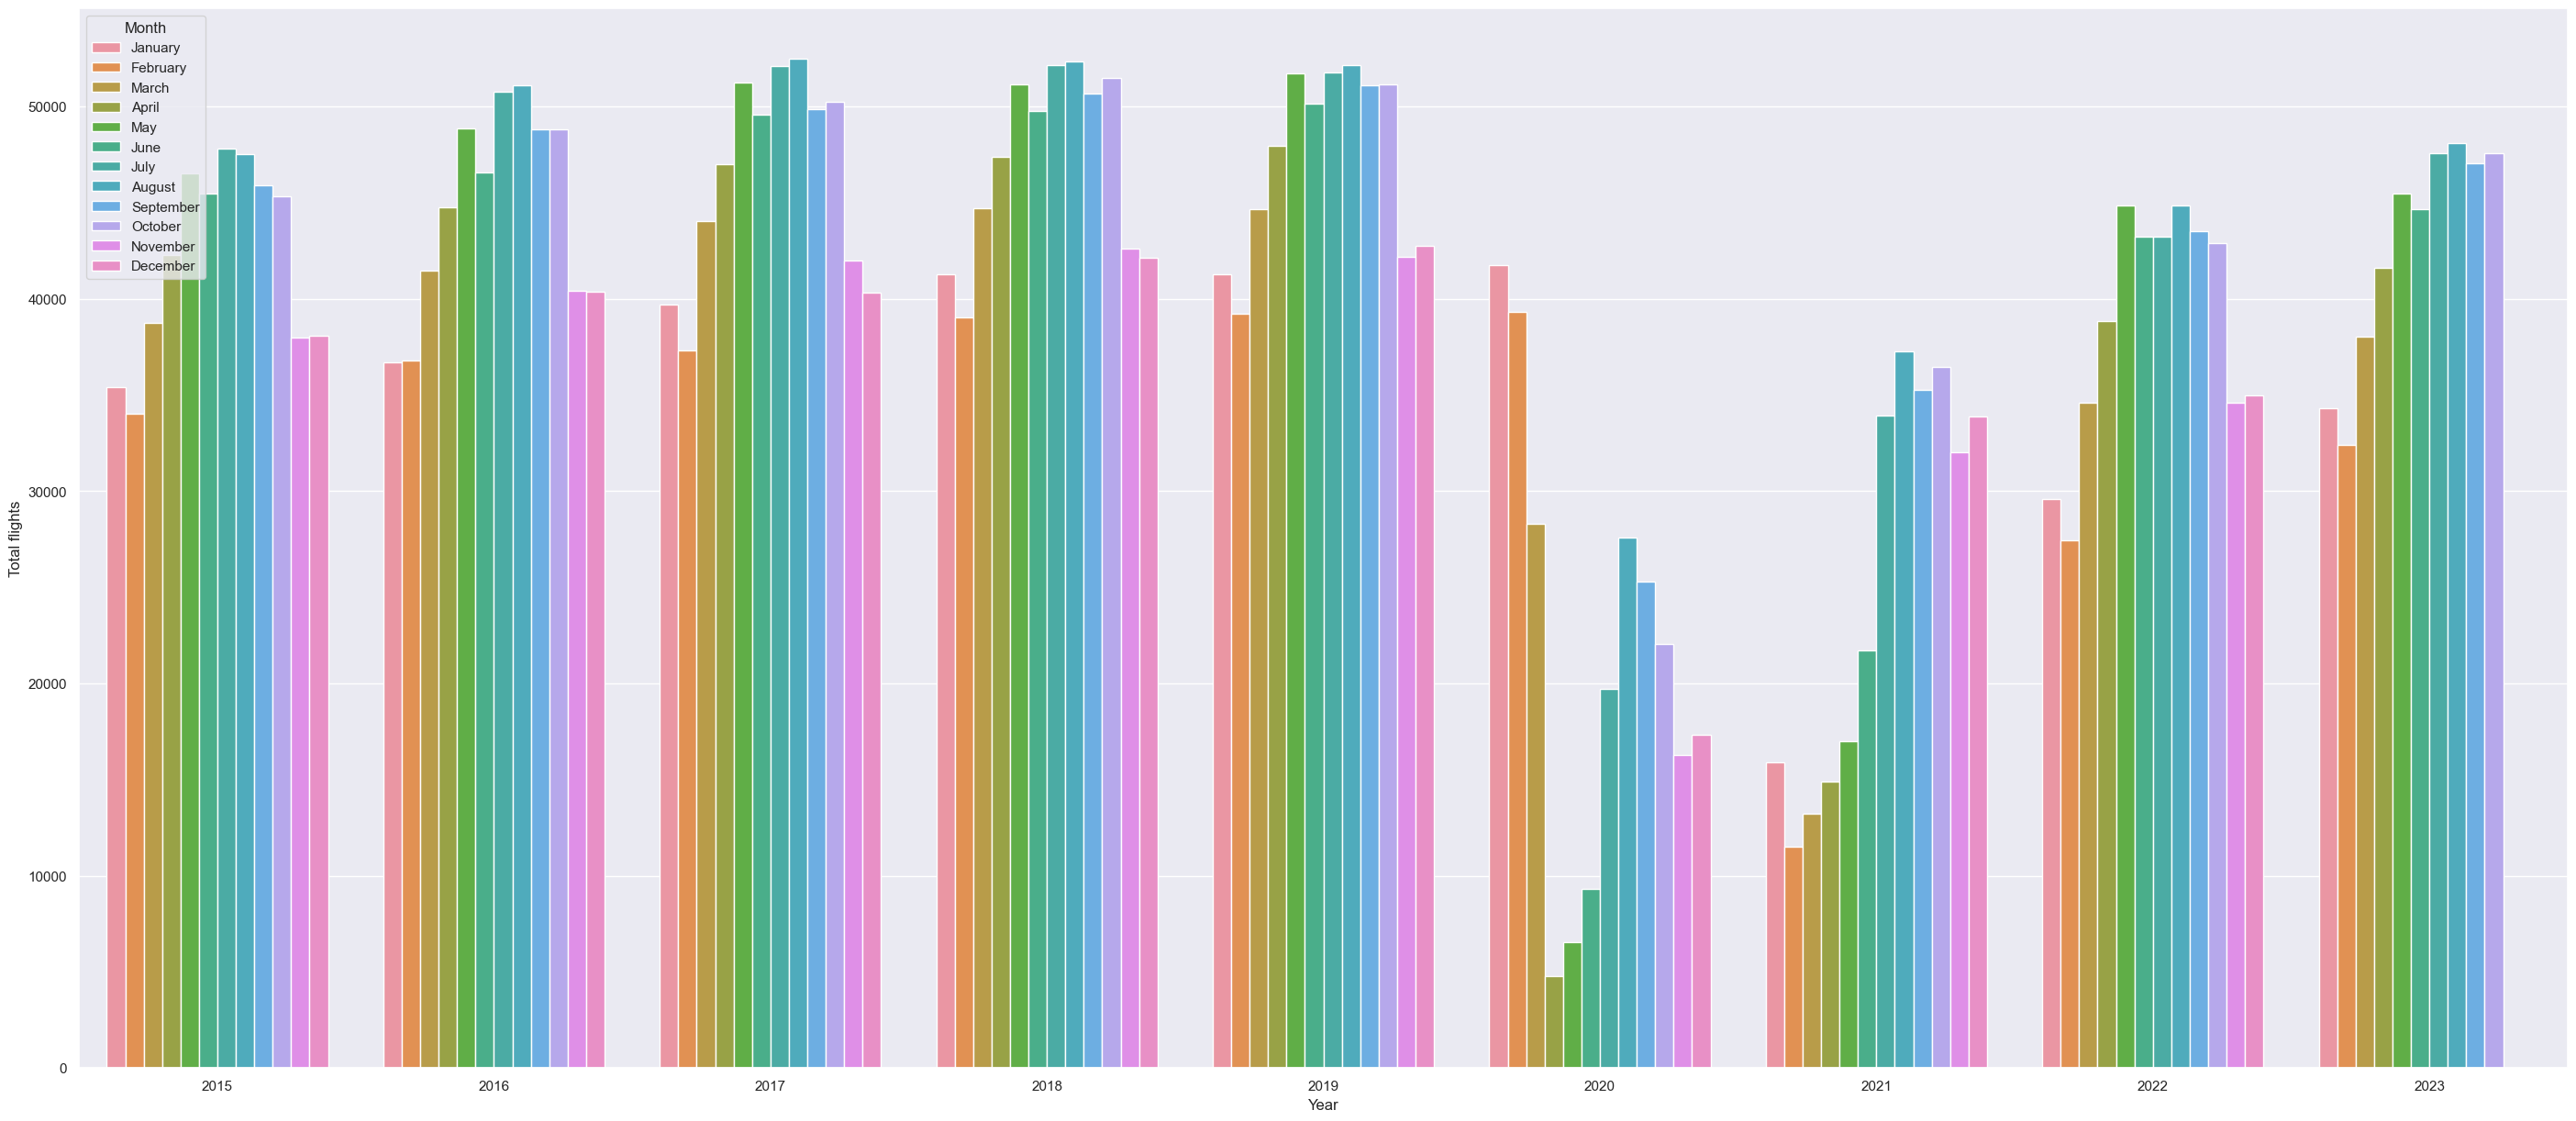

In [54]:
sns.set(rc={'figure.figsize':(35,15)}) #Understanding the total numbers through the years
sns.barplot(x=dfNdTotal.Year, y=dfNdTotal['Total flights'],hue=dfNdTotal['Month'])

<Axes: xlabel='Year', ylabel='Total passengers'>

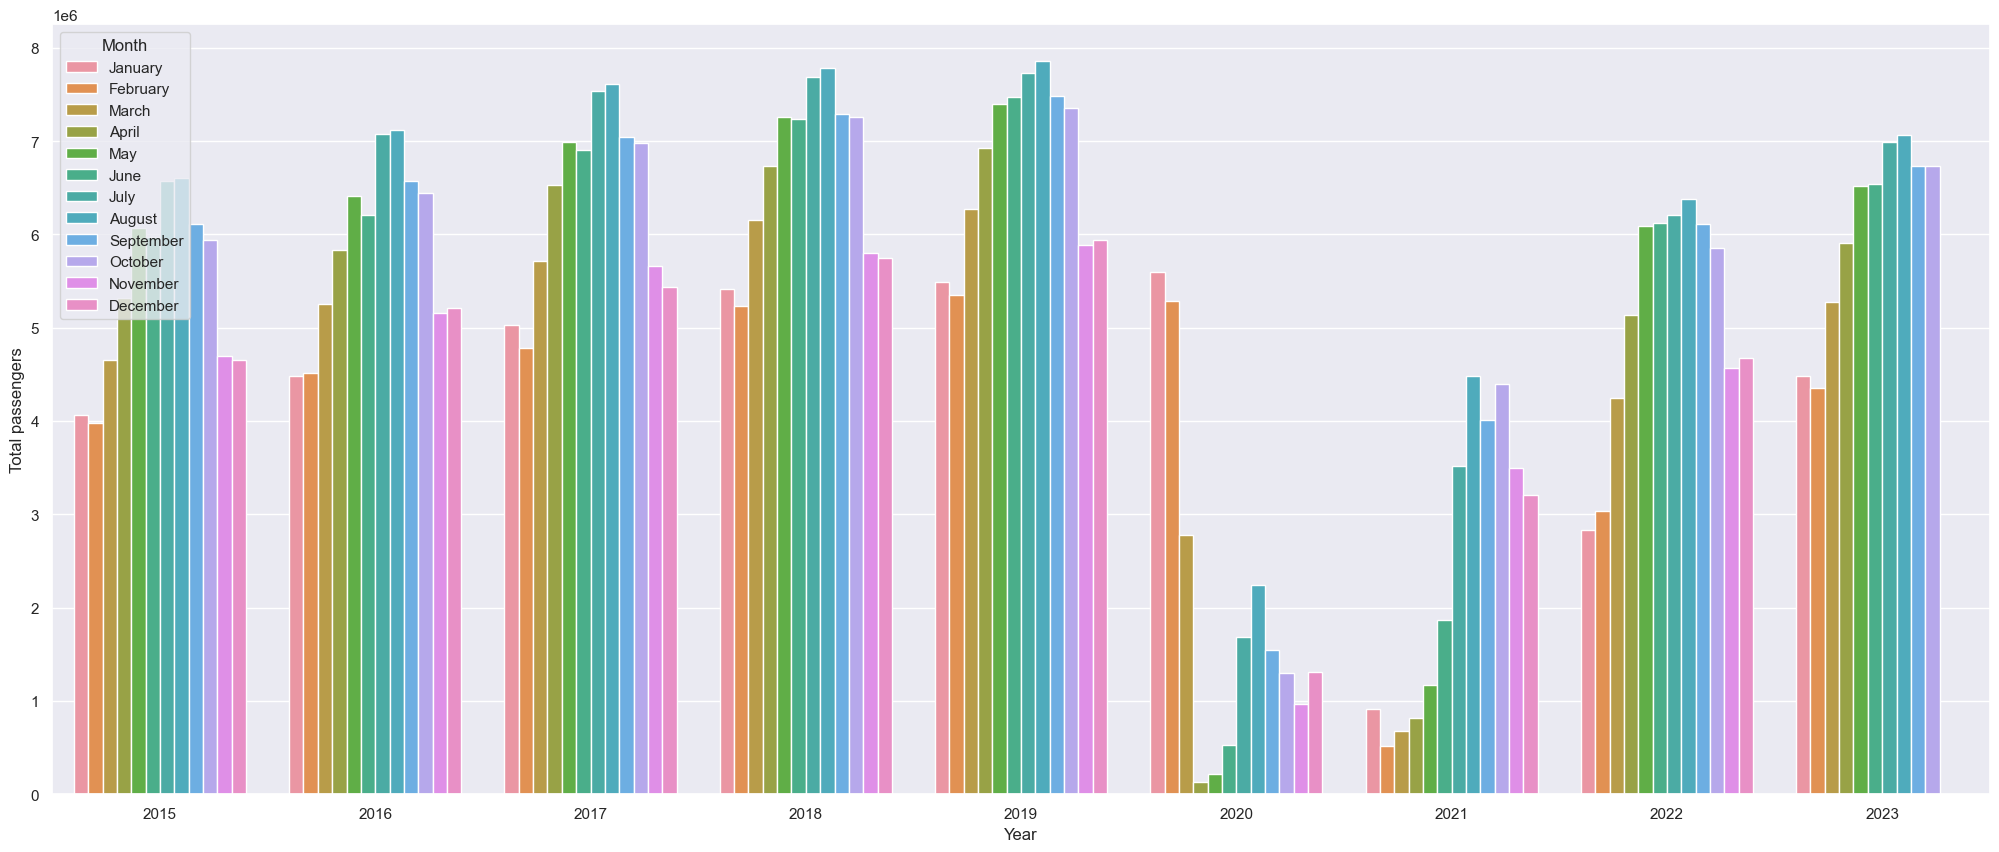

In [55]:
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x=dfNdTotal.Year, y=dfNdTotal['Total passengers'],hue=dfNdTotal['Month'])

<Axes: xlabel='Year', ylabel='Total cargo'>

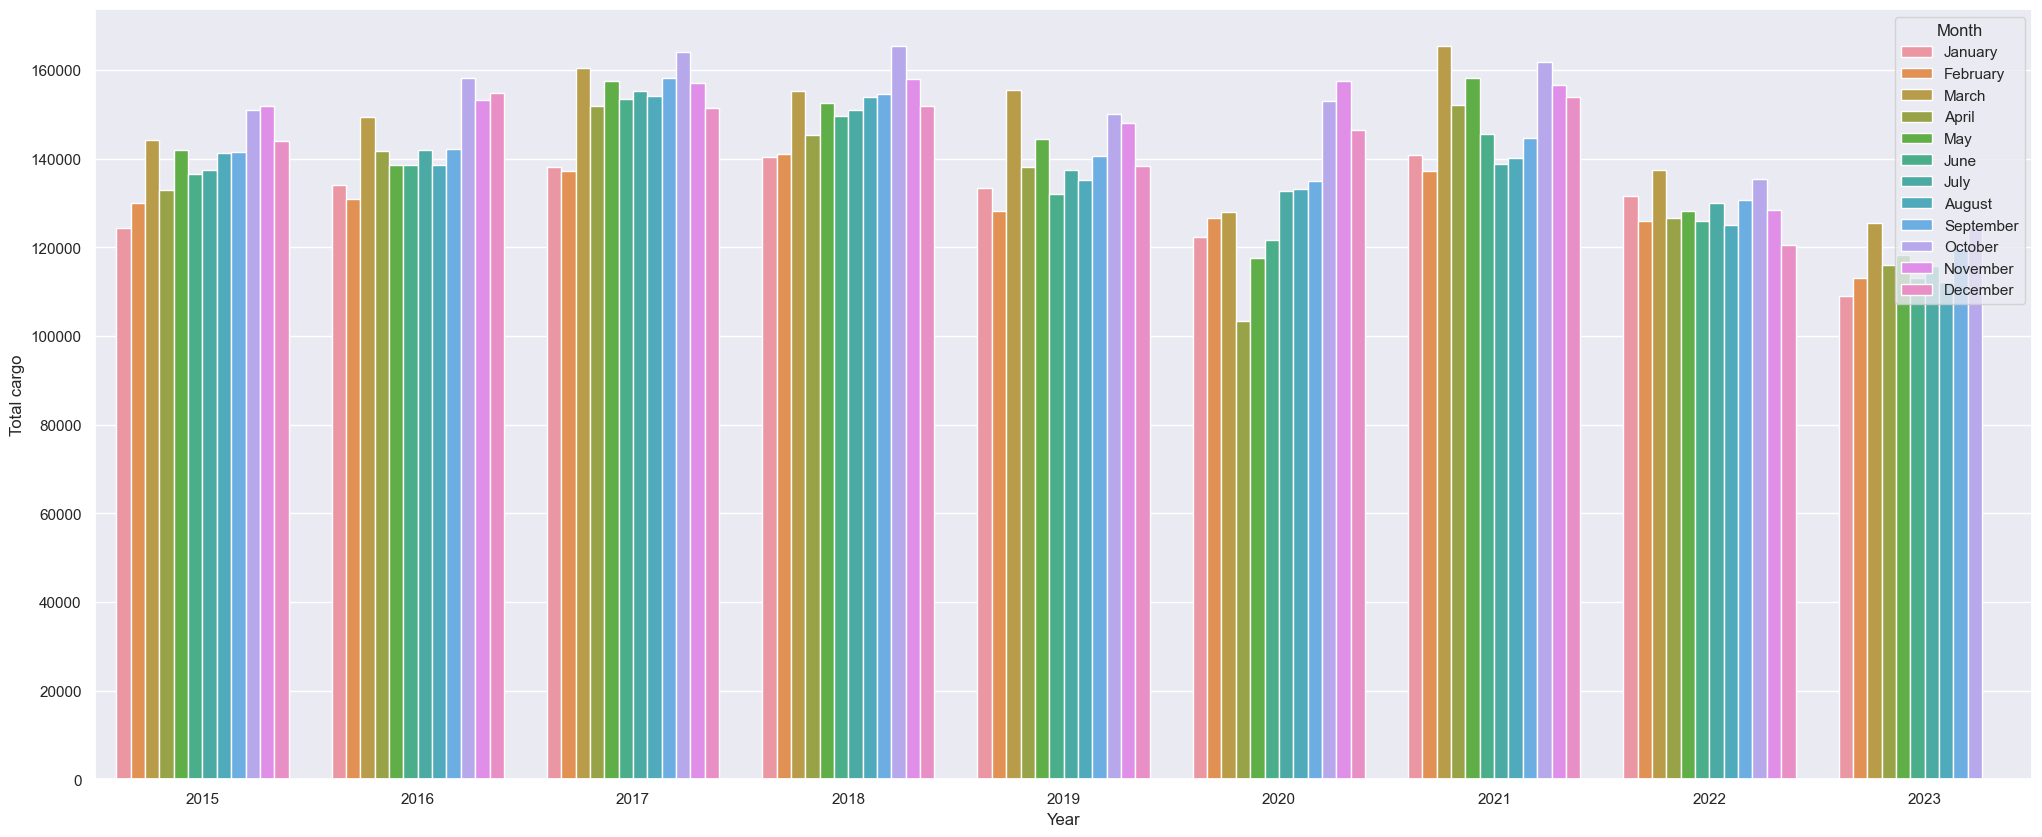

In [56]:
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x=dfNdTotal.Year, y=dfNdTotal['Total cargo'],hue=dfNdTotal['Month'])

In [57]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas

%matplotlib inline

def mpl_plot(avg, highlight):
    fig = Figure()
    FigureCanvas(fig) # not needed in mpl >= 3.1
    ax = fig.add_subplot()
    avg.plot(ax=ax)
    if len(highlight): highlight.plot(style='o', ax=ax)
    return fig

def find_outliers(variable='Total flights', window=30, sigma=10, view_fn=mpl_plot):
    avg = data[variable].rolling(window=window).mean()
    residual = data[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = (np.abs(residual) > std * sigma)
    return view_fn(avg, avg[outliers])

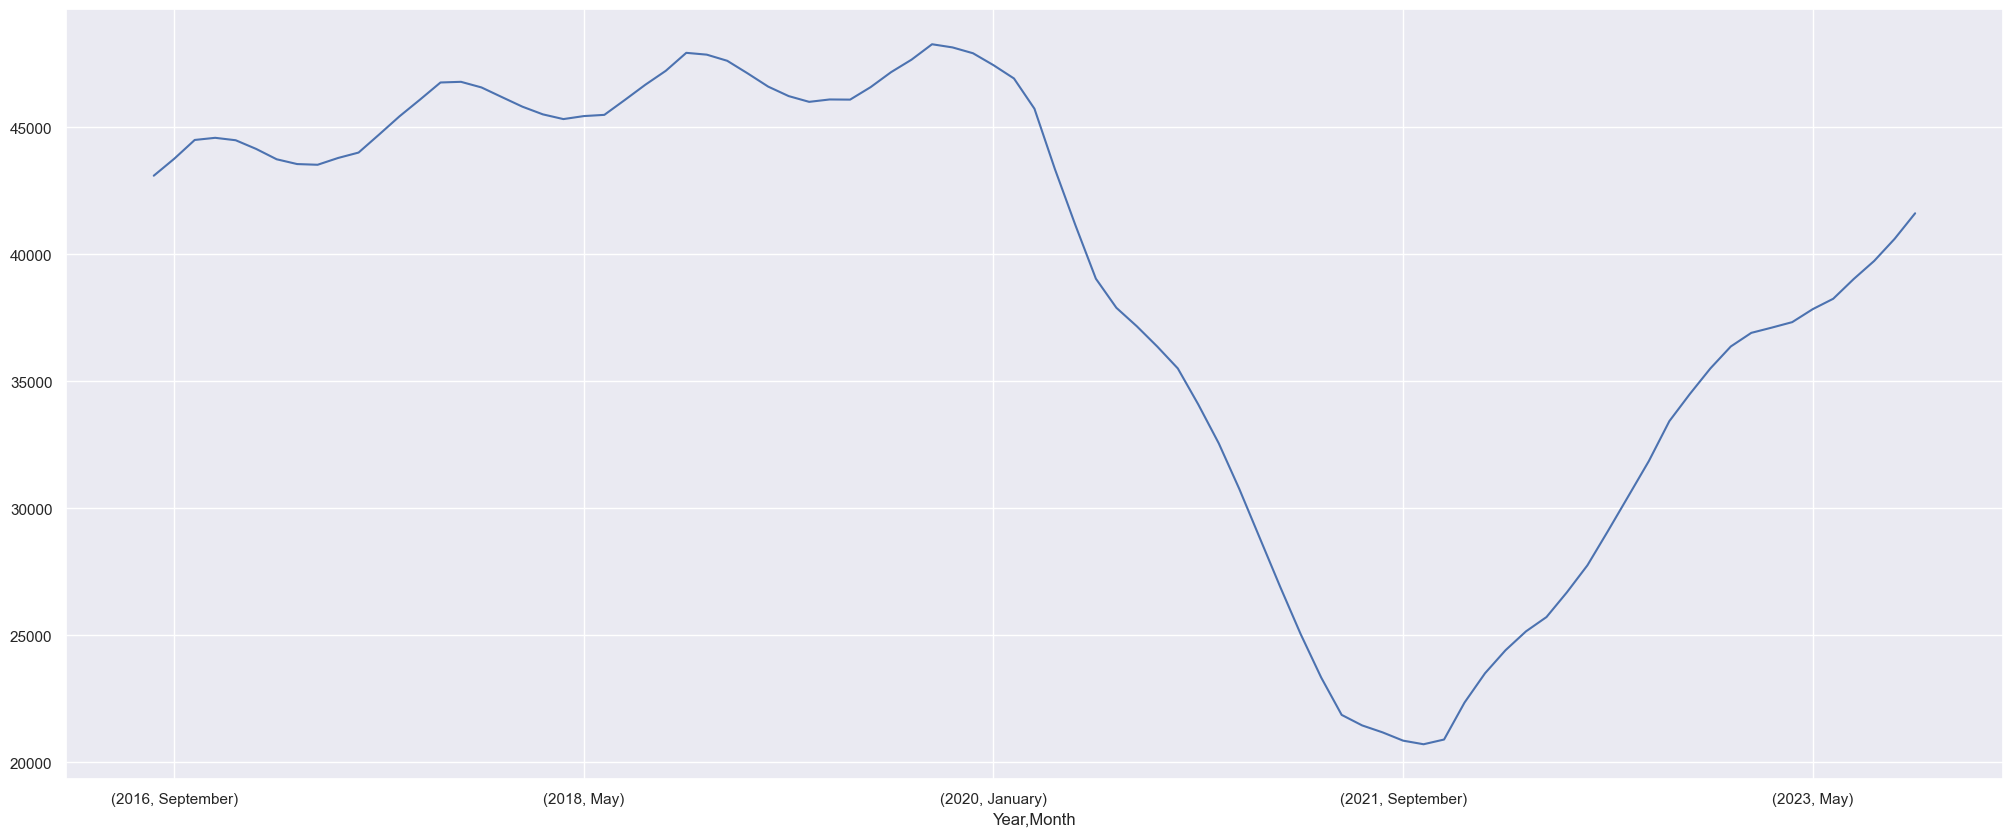

In [58]:
    find_outliers(variable='Total flights', window=20, sigma=10)

Column
    [0] Column
        [0] IntSlider(end=90, name='window', start=-30, value=30)
        [1] IntSlider(end=30, name='sigma', start=-10, value=10)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00113')
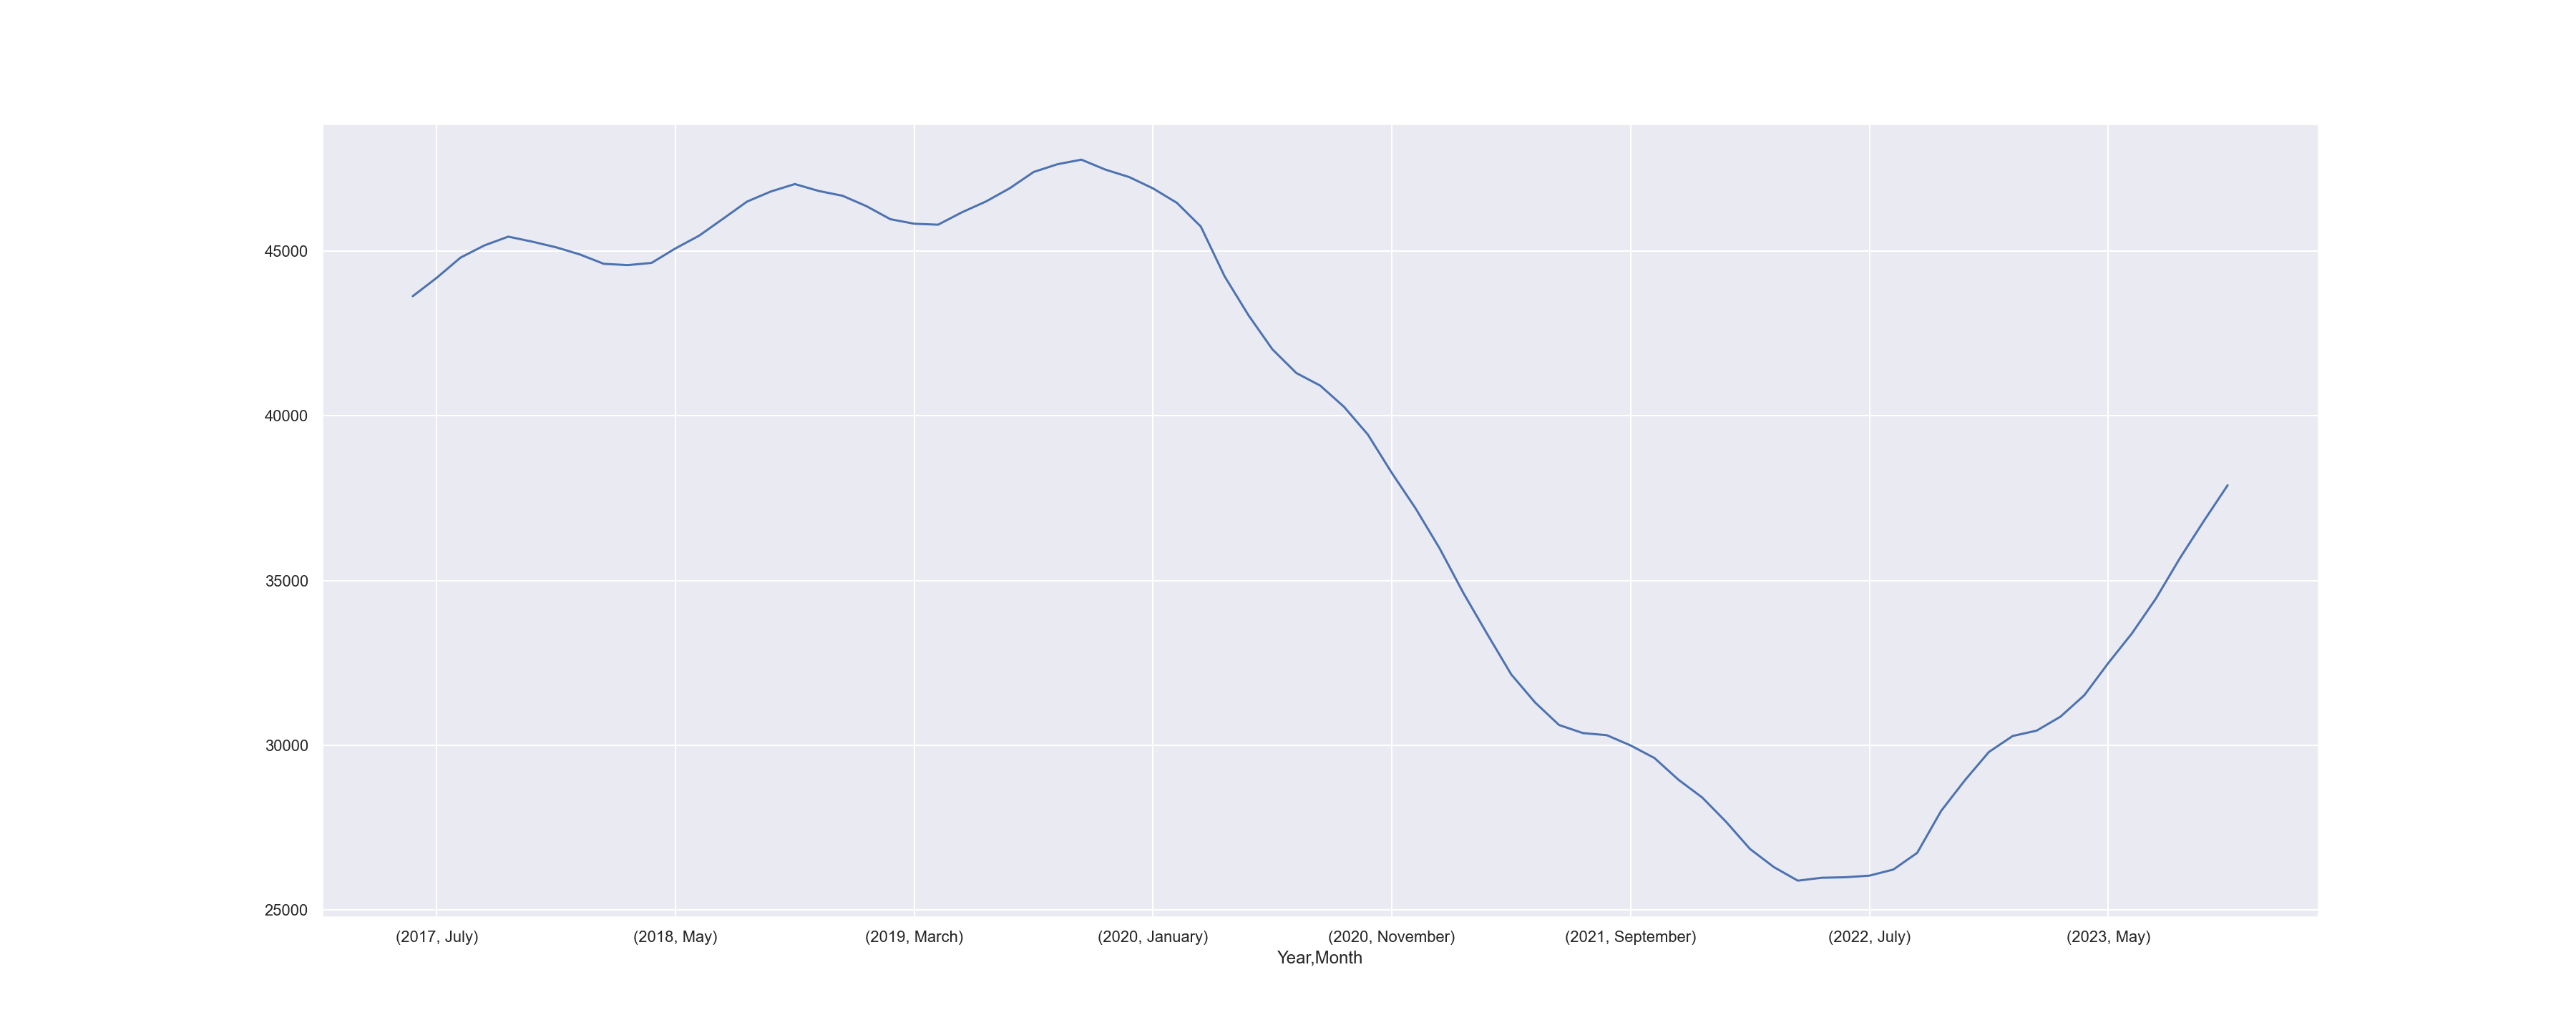

In [59]:
import panel as pn
pn.extension()

pn.interact(find_outliers)

## Identyfing outliers

In [60]:
dfNdTotal.describe()

Year  Cross-country flights  Local flights  Total flights  \
count   106.000000             106.000000     106.000000     106.000000   
mean   2018.924528           42567.537736    5471.424528   39407.584906   
std       2.558638           11737.665871    1834.846940   11378.798059   
min    2015.000000            6093.000000    1991.000000    4759.000000   
25%    2017.000000           38083.500000    4227.250000   35041.500000   
50%    2019.000000           44955.500000    5033.000000   42172.000000   
75%    2021.000000           51031.750000    6895.250000   47554.750000   
max    2023.000000           55894.000000    9705.000000   52466.000000   

       Scheduled flights  Non-scheduled flights  Total arrival flights  \
count         106.000000             106.000000             106.000000   
mean        37808.632075            1598.952830           19700.849057   
std         10846.329727             922.812744            5688.640907   
min          4175.000000             584.000000            2375.000000   
25%         34031.000000             933.500000           17524.250000   
50%         41070.500000            1262.500000           21083.000000   
75%         45794.750000            1918.000000           23777.750000   
max         50496.000000            4781.000000           26227.000000   

       Scheduled arrival flights  Non-scheduled arrival flights  \
count                 106.000000                     106.000000   
mean                18904.594340                     796.254717   
std                  5427.443044                     456.636253   
min                  2081.000000                     294.000000   
25%                 16996.250000                     463.250000   
50%                 20523.000000                     619.000000   
75%                 22871.250000                     971.000000   
max                 25253.000000                    2380.000000   

       Total departure flights  Scheduled departure flights  \
count               106.000000                   106.000000   
mean              19706.735849                 18904.037736   
std                5690.179514                  5419.020755   
min                2384.000000                  2094.000000   
25%               17517.250000                 17022.250000   
50%               21089.000000                 20547.500000   
75%               23779.500000                 22923.500000   
max               26239.000000                 25243.000000   

       Non-scheduled departure flights  Total passengers  \
count                       106.000000      1.060000e+02   
mean                        802.698113      5.154742e+06   
std                         467.614089      2.041924e+06   
min                         288.000000      1.337520e+05   
25%                         448.500000      4.416754e+06   
50%                         639.000000      5.729929e+06   
75%                         958.250000      6.597852e+06   
max                        2413.000000      7.859458e+06   

       Scheduled passengers  Non-scheduled passengers  \
count          1.060000e+02                106.000000   
mean           5.008521e+06             146221.009434   
std            1.953402e+06             152472.613048   
min            1.295250e+05               1683.000000   
25%            4.375093e+06              29932.250000   
50%            5.577424e+06              93203.000000   
75%            6.422651e+06             192866.000000   
max            7.700001e+06             671138.000000   

       Total arrival passengers  Arrival scheduled passengers  \
count              1.060000e+02                  1.060000e+02   
mean               2.575355e+06                  2.502742e+06   
std                1.023215e+06                  9.787878e+05   
min                7.477800e+04                  7.143600e+04   
25%                2.230804e+06                  2.197025e+06   
50%                2.837810e+06                  2.789

<Axes: >

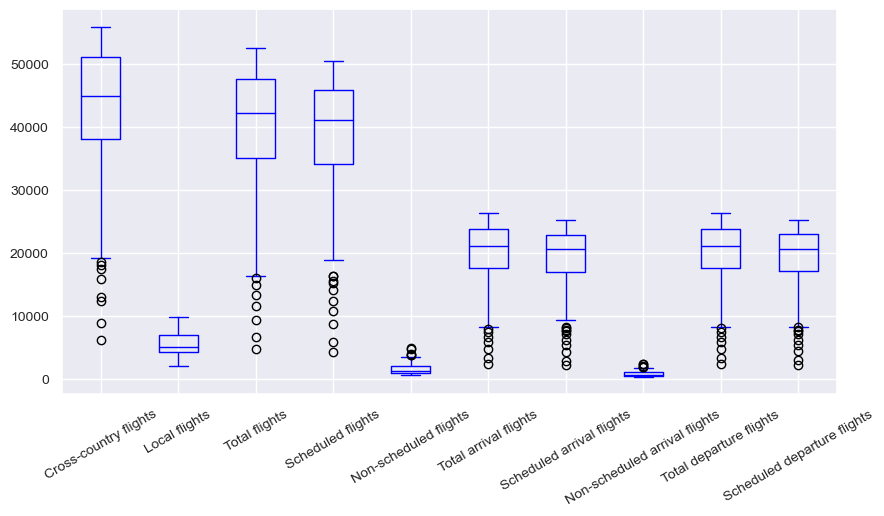

In [61]:
 #Identifying outliers for flights
plt.rcParams['figure.figsize'] = (10,5)
dfNdTotal.iloc[:,3:13].boxplot(grid='true', color='blue',fontsize=10, rot=30)

<Axes: >

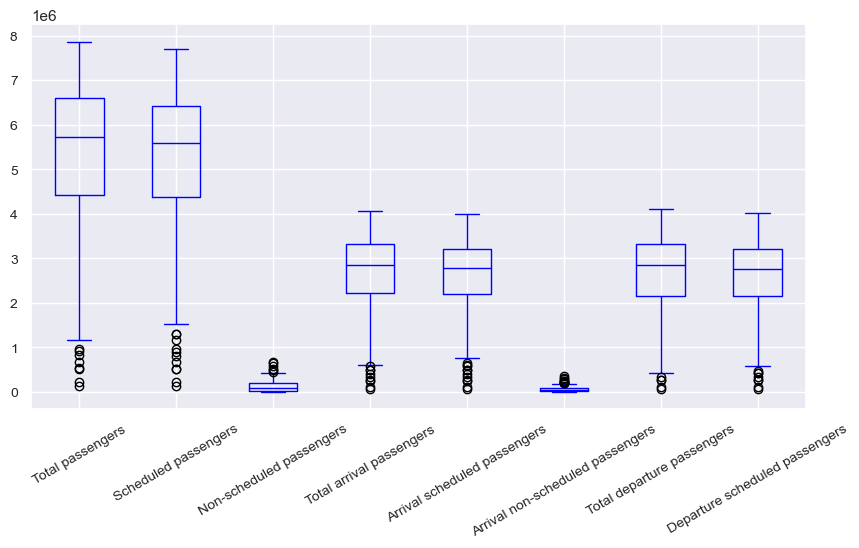

In [62]:
#Identifying outliers for passengers
plt.rcParams['figure.figsize'] = (10,5)
dfNdTotal.iloc[:,14:22].boxplot(grid='true', color='blue',fontsize=10, rot=30)

<Axes: >

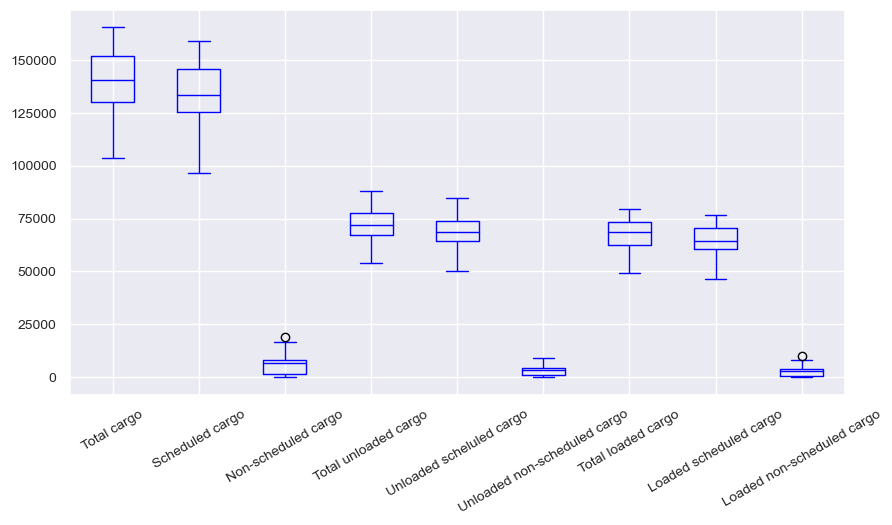

In [63]:
#Identifying outliers for cargo
plt.rcParams['figure.figsize'] = (10,5)
dfNdTotal.iloc[:,23:32].boxplot(grid='true', color='blue',fontsize=10, rot=30)

In [64]:
dfNd[dfNd.index.duplicated()]

Empty DataFrame
Columns: [Year, Month, Airports, Cross-country flights, Local flights, Total flights, Scheduled flights, Non-scheduled flights, Total arrival flights, Scheduled arrival flights, Non-scheduled arrival flights, Total departure flights, Scheduled departure flights, Non-scheduled departure flights, Total passengers, Scheduled passengers, Non-scheduled passengers, Total arrival passengers, Arrival scheduled passengers, Arrival non-scheduled passengers, Total departure passengers, Departure scheduled passengers, Departure non-scheduled passengers, Total cargo, Scheduled cargo, Non-scheduled cargo, Total unloaded cargo, Unloaded scheluled cargo, Unloaded non-scheduled cargo, Total loaded cargo, Loaded scheduled cargo, Loaded non-scheduled cargo]
Index: []

In [65]:
dfNdTotal.head()

Year     Month              Airports  Cross-country flights  \
210  2015   January  Total Dutch airports                37288.0   
211  2015  February  Total Dutch airports                36279.0   
212  2015     March  Total Dutch airports                41870.0   
213  2015     April  Total Dutch airports                45402.0   
214  2015       May  Total Dutch airports                49852.0   

     Local flights  Total flights  Scheduled flights  Non-scheduled flights  \
210         3315.0        35424.0            34028.0                 1396.0   
211         4654.0        34013.0            32608.0                 1405.0   
212         5089.0        38723.0            37208.0                 1515.0   
213         5802.0        42263.0            40040.0                 2223.0   
214         4453.0        46525.0            42848.0                 3677.0   

     Total arrival flights  Scheduled arrival flights  \
210                17679.0                    16987.0   
211                17001.0                    16320.0   
212                19371.0                    18617.0   
213                21126.0                    20014.0   
214                23258.0                    21451.0   

     Non-scheduled arrival flights  Total departure flights  \
210                          692.0                  17745.0   
211                          681.0                  17012.0   
212                          754.0                  19352.0   
213                         1112.0                  21137.0   
214                         1807.0                  23267.0   

     Scheduled departure flights  Non-scheduled departure flights  \
210                      17041.0                            704.0   
211                      16288.0                            724.0   
212                      18591.0                            761.0   
213                      20026.0                           1111.0   
214                      21397.0                           1870.0   

     Total passengers  Scheduled passengers  Non-scheduled passengers  \
210         4067159.0             3951731.0                  115428.0   
211         3975652.0             3850191.0                  125461.0   
212         4651418.0             4522693.0                  128725.0   
213         5318300.0             5109064.0                  209236.0   
214         6064935.0             5584009.0                  480926.0   

     Total arrival passengers  Arrival scheduled passengers  \
210                 2053582.0                     1993942.0   
211                 1963234.0                     1901287.0   
212                 2361147.0                     2293347.0   
213                 2592791.0                     2509685.0   
214                 3050274.0                     2816270.0   

     Arrival non-scheduled passengers  Total departure passengers  \
210                           59640.0                   2013577.0   
211                           61947.0                   2012418.0   
212                           67800.0                   2290271.0   
213                           83106.0                   2725509.0   
214                          234004.0                   3014661.0   

     Departure scheduled passengers  Departure non-scheduled passengers  \
210                       1957789.0                             55788.0   
211                       1948904.0                             63514.0   
212                       2229346.0                             60925.0   
213                       2599379.0                            126130.0   
214                       2767739.0                            246922.0   

     Total cargo  Scheduled cargo  Non-scheduled cargo  Total unloaded cargo  \
210     124315.0         109954.0              14362.0               65897.0   
211     130082.0         113243.0              16839.0               67406.0   
212     144166.0         125300.0              18866.0      

In [66]:
def outlier(df): #Function helps detect outliers and change the values to NaN to be replaced with median values later
    new_df = df.copy()
    numeric_cols = new_df._get_numeric_data().columns
    
    q1 = np.percentile(new_df[numeric_cols],25, axis=0)
    q3 = np.percentile(new_df[numeric_cols],75, axis=0)
    IQR = q3 - q1
    lower_limit = q1 - (1.5*IQR)
    upper_limit = q3 + (1.5*IQR)
    mask = (new_df[numeric_cols] < lower_limit) | (new_df[numeric_cols] > upper_limit)
    new_df[numeric_cols] = new_df[numeric_cols].mask(mask)
    return new_df

In [67]:
dfNdTotal = outlier(dfNdTotal)

In [68]:
#dfNdTotal.loc[~((dfNdTotal.iloc[:,1:] < (Q1-1.5 * IQR)) |(dfNdTotal.iloc[:,1:] > (Q3 + 1.5 * IQR))).any(axis=1)]=np.nan

In [69]:
dfNdTotal.head()

Year     Month              Airports  Cross-country flights  \
210  2015   January  Total Dutch airports                37288.0   
211  2015  February  Total Dutch airports                36279.0   
212  2015     March  Total Dutch airports                41870.0   
213  2015     April  Total Dutch airports                45402.0   
214  2015       May  Total Dutch airports                49852.0   

     Local flights  Total flights  Scheduled flights  Non-scheduled flights  \
210         3315.0        35424.0            34028.0                 1396.0   
211         4654.0        34013.0            32608.0                 1405.0   
212         5089.0        38723.0            37208.0                 1515.0   
213         5802.0        42263.0            40040.0                 2223.0   
214         4453.0        46525.0            42848.0                    NaN   

     Total arrival flights  Scheduled arrival flights  \
210                17679.0                    16987.0   
211                17001.0                    16320.0   
212                19371.0                    18617.0   
213                21126.0                    20014.0   
214                23258.0                    21451.0   

     Non-scheduled arrival flights  Total departure flights  \
210                          692.0                  17745.0   
211                          681.0                  17012.0   
212                          754.0                  19352.0   
213                         1112.0                  21137.0   
214                            NaN                  23267.0   

     Scheduled departure flights  Non-scheduled departure flights  \
210                      17041.0                            704.0   
211                      16288.0                            724.0   
212                      18591.0                            761.0   
213                      20026.0                           1111.0   
214                      21397.0                              NaN   

     Total passengers  Scheduled passengers  Non-scheduled passengers  \
210         4067159.0             3951731.0                  115428.0   
211         3975652.0             3850191.0                  125461.0   
212         4651418.0             4522693.0                  128725.0   
213         5318300.0             5109064.0                  209236.0   
214         6064935.0             5584009.0                       NaN   

     Total arrival passengers  Arrival scheduled passengers  \
210                 2053582.0                     1993942.0   
211                 1963234.0                     1901287.0   
212                 2361147.0                     2293347.0   
213                 2592791.0                     2509685.0   
214                 3050274.0                     2816270.0   

     Arrival non-scheduled passengers  Total departure passengers  \
210                           59640.0                   2013577.0   
211                           61947.0                   2012418.0   
212                           67800.0                   2290271.0   
213                           83106.0                   2725509.0   
214                               NaN                   3014661.0   

     Departure scheduled passengers  Departure non-scheduled passengers  \
210                       1957789.0                             55788.0   
211                       1948904.0                             63514.0   
212                       2229346.0                             60925.0   
213                       2599379.0                            126130.0   
214                       2767739.0                                 NaN   

     Total cargo  Scheduled cargo  Non-scheduled cargo  Total unloaded cargo  \
210     124315.0         109954.0              14362.0               65897.0   
211     130082.0         113243.0              16839.0               67406.0   
212     144166.0         125300.0                  NaN      

In [70]:
dfNdTotal = dfNdTotal.fillna(dfNdTotal.median())

C:\Users\ruben\AppData\Local\Temp\ipykernel_9112\794696405.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfNdTotal = dfNdTotal.fillna(dfNdTotal.median())


In [71]:
dfNdTotal.head()

Year     Month              Airports  Cross-country flights  \
210  2015   January  Total Dutch airports                37288.0   
211  2015  February  Total Dutch airports                36279.0   
212  2015     March  Total Dutch airports                41870.0   
213  2015     April  Total Dutch airports                45402.0   
214  2015       May  Total Dutch airports                49852.0   

     Local flights  Total flights  Scheduled flights  Non-scheduled flights  \
210         3315.0        35424.0            34028.0                 1396.0   
211         4654.0        34013.0            32608.0                 1405.0   
212         5089.0        38723.0            37208.0                 1515.0   
213         5802.0        42263.0            40040.0                 2223.0   
214         4453.0        46525.0            42848.0                 1252.0   

     Total arrival flights  Scheduled arrival flights  \
210                17679.0                    16987.0   
211                17001.0                    16320.0   
212                19371.0                    18617.0   
213                21126.0                    20014.0   
214                23258.0                    21451.0   

     Non-scheduled arrival flights  Total departure flights  \
210                          692.0                  17745.0   
211                          681.0                  17012.0   
212                          754.0                  19352.0   
213                         1112.0                  21137.0   
214                          610.0                  23267.0   

     Scheduled departure flights  Non-scheduled departure flights  \
210                      17041.0                            704.0   
211                      16288.0                            724.0   
212                      18591.0                            761.0   
213                      20026.0                           1111.0   
214                      21397.0                            629.0   

     Total passengers  Scheduled passengers  Non-scheduled passengers  \
210         4067159.0             3951731.0                  115428.0   
211         3975652.0             3850191.0                  125461.0   
212         4651418.0             4522693.0                  128725.0   
213         5318300.0             5109064.0                  209236.0   
214         6064935.0             5584009.0                   91598.5   

     Total arrival passengers  Arrival scheduled passengers  \
210                 2053582.0                     1993942.0   
211                 1963234.0                     1901287.0   
212                 2361147.0                     2293347.0   
213                 2592791.0                     2509685.0   
214                 3050274.0                     2816270.0   

     Arrival non-scheduled passengers  Total departure passengers  \
210                           59640.0                   2013577.0   
211                           61947.0                   2012418.0   
212                           67800.0                   2290271.0   
213                           83106.0                   2725509.0   
214                           45057.0                   3014661.0   

     Departure scheduled passengers  Departure non-scheduled passengers  \
210                       1957789.0                             55788.0   
211                       1948904.0                             63514.0   
212                       2229346.0                             60925.0   
213                       2599379.0                            126130.0   
214                       2767739.0                             45254.0   

     Total cargo  Scheduled cargo  Non-scheduled cargo  Total unloaded cargo  \
210     124315.0         109954.0              14362.0               65897.0   
211     130082.0         113243.0              16839.0               67406.0   
212     144166.0         125300.0               6737.0      

<Axes: >

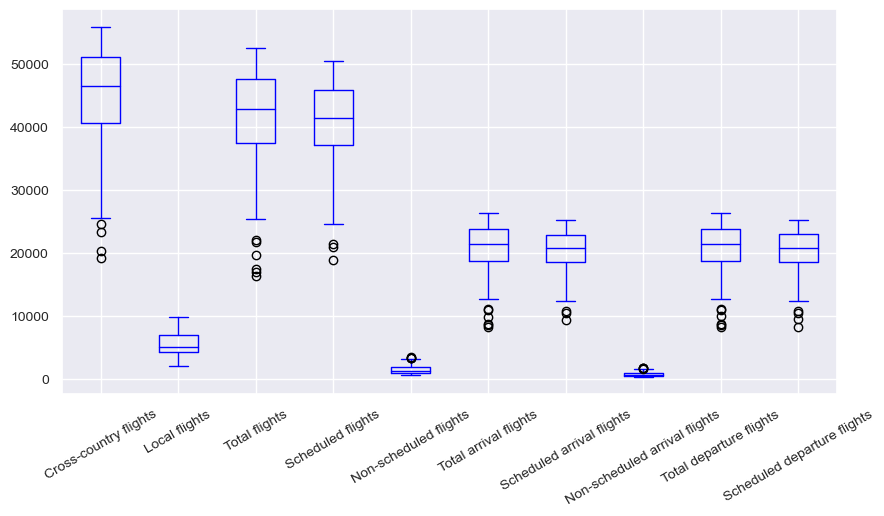

In [72]:
#Confirming outliers were nearly eliminated for flights
plt.rcParams['figure.figsize'] = (10,5)
dfNdTotal.iloc[:,3:13].boxplot(grid='true', color='blue',fontsize=10, rot=30)

<Axes: >

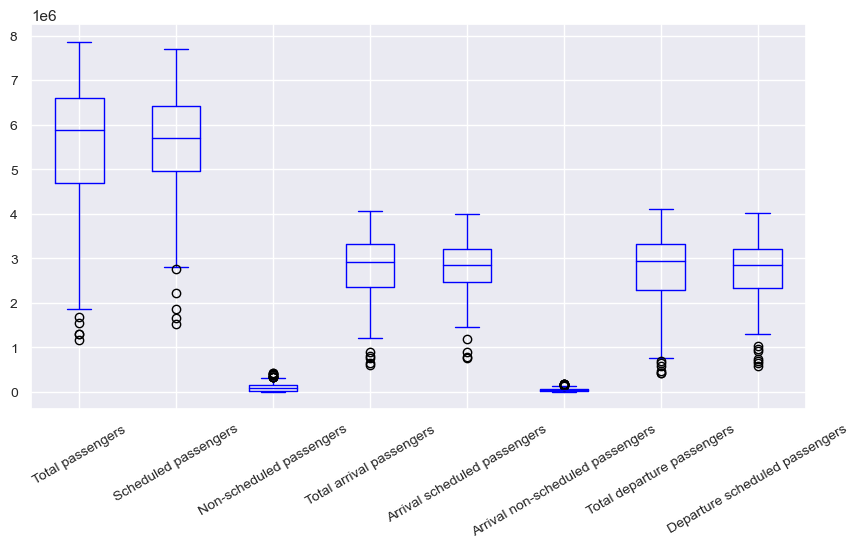

In [73]:
#Confirming most outliers were eliminated for passengers
plt.rcParams['figure.figsize'] = (10,5)
dfNdTotal.iloc[:,14:22].boxplot(grid='true', color='blue',fontsize=10, rot=30)

<Axes: >

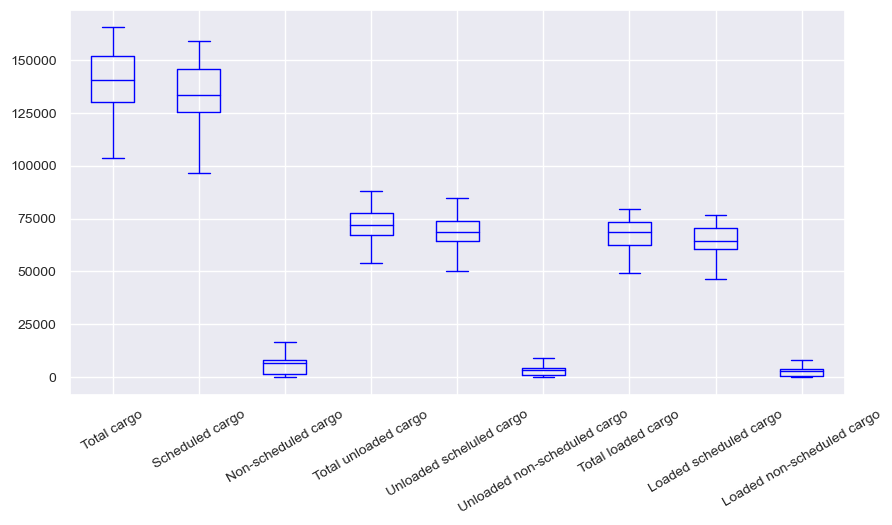

In [74]:
#Confirming outliers were dropped for cargo
plt.rcParams['figure.figsize'] = (10,5)
dfNdTotal.iloc[:,23:32].boxplot(grid='true', color='blue',fontsize=10, rot=30)

In [75]:
dfNdTotal.head(15)

Year      Month              Airports  Cross-country flights  \
210  2015    January  Total Dutch airports                37288.0   
211  2015   February  Total Dutch airports                36279.0   
212  2015      March  Total Dutch airports                41870.0   
213  2015      April  Total Dutch airports                45402.0   
214  2015        May  Total Dutch airports                49852.0   
215  2015       June  Total Dutch airports                49435.0   
216  2015       July  Total Dutch airports                51055.0   
217  2015     August  Total Dutch airports                50728.0   
218  2015  September  Total Dutch airports                49021.0   
219  2015    October  Total Dutch airports                48396.0   
220  2015   November  Total Dutch airports                40513.0   
221  2015   December  Total Dutch airports                40542.0   
223  2016    January  Total Dutch airports                38706.0   
224  2016   February  Total Dutch airports                39249.0   
225  2016      March  Total Dutch airports                44730.0   

     Local flights  Total flights  Scheduled flights  Non-scheduled flights  \
210         3315.0        35424.0            34028.0                 1396.0   
211         4654.0        34013.0            32608.0                 1405.0   
212         5089.0        38723.0            37208.0                 1515.0   
213         5802.0        42263.0            40040.0                 2223.0   
214         4453.0        46525.0            42848.0                 1252.0   
215         4839.0        45459.0            42146.0                 3313.0   
216         4186.0        47783.0            43059.0                 1252.0   
217         4590.0        47532.0            42751.0                 1252.0   
218         4513.0        45886.0            42492.0                 3394.0   
219         5054.0        45332.0            42435.0                 2897.0   
220         3904.0        37962.0            36683.0                 1279.0   
221         3630.0        38065.0            36922.0                 1143.0   
223         3724.0        36709.0            35694.0                 1015.0   
224         3889.0        36774.0            35687.0                 1087.0   
225         4757.0        41451.0            40123.0                 1328.0   

     Total arrival flights  Scheduled arrival flights  \
210                17679.0                    16987.0   
211                17001.0                    16320.0   
212                19371.0                    18617.0   
213                21126.0                    20014.0   
214                23258.0                    21451.0   
215                22731.0                    21089.0   
216                23879.0                    21499.0   
217                23767.0                    21399.0   
218                22955.0                    21258.0   
219                22645.0                    21226.0   
220                18996.0                    18354.0   
221                19047.0                    18478.0   
223                18340.0                    17838.0   
224                18388.0                    17849.0   
225                20720.0                    20056.0   

     Non-scheduled arrival flights  Total departure flights  \
210                          692.0                  17745.0   
211                          681.0                  17012.0   
212                          754.0                  19352.0   
213                         1112.0                  21137.0   
214                          610.0                  23267.0   
215                         1642.0                  22728.0   
216                          610.0                  23904.0   
217                          610.0                  23765.0   
218                         1697.0                  22931.0   
219                         1419.0                  22687.0   
220                          

C:\Users\ruben\AppData\Local\Temp\ipykernel_9112\2113943575.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= dfNdTotal.corr()


Year  Cross-country flights  \
Year                                1.000000              -0.248974   
Cross-country flights              -0.248974               1.000000   
Local flights                       0.586535              -0.123142   
Total flights                      -0.297758               0.947043   
Scheduled flights                  -0.241587               0.886337   
Non-scheduled flights              -0.449011               0.590923   
Total arrival flights              -0.297902               0.947033   
Scheduled arrival flights          -0.243528               0.885982   
Non-scheduled arrival flights      -0.432515               0.585011   
Total departure flights            -0.297612               0.947045   
Scheduled departure flights        -0.239984               0.942242   
Non-scheduled departure flights    -0.460492               0.591910   
Total passengers                   -0.204941               0.983430   
Scheduled passengers               -0.133299               0.828621   
Non-scheduled passengers           -0.457640               0.589428   
Total arrival passengers           -0.183533               0.930444   
Arrival scheduled passengers       -0.126463               0.825844   
Arrival non-scheduled passengers   -0.401094               0.581165   
Total departure passengers         -0.243646               0.862644   
Departure scheduled passengers     -0.170397               0.968436   
Departure non-scheduled passengers -0.469388               0.598623   
Total cargo                        -0.475903               0.127355   
Scheduled cargo                    -0.221605               0.120297   
Non-scheduled cargo                -0.821514               0.061257   
Total unloaded cargo               -0.372825               0.013497   
Unloaded scheluled cargo           -0.118334               0.016243   
Unloaded non-scheduled cargo       -0.800232              -0.005221   
Total loaded cargo                 -0.540166               0.226082   
Loaded scheduled cargo             -0.305450               0.212177   
Loaded non-scheduled cargo         -0.838161               0.119494   

                                    Local flights  Total flights  \
Year                                     0.586535      -0.297758   
Cross-country flights                   -0.123142       0.947043   
Local flights                            1.000000      -0.201192   
Total flights                           -0.201192       1.000000   
Scheduled flights                       -0.198049       0.848235   
Non-scheduled flights                   -0.012783       0.588430   
Total arrival flights                   -0.201868       0.999996   
Scheduled arrival flights               -0.199765       0.847985   
Non-scheduled arrival flights           -0.004700       0.581285   
Total departure flights                 -0.200516       0.999996   
Scheduled departure flights             -0.144627       0.897107   
Non-scheduled departure flights         -0.019760       0.590592   
Total passengers                        -0.163922       0.934549   
Scheduled passengers                    -0.135445       0.789634   
Non-scheduled passengers                -0.077933       0.595318   
Total arrival passengers                -0.108727       0.883175   
Arrival scheduled passengers            -0.123591       0.787314   
Arrival non-scheduled passengers        -0.045602       0.588396   
Total departure passengers              -0.172487       0.904506   
Departure scheduled passengers          -0.168212       0.920269   
Departure non-scheduled passengers      -0.074024       0.603147   
Total cargo                             -0.157422       0.106243   
Scheduled cargo                         -0.035330       0.089640   
Non-scheduled cargo                     -0.391417       0.082974   
Total unloaded cargo                    -0.120591      -0.017980   
Unloaded scheluled cargo                 0.005153      -0.021685   
Un

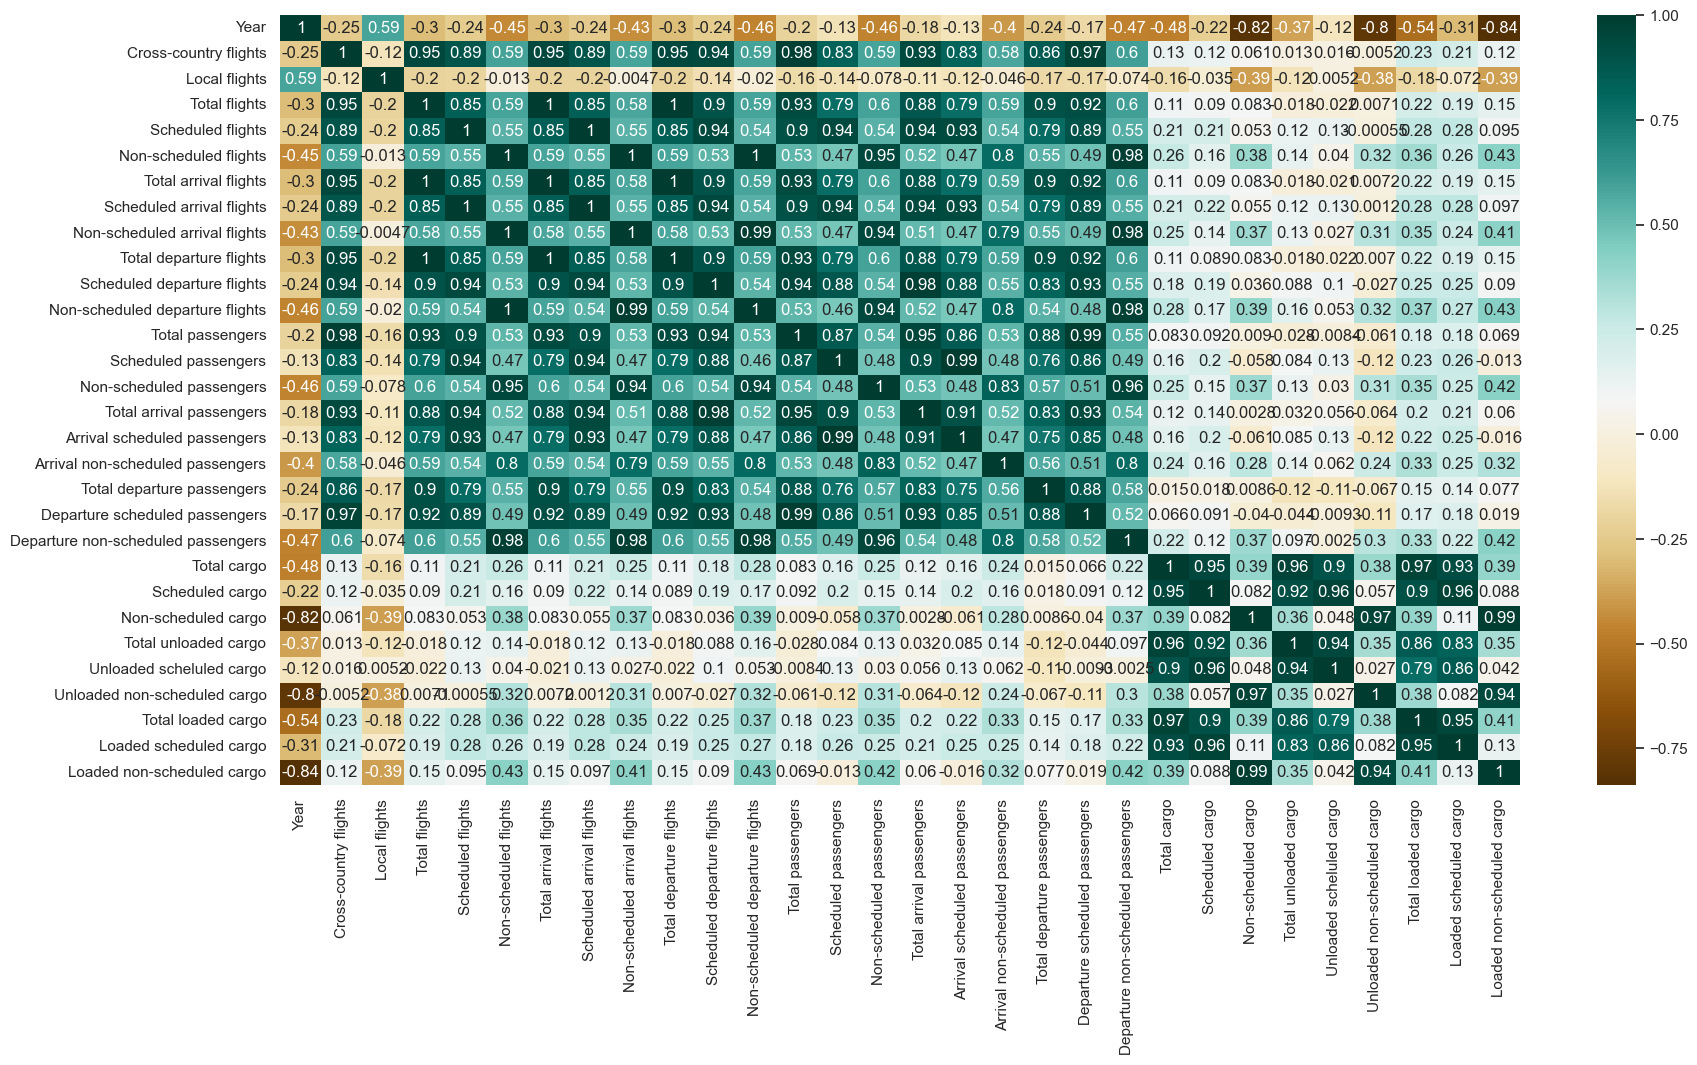

In [76]:
plt.figure(figsize=(20,10))
c= dfNdTotal.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

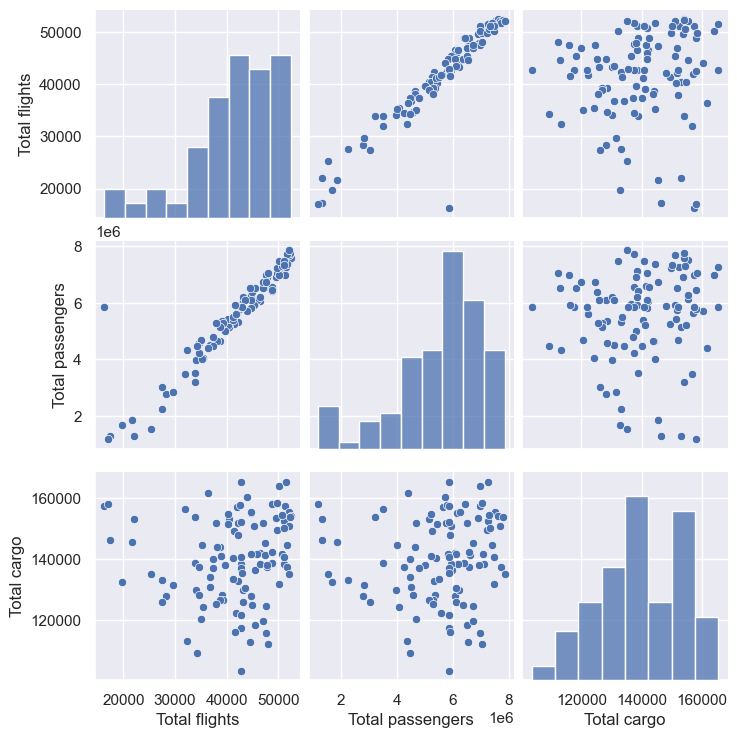

In [77]:
sns.pairplot(dfNdTotal[['Total flights','Total passengers','Total cargo']])

In [78]:
dfIr = pd.read_csv('Info_Ireland.csv') #Information for Irish airports
dfIr.head(15)

Statistic Label    Month Airports in Ireland             Country  \
0       Passengers  2015M01   All main airports       All Countries   
1       Passengers  2015M01   All main airports       All Countries   
2       Passengers  2015M01   All main airports       All Countries   
3       Passengers  2015M01   All main airports       All Countries   
4       Passengers  2015M01   All main airports       All Countries   
5       Passengers  2015M01   All main airports       All Countries   
6       Passengers  2015M01   All main airports       All Countries   
7       Passengers  2015M01   All main airports       All Countries   
8       Passengers  2015M01   All main airports       All Countries   
9       Passengers  2015M01   All main airports  Ireland (domestic)   
10      Passengers  2015M01   All main airports  Ireland (domestic)   
11      Passengers  2015M01   All main airports  Ireland (domestic)   
12      Passengers  2015M01   All main airports  Ireland (domestic)   
13      Passengers  2015M01   All main airports  Ireland (domestic)   
14      Passengers  2015M01   All main airports  Ireland (domestic)   

         Direction  Flight Type      UNIT   VALUE  
0   All directions  All flights  Thousand  1702.0  
1   All directions    Scheduled  Thousand  1676.1  
2   All directions  Unscheduled  Thousand    26.0  
3          Arrival  All flights  Thousand   837.3  
4          Arrival    Scheduled  Thousand   823.8  
5          Arrival  Unscheduled  Thousand    13.6  
6        Departure  All flights  Thousand   864.7  
7        Departure    Scheduled  Thousand   852.3  
8        Departure  Unscheduled  Thousand    12.4  
9   All directions  All flights  Thousand     7.6  
10  All directions    Scheduled  Thousand     7.0  
11  All directions  Unscheduled  Thousand     0.6  
12         Arrival  All flights  Thousand     3.8  
13         Arrival    Scheduled  Thousand     3.8  
14         Arrival  Unscheduled  Thousand     0.0

In [79]:
dfIr.tail()

Statistic Label    Month Airports in Ireland  \
946237  Commercial Flights  2023M03             Shannon   
946238  Commercial Flights  2023M03             Shannon   
946239  Commercial Flights  2023M03             Shannon   
946240  Commercial Flights  2023M03             Shannon   
946241  Commercial Flights  2023M03             Shannon   

                              Country  Direction  Flight Type      UNIT  VALUE  
946237  Oceania and Polar regions (1)    Arrival    Scheduled  Thousand    0.0  
946238  Oceania and Polar regions (1)    Arrival  Unscheduled  Thousand    0.0  
946239  Oceania and Polar regions (1)  Departure  All flights  Thousand    0.0  
946240  Oceania and Polar regions (1)  Departure    Scheduled  Thousand    0.0  
946241  Oceania and Polar regions (1)  Departure  Unscheduled  Thousand    0.0

In [80]:
dfIr['Statistic Label'].unique()

array(['Passengers', 'Freight', 'Commercial Flights'], dtype=object)

In [81]:
dfIr['Month'].unique()

array(['2015M01', '2015M02', '2015M03', '2015M04', '2015M05', '2015M06',
       '2015M07', '2015M08', '2015M09', '2015M10', '2015M11', '2015M12',
       '2016M01', '2016M02', '2016M03', '2016M04', '2016M05', '2016M06',
       '2016M07', '2016M08', '2016M09', '2016M10', '2016M11', '2016M12',
       '2017M01', '2017M02', '2017M03', '2017M04', '2017M05', '2017M06',
       '2017M07', '2017M08', '2017M09', '2017M10', '2017M11', '2017M12',
       '2018M01', '2018M02', '2018M03', '2018M04', '2018M05', '2018M06',
       '2018M07', '2018M08', '2018M09', '2018M10', '2018M11', '2018M12',
       '2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06',
       '2019M07', '2019M08', '2019M09', '2019M10', '2019M11', '2019M12',
       '2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06',
       '2020M07', '2020M08', '2020M09', '2020M10', '2020M11', '2020M12',
       '2021M01', '2021M02', '2021M03', '2021M04', '2021M05', '2021M06',
       '2021M07', '2021M08', '2021M09', '2021M10', 

In [82]:
dfIr['Country'].unique()

array(['All Countries', 'Ireland (domestic)', 'Europe (2)',
       'EU28 excluding Ireland', 'Austria', 'Belgium', 'Bulgaria',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Italy',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain',
       'Canary Islands', 'Sweden', 'United Kingdom (1)', 'England',
       'Northern Ireland', 'Scotland', 'Wales', 'Other UK (1)', 'Iceland',
       'Norway', 'Russia', 'Serbia', 'Switzerland', 'Turkey',
       'Other Europe (25)', 'America (4)', 'Canada', 'United States',
       'Other America (5)', 'Africa (9)', 'Egypt', 'Morocco', 'Tunisia',
       'Other Africa (6)', 'Asia (8)', 'Bahrain', 'Israel',
       'United Arab Emirates', 'Other Asian countries (4)',
       'Oceania and Polar regions (1)'], dtype=object)

In [83]:
dfIr['Country'].value_counts()

All Countries                    16038
America (4)                      16038
England                          16038
Northern Ireland                 16038
Scotland                         16038
Wales                            16038
Other UK (1)                     16038
Iceland                          16038
Norway                           16038
Russia                           16038
Serbia                           16038
Switzerland                      16038
Turkey                           16038
Other Europe (25)                16038
Canada                           16038
Sweden                           16038
United States                    16038
Other America (5)                16038
Africa (9)                       16038
Egypt                            16038
Morocco                          16038
Tunisia                          16038
Other Africa (6)                 16038
Asia (8)                         16038
Bahrain                          16038
Israel                   

In [84]:
#dfIrTotal = dfIr[dfIr['Country']=='All Countries']

In [85]:
dfIr.shape

(946242, 8)

In [86]:
dfIr[['Year','Month']] = dfIr['Month'].str.split('M', expand=True)

In [87]:
dfIr.head()

Statistic Label Month Airports in Ireland        Country       Direction  \
0      Passengers    01   All main airports  All Countries  All directions   
1      Passengers    01   All main airports  All Countries  All directions   
2      Passengers    01   All main airports  All Countries  All directions   
3      Passengers    01   All main airports  All Countries         Arrival   
4      Passengers    01   All main airports  All Countries         Arrival   

   Flight Type      UNIT   VALUE  Year  
0  All flights  Thousand  1702.0  2015  
1    Scheduled  Thousand  1676.1  2015  
2  Unscheduled  Thousand    26.0  2015  
3  All flights  Thousand   837.3  2015  
4    Scheduled  Thousand   823.8  2015

In [88]:
dfIr.loc[dfIr["Month"] == "01", "Month"] = "January" #Changing the months values from numbers to name of month
dfIr.loc[dfIr["Month"] == "02", "Month"] = "February"
dfIr.loc[dfIr["Month"] == "03", "Month"] = "March"
dfIr.loc[dfIr["Month"] == "04", "Month"] = "April"
dfIr.loc[dfIr["Month"] == "05", "Month"] = "May"
dfIr.loc[dfIr["Month"] == "06", "Month"] = "June"
dfIr.loc[dfIr["Month"] == "07", "Month"] = "July"
dfIr.loc[dfIr["Month"] == "08", "Month"] = "August"
dfIr.loc[dfIr["Month"] == "09", "Month"] = "September"
dfIr.loc[dfIr["Month"] == "10", "Month"] = "October"
dfIr.loc[dfIr["Month"] == "11", "Month"] = "November"
dfIr.loc[dfIr["Month"] == "12", "Month"] = "December"

In [89]:
dfIr.head()

Statistic Label    Month Airports in Ireland        Country       Direction  \
0      Passengers  January   All main airports  All Countries  All directions   
1      Passengers  January   All main airports  All Countries  All directions   
2      Passengers  January   All main airports  All Countries  All directions   
3      Passengers  January   All main airports  All Countries         Arrival   
4      Passengers  January   All main airports  All Countries         Arrival   

   Flight Type      UNIT   VALUE  Year  
0  All flights  Thousand  1702.0  2015  
1    Scheduled  Thousand  1676.1  2015  
2  Unscheduled  Thousand    26.0  2015  
3  All flights  Thousand   837.3  2015  
4    Scheduled  Thousand   823.8  2015

In [90]:
dfIr.Month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [91]:
dfIr['Airports in Ireland'].unique()

array(['All main airports', 'Cork', 'Dublin', 'Kerry', 'Knock', 'Shannon'],
      dtype=object)

In [92]:
dfIrTotal = dfIr[dfIr['Country']=='All Countries']

In [93]:
dfIrTotal = dfIrTotal[dfIrTotal['Airports in Ireland']=='All main airports']

In [94]:
dfIrTotal.head()

Statistic Label    Month Airports in Ireland        Country       Direction  \
0      Passengers  January   All main airports  All Countries  All directions   
1      Passengers  January   All main airports  All Countries  All directions   
2      Passengers  January   All main airports  All Countries  All directions   
3      Passengers  January   All main airports  All Countries         Arrival   
4      Passengers  January   All main airports  All Countries         Arrival   

   Flight Type      UNIT   VALUE  Year  
0  All flights  Thousand  1702.0  2015  
1    Scheduled  Thousand  1676.1  2015  
2  Unscheduled  Thousand    26.0  2015  
3  All flights  Thousand   837.3  2015  
4    Scheduled  Thousand   823.8  2015

In [95]:
dfIrTotal.shape

(2673, 9)

In [96]:
dfIrTotal.Country.unique()


array(['All Countries'], dtype=object)

In [97]:
dfIrTotal['Airports in Ireland'].unique()

array(['All main airports'], dtype=object)

In [98]:
dfIrTotal = dfIrTotal.drop(['Country','Airports in Ireland'],axis=1)

In [99]:
dfIrTotal.UNIT.unique() #Units are in thousands, so the value column will be multiplied and the UNIT column dropped

array(['Thousand', '000 Tonnes'], dtype=object)

In [100]:
dfIrTotal['VALUE'] = dfIrTotal['VALUE'].apply(lambda x: x*1000)

In [101]:
dfIrTotal.drop('UNIT',axis=1)

Statistic Label    Month       Direction  Flight Type      VALUE  \
0               Passengers  January  All directions  All flights  1702000.0   
1               Passengers  January  All directions    Scheduled  1676100.0   
2               Passengers  January  All directions  Unscheduled    26000.0   
3               Passengers  January         Arrival  All flights   837300.0   
4               Passengers  January         Arrival    Scheduled   823800.0   
...                    ...      ...             ...          ...        ...   
943060  Commercial Flights    March         Arrival    Scheduled    10200.0   
943061  Commercial Flights    March         Arrival  Unscheduled      100.0   
943062  Commercial Flights    March       Departure  All flights    10300.0   
943063  Commercial Flights    March       Departure    Scheduled    10300.0   
943064  Commercial Flights    March       Departure  Unscheduled      100.0   

        Year  
0       2015  
1       2015  
2       2015  
3       2015  
4       2015  
...      ...  
943060  2023  
943061  2023  
943062  2023  
943063  2023  
943064  2023  

[2673 rows x 6 columns]

In [102]:
dfIrTotal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2673 entries, 0 to 943064
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  2673 non-null   object 
 1   Month            2673 non-null   object 
 2   Direction        2673 non-null   object 
 3   Flight Type      2673 non-null   object 
 4   UNIT             2673 non-null   object 
 5   VALUE            2673 non-null   float64
 6   Year             2673 non-null   object 
dtypes: float64(1), object(6)
memory usage: 167.1+ KB


In [103]:
dfIrTotal.insert(0, 'Year', dfIrTotal.pop('Year'))
dfIrTotal.insert(1, 'Month', dfIrTotal.pop('Month'))

In [104]:
dfIrTotal.shape

(2673, 7)

In [105]:
dfIrTotal = dfIrTotal.pivot_table('VALUE', ['Year', 'Month','Statistic Label','Direction'], 'Flight Type')

In [106]:
dfIrTotal.head(10)

Flight Type                                    All flights  Scheduled  \
Year Month  Statistic Label    Direction                                
2015 April  Commercial Flights All directions      18700.0    18400.0   
                               Arrival              9400.0     9200.0   
                               Departure            9300.0     9200.0   
            Freight            All directions      12200.0    12200.0   
                               Arrival              6300.0     6300.0   
                               Departure            5800.0     5800.0   
            Passengers         All directions    2398400.0  2360200.0   
                               Arrival           1214100.0  1194300.0   
                               Departure         1184300.0  1165900.0   
     August Commercial Flights All directions      21800.0    21200.0   

Flight Type                                    Unscheduled  
Year Month  Statistic Label    Direction                    
2015 April  Commercial Flights All directions        300.0  
                               Arrival               200.0  
                               Departure             200.0  
            Freight            All directions          0.0  
                               Arrival                 0.0  
                               Departure               0.0  
            Passengers         All directions      38200.0  
                               Arrival             19800.0  
                               Departure           18400.0  
     August Commercial Flights All directions        600.0

In [107]:
dfIrTotal.reset_index()

Flight Type  Year  Month     Statistic Label       Direction  All flights  \
0            2015  April  Commercial Flights  All directions      18700.0   
1            2015  April  Commercial Flights         Arrival       9400.0   
2            2015  April  Commercial Flights       Departure       9300.0   
3            2015  April             Freight  All directions      12200.0   
4            2015  April             Freight         Arrival       6300.0   
..            ...    ...                 ...             ...          ...   
886          2023  March             Freight         Arrival       7400.0   
887          2023  March             Freight       Departure       6500.0   
888          2023  March          Passengers  All directions    2843700.0   
889          2023  March          Passengers         Arrival    1416400.0   
890          2023  March          Passengers       Departure    1427300.0   

Flight Type  Scheduled  Unscheduled  
0              18400.0        300.0  
1               9200.0        200.0  
2               9200.0        200.0  
3              12200.0          0.0  
4               6300.0          0.0  
..                 ...          ...  
886             7400.0          0.0  
887             6400.0        100.0  
888          2825000.0      18700.0  
889          1406500.0       9900.0  
890          1418500.0       8800.0  

[891 rows x 7 columns]

In [108]:
dfIrTotal = dfIrTotal.pivot_table(index=['Year','Month','Statistic Label'],columns='Direction', fill_value=0)
dfIrTotal.columns = dfIrTotal.columns.map('{0[1]}_{0[0]}'.format)
dfIrTotal = dfIrTotal.sort_index(1).reset_index()

C:\Users\ruben\AppData\Local\Temp\ipykernel_9112\3514521724.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  dfIrTotal = dfIrTotal.sort_index(1).reset_index()


In [109]:
dfIrTotal.head()

Year   Month     Statistic Label  All directions_All flights  \
0  2015   April  Commercial Flights                       18700   
1  2015   April             Freight                       12200   
2  2015   April          Passengers                     2398400   
3  2015  August  Commercial Flights                       21800   
4  2015  August             Freight                       12300   

   All directions_Scheduled  All directions_Unscheduled  Arrival_All flights  \
0                     18400                         300                 9400   
1                     12200                           0                 6300   
2                   2360200                       38200              1214100   
3                     21200                         600                10900   
4                     12300                           0                 6500   

   Arrival_Scheduled  Arrival_Unscheduled  Departure_All flights  \
0               9200                  200                   9300   
1               6300                    0                   5800   
2            1194300                19800                1184300   
3              10600                  300                  10900   
4               6500                    0                   5800   

   Departure_Scheduled  Departure_Unscheduled  
0                 9200                    200  
1                 5800                      0  
2              1165900                  18400  
3                10600                    300  
4                 5800                      0

In [110]:
dfIrTotal = dfIrTotal.pivot_table(index=['Year','Month'],columns='Statistic Label', fill_value=0)
dfIrTotal.columns = dfIrTotal.columns.map('{0[1]}_{0[0]}'.format)
dfIrTotal = dfIrTotal.sort_index(1).reset_index()

C:\Users\ruben\AppData\Local\Temp\ipykernel_9112\2222773139.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  dfIrTotal = dfIrTotal.sort_index(1).reset_index()


In [111]:
dfIrTotal.head()

Year     Month  Commercial Flights_All directions_All flights  \
0  2015     April                                          18700   
1  2015    August                                          21800   
2  2015  December                                          17000   
3  2015  February                                          14800   
4  2015   January                                          15700   

   Commercial Flights_All directions_Scheduled  \
0                                        18400   
1                                        21200   
2                                        16800   
3                                        14600   
4                                        15400   

   Commercial Flights_All directions_Unscheduled  \
0                                            300   
1                                            600   
2                                            200   
3                                            300   
4                                            200   

   Commercial Flights_Arrival_All flights  \
0                                    9400   
1                                   10900   
2                                    8500   
3                                    7400   
4                                    7900   

   Commercial Flights_Arrival_Scheduled  \
0                                  9200   
1                                 10600   
2                                  8400   
3                                  7300   
4                                  7700   

   Commercial Flights_Arrival_Unscheduled  \
0                                     200   
1                                     300   
2                                     100   
3                                     100   
4                                     100   

   Commercial Flights_Departure_All flights  \
0                                      9300   
1                                     10900   
2                                      8500   
3                                      7400   
4                                      7800   

   Commercial Flights_Departure_Scheduled  \
0                                    9200   
1                                   10600   
2                                    8400   
3                                    7300   
4                                    7700   

   Commercial Flights_Departure_Unscheduled  \
0                                       200   
1                                       300   
2                                       100   
3                                       100   
4                                       100   

   Freight_All directions_All flights  Freight_All directions_Scheduled  \
0                               12200                             12200   
1                               12300                             12300   
2                               13400                             13300   
3                               11000                             11000   
4                               11600                             11600   

   Freight_All directions_Unscheduled  Freight_Arrival_All flights  \
0                                   0                         6300   
1                                   0                         6500   
2                                 100                         7200   
3                                   0                         5900   
4                                   0                         6500   

   Freight_Arrival_Scheduled  Freight_Arrival_Unscheduled  \
0                       6300                            0   
1                       6500                            0   
2                       7100                            0   
3                       5900                            0   
4                       6500                            0   

   Freight_Departure_All flights  Freight_Departure_Scheduled  \
0                           5800      

In [112]:
list(dfIrTotal.columns)

['Year',
 'Month',
 'Commercial Flights_All directions_All flights',
 'Commercial Flights_All directions_Scheduled',
 'Commercial Flights_All directions_Unscheduled',
 'Commercial Flights_Arrival_All flights',
 'Commercial Flights_Arrival_Scheduled',
 'Commercial Flights_Arrival_Unscheduled',
 'Commercial Flights_Departure_All flights',
 'Commercial Flights_Departure_Scheduled',
 'Commercial Flights_Departure_Unscheduled',
 'Freight_All directions_All flights',
 'Freight_All directions_Scheduled',
 'Freight_All directions_Unscheduled',
 'Freight_Arrival_All flights',
 'Freight_Arrival_Scheduled',
 'Freight_Arrival_Unscheduled',
 'Freight_Departure_All flights',
 'Freight_Departure_Scheduled',
 'Freight_Departure_Unscheduled',
 'Passengers_All directions_All flights',
 'Passengers_All directions_Scheduled',
 'Passengers_All directions_Unscheduled',
 'Passengers_Arrival_All flights',
 'Passengers_Arrival_Scheduled',
 'Passengers_Arrival_Unscheduled',
 'Passengers_Departure_All flights',


In [113]:
dfIrTotal = dfIrTotal.rename(columns={
 'Commercial Flights_All directions_All flights':'Total flights',
 'Commercial Flights_All directions_Scheduled':'Scheduled flights',
 'Commercial Flights_All directions_Unscheduled':'Non-scheduled flights',
 'Commercial Flights_Arrival_All flights':'Total arrival flights',
 'Commercial Flights_Arrival_Scheduled':'Scheduled arrival flights',
 'Commercial Flights_Arrival_Unscheduled':'Non-scheduled arrival flights',
 'Commercial Flights_Departure_All flights':'Total departure flights',
 'Commercial Flights_Departure_Scheduled':'Scheduled departure flights',
 'Commercial Flights_Departure_Unscheduled':'Non-scheduled departure flights',
 'Passengers_All directions_All flights':'Total passengers',
 'Passengers_All directions_Scheduled':'Scheduled passengers',
 'Passengers_All directions_Unscheduled':'Non-scheduled passengers',
 'Passengers_Arrival_All flights':'Total arrival passengers',
 'Passengers_Arrival_Scheduled':'Arrival scheduled passengers',
 'Passengers_Arrival_Unscheduled':'Arrival non-scheduled passengers',
 'Passengers_Departure_All flights':'Total departure passengers',
 'Passengers_Departure_Scheduled':'Departure scheduled passengers',
 'Passengers_Departure_Unscheduled':'Departure non-scheduled passengers',
 'Freight_All directions_All flights':'Total cargo',
 'Freight_All directions_Scheduled':'Scheduled cargo',
 'Freight_All directions_Unscheduled':'Non-scheduled cargo',
 'Freight_Arrival_All flights':'Total unloaded cargo',
 'Freight_Arrival_Scheduled':'Unloaded scheluled cargo',
 'Freight_Arrival_Unscheduled':'Unloaded non-scheduled cargo',
 'Freight_Departure_All flights':'Total loaded cargo',
 'Freight_Departure_Scheduled':'Loaded scheduled cargo',
 'Freight_Departure_Unscheduled':'Loaded non-scheduled cargo'
                   })

In [114]:
dfIrTotal.head()

Year     Month  Total flights  Scheduled flights  Non-scheduled flights  \
0  2015     April          18700              18400                    300   
1  2015    August          21800              21200                    600   
2  2015  December          17000              16800                    200   
3  2015  February          14800              14600                    300   
4  2015   January          15700              15400                    200   

   Total arrival flights  Scheduled arrival flights  \
0                   9400                       9200   
1                  10900                      10600   
2                   8500                       8400   
3                   7400                       7300   
4                   7900                       7700   

   Non-scheduled arrival flights  Total departure flights  \
0                            200                     9300   
1                            300                    10900   
2                            100                     8500   
3                            100                     7400   
4                            100                     7800   

   Scheduled departure flights  Non-scheduled departure flights  Total cargo  \
0                         9200                              200        12200   
1                        10600                              300        12300   
2                         8400                              100        13400   
3                         7300                              100        11000   
4                         7700                              100        11600   

   Scheduled cargo  Non-scheduled cargo  Total unloaded cargo  \
0            12200                    0                  6300   
1            12300                    0                  6500   
2            13300                  100                  7200   
3            11000                    0                  5900   
4            11600                    0                  6500   

   Unloaded scheluled cargo  Unloaded non-scheduled cargo  Total loaded cargo  \
0                      6300                             0                5800   
1                      6500                             0                5800   
2                      7100                             0                6200   
3                      5900                             0                5100   
4                      6500                             0                5100   

   Loaded scheduled cargo  Loaded non-scheduled cargo  Total passengers  \
0                    5800                           0           2398400   
1                    5800                           0           3166500   
2                    6200                         100           2052600   
3                    5100                           0           1719400   
4                    5100                           0           1702000   

   Scheduled passengers  Non-scheduled passengers  Total arrival passengers  \
0               2360200                     38200                   1214100   
1               3089100                     77500                   1606800   
2               2032600                     20000                   1027100   
3               1686800                     32700                    866100   
4               1676100                     26000                    837300   

   Arrival scheduled passengers  Arrival non-scheduled passengers  \
0                       1194300                             19800   
1                       1566600                             40100   
2                       1015900                             11200   
3                        849400                             16700   
4                        823800                             13600   

   Total departure passengers  Departure scheduled passengers  \
0                     1184300                         1165900   
1     

In [115]:
dfIrTotal.Year = dfIrTotal.Year.astype(int)

In [116]:
dfIrTotal.iloc[:,2: ] = dfIrTotal.iloc[:,2: ].astype(float)

C:\Users\ruben\AppData\Local\Temp\ipykernel_9112\3863114613.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dfIrTotal.iloc[:,2: ] = dfIrTotal.iloc[:,2: ].astype(float)


In [117]:
dfIrTotal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                99 non-null     int32  
 1   Month                               99 non-null     object 
 2   Total flights                       99 non-null     float64
 3   Scheduled flights                   99 non-null     float64
 4   Non-scheduled flights               99 non-null     float64
 5   Total arrival flights               99 non-null     float64
 6   Scheduled arrival flights           99 non-null     float64
 7   Non-scheduled arrival flights       99 non-null     float64
 8   Total departure flights             99 non-null     float64
 9   Scheduled departure flights         99 non-null     float64
 10  Non-scheduled departure flights     99 non-null     float64
 11  Total cargo                         99 non-null

In [118]:
dfIrTotal["Month"] = pd.Categorical(dfIrTotal["Month"],
                             categories=["January", "February", "March", "April", "May", "June", "July",
                                         "August", "September", "October", "November", "December"],
                             ordered=True)

In [119]:
dfIrTotal = dfIrTotal.sort_values(["Year", "Month"], ignore_index=True)

In [120]:
dfIrTotal.tail(15)

Year      Month  Total flights  Scheduled flights  Non-scheduled flights  \
84  2022    January        11900.0            11700.0                  200.0   
85  2022   February        12500.0            12300.0                  200.0   
86  2022      March        16700.0            16600.0                  100.0   
87  2022      April        20500.0            20400.0                  100.0   
88  2022        May        22800.0            22600.0                  200.0   
89  2022       June        22700.0            22400.0                  400.0   
90  2022       July        23100.0            22700.0                  400.0   
91  2022     August        23300.0            22900.0                  400.0   
92  2022  September        22400.0            22200.0                  200.0   
93  2022    October        22200.0            22100.0                  100.0   
94  2022   November        19100.0            19000.0                  100.0   
95  2022   December        19000.0            18800.0                  200.0   
96  2023    January        19000.0            18800.0                  200.0   
97  2023   February        17300.0            17000.0                  300.0   
98  2023      March        20600.0            20500.0                  100.0   

    Total arrival flights  Scheduled arrival flights  \
84                 5900.0                     5900.0   
85                 6300.0                     6200.0   
86                 8400.0                     8300.0   
87                10300.0                    10200.0   
88                11400.0                    11300.0   
89                11400.0                    11200.0   
90                11500.0                    11300.0   
91                11700.0                    11500.0   
92                11200.0                    11100.0   
93                11200.0                    11100.0   
94                 9600.0                     9500.0   
95                 9500.0                     9400.0   
96                 9500.0                     9400.0   
97                 8700.0                     8500.0   
98                10300.0                    10200.0   

    Non-scheduled arrival flights  Total departure flights  \
84                          100.0                   6000.0   
85                          100.0                   6300.0   
86                          100.0                   8400.0   
87                          100.0                  10300.0   
88                          100.0                  11400.0   
89                          200.0                  11400.0   
90                          200.0                  11500.0   
91                          200.0                  11600.0   
92                          100.0                  11200.0   
93                          100.0                  11100.0   
94                          100.0                   9500.0   
95                          100.0                   9500.0   
96                          100.0                   9500.0   
97                          100.0                   8600.0   
98                          100.0                  10300.0   

    Scheduled departure flights  Non-scheduled departure flights  Total cargo  \
84                       5900.0                            100.0      12000.0   
85                       6200.0                            100.0      12100.0   
86                       8300.0                            100.0      13700.0   
87                      10200.0                            100.0      12700.0   
88                      11300.0                            100.0      13500.0   
89                      11200.0                            200.0      13400.0   
90                      11300.0                            200.0      13500.0   
91                      11500.0                            200.0      13600.0   
92                      11100.0                            100.0      13800.0   
93                     

## Understanding data throughout the years (for Total Irish Airports)

<Axes: xlabel='Year', ylabel='Total flights'>

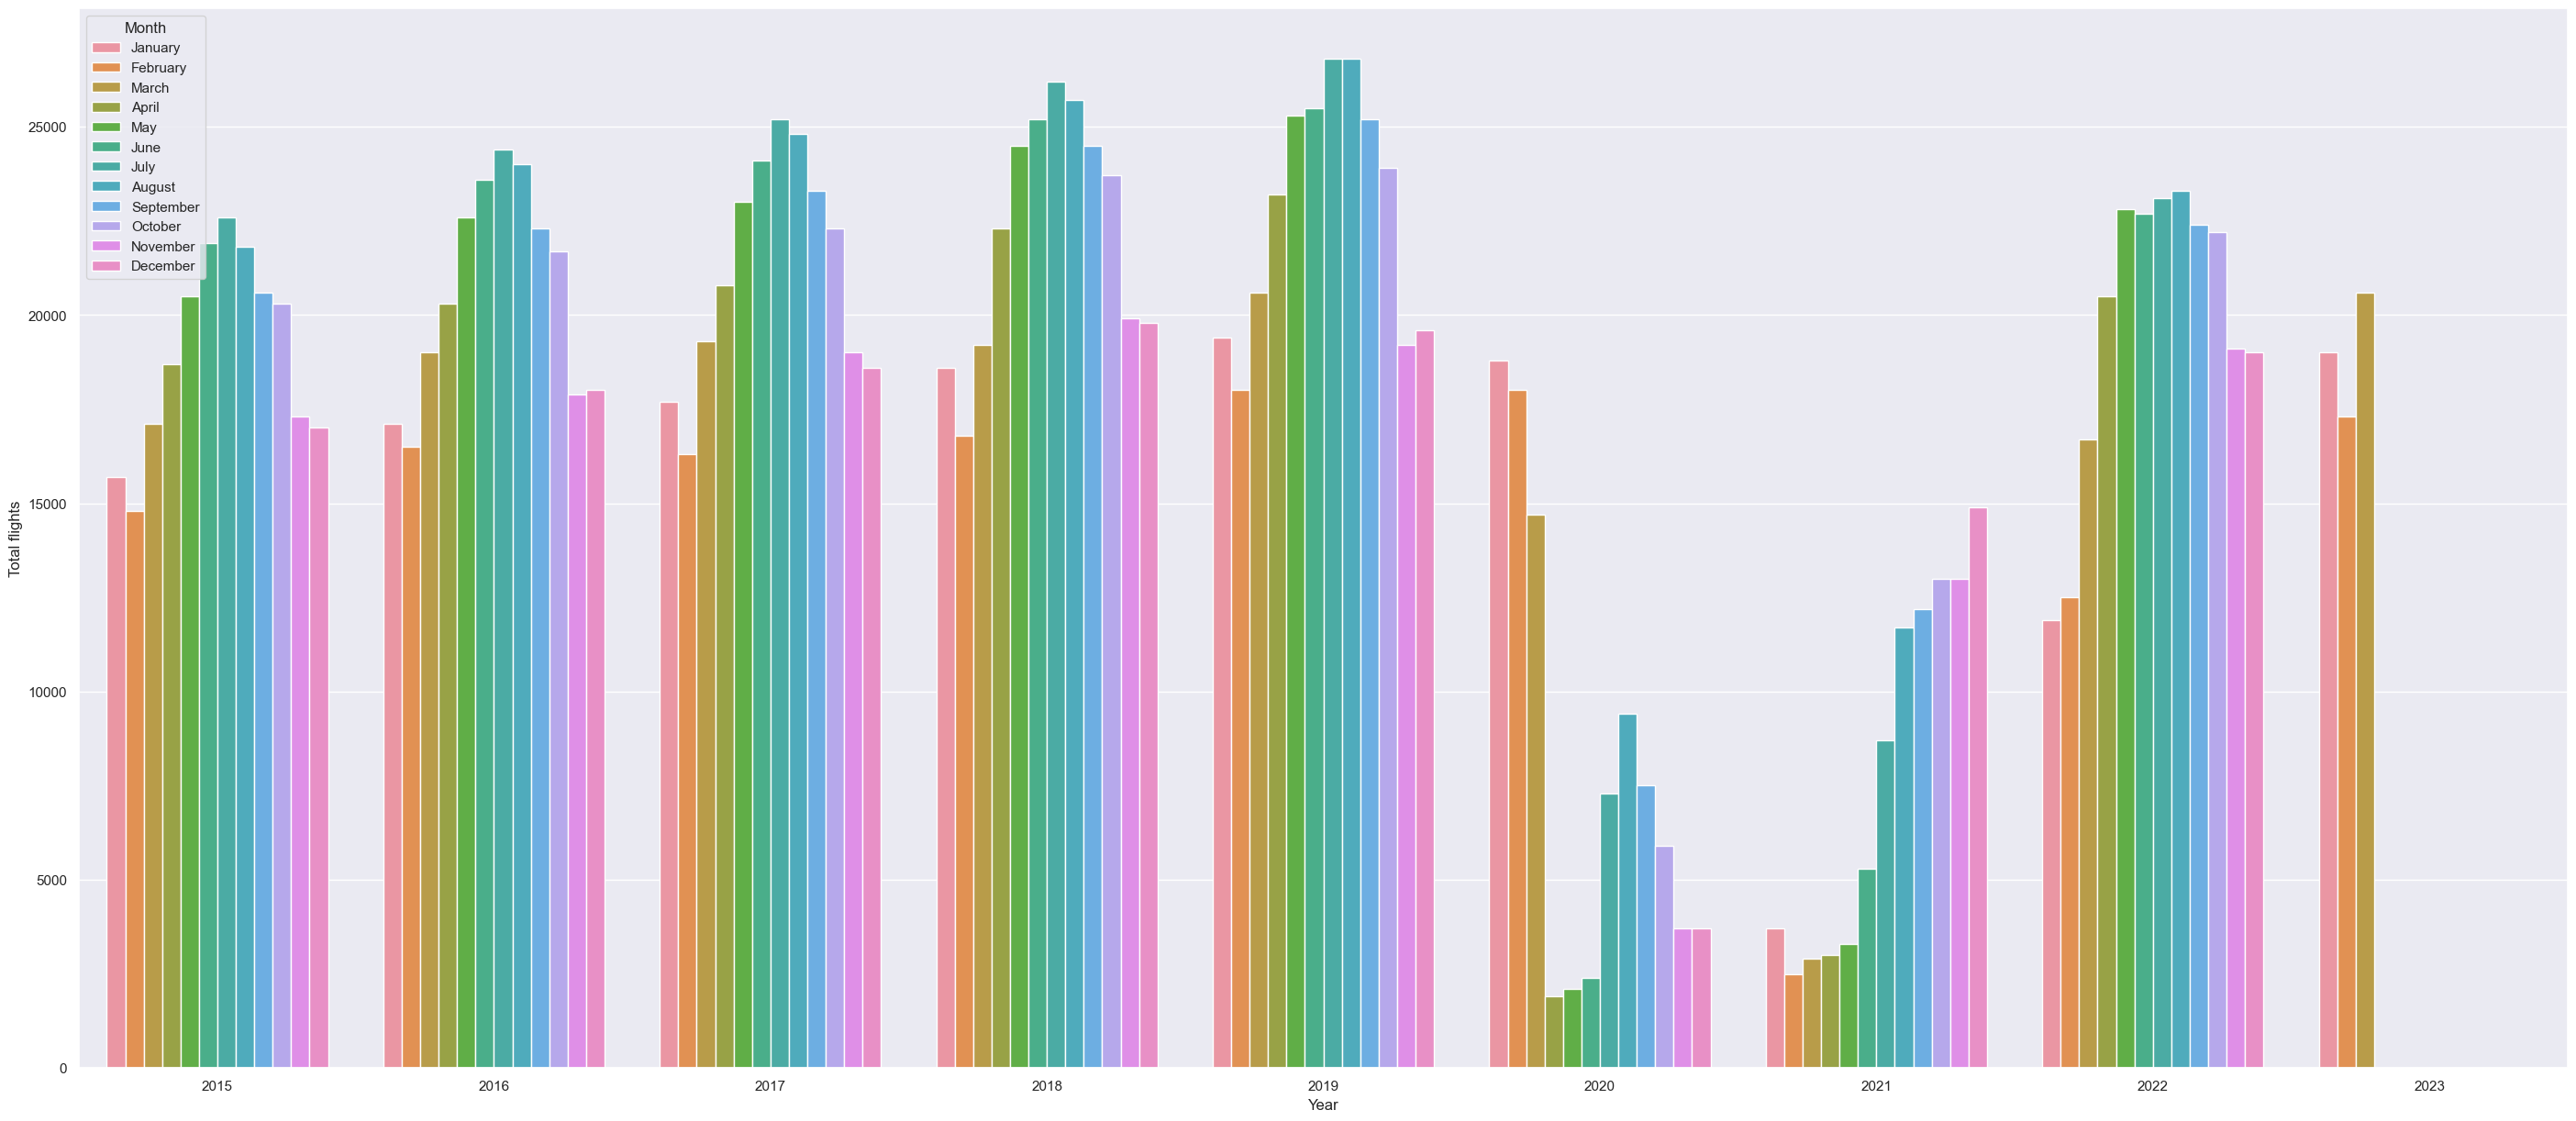

In [121]:
sns.set(rc={'figure.figsize':(35,15)}) #Understanding the total numbers through the years
sns.barplot(x=dfIrTotal.Year, y=dfIrTotal['Total flights'], hue=dfIrTotal.Month)

<Axes: xlabel='Year', ylabel='Total passengers'>

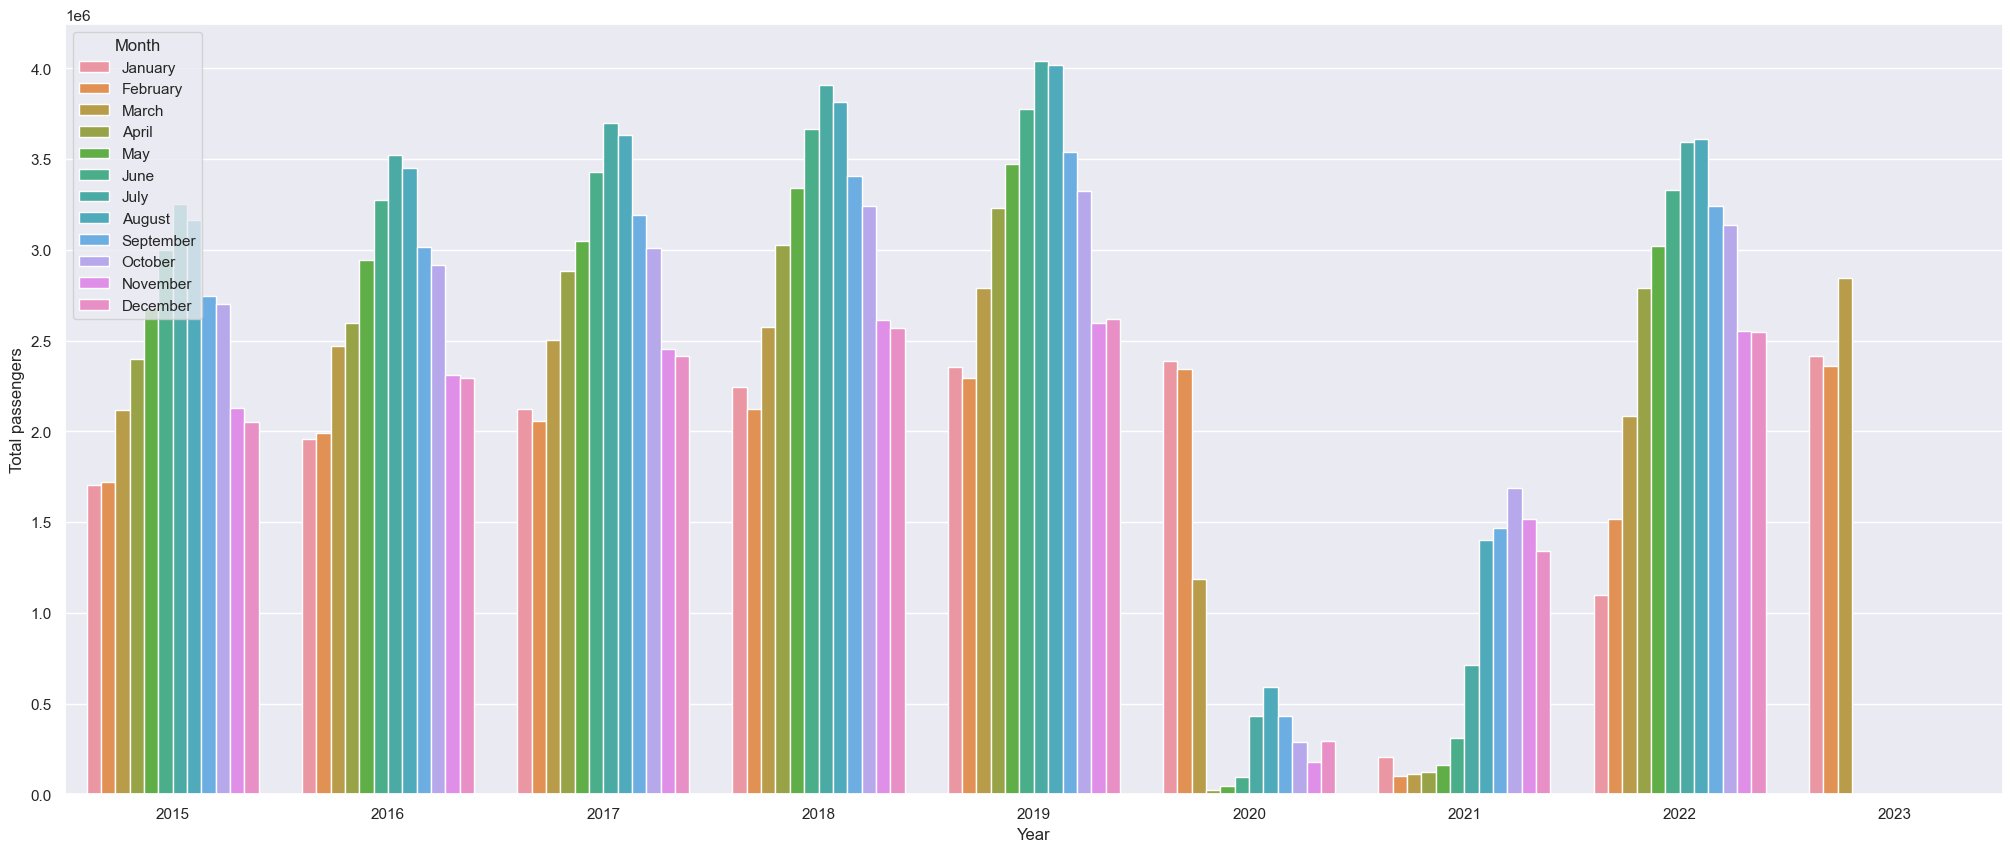

In [122]:
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x=dfIrTotal.Year, y=dfIrTotal['Total passengers'],hue=dfIrTotal['Month'])

<Axes: xlabel='Year', ylabel='Total cargo'>

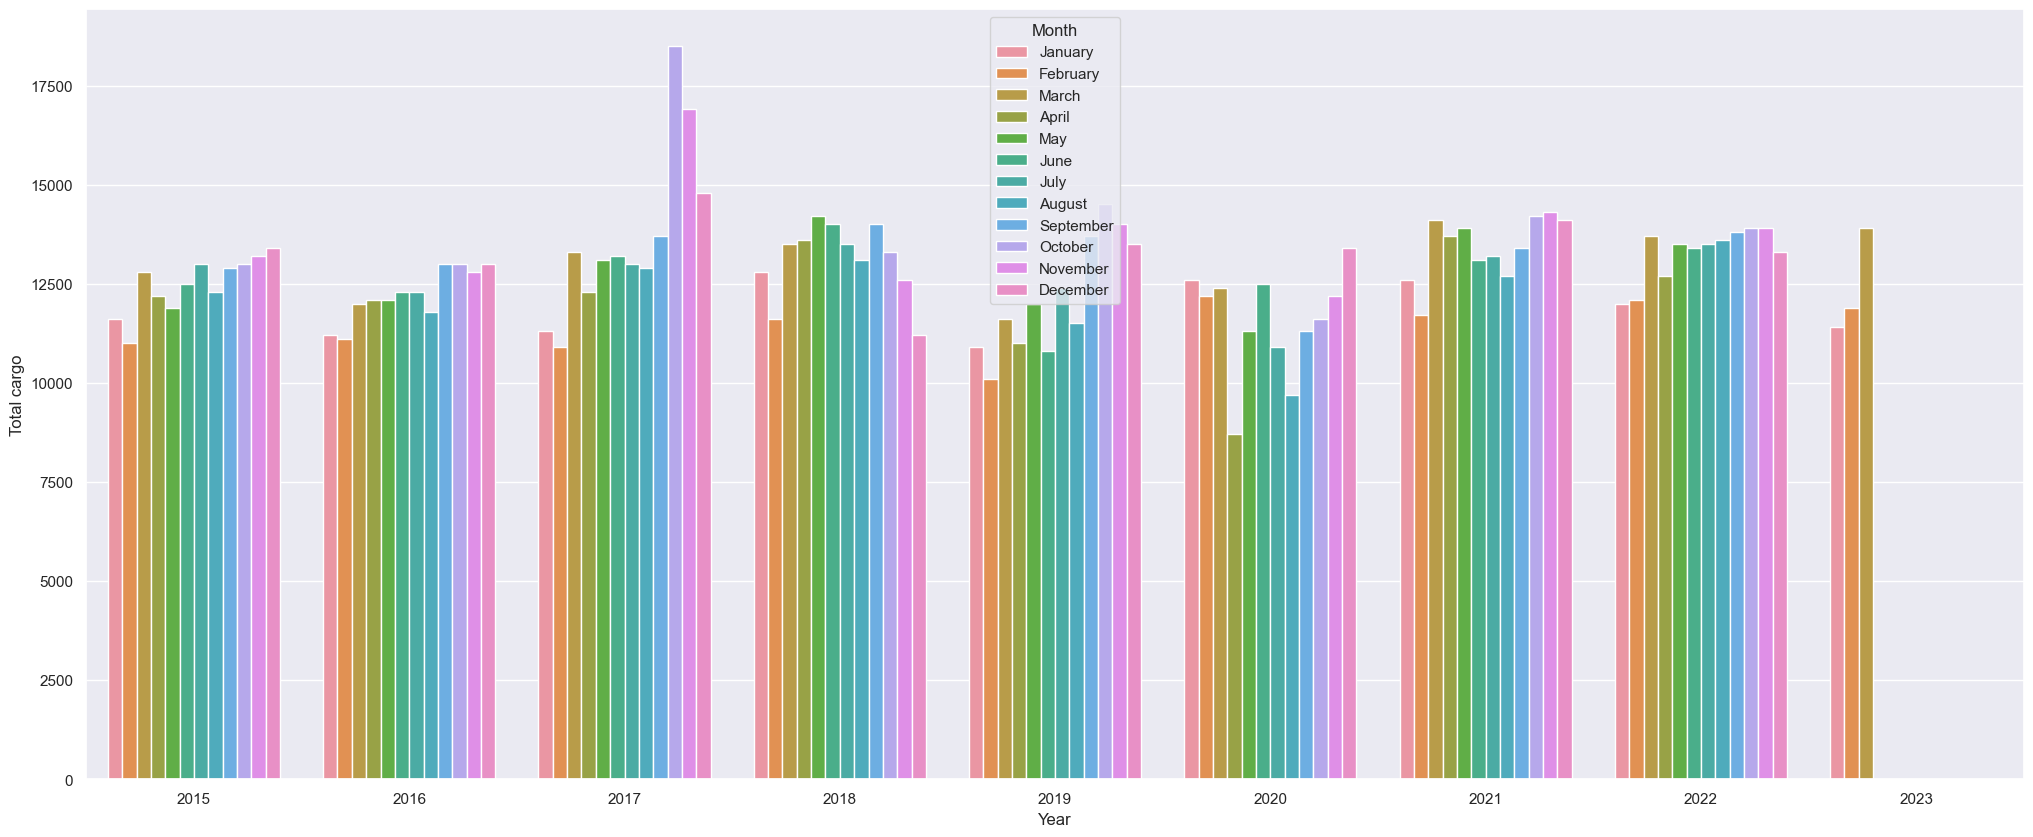

In [123]:
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x=dfIrTotal.Year, y=dfIrTotal['Total cargo'],hue=dfIrTotal['Month'])

## Identyfing outliers

In [124]:
dfIrTotal.describe()

Year  Total flights  Scheduled flights  Non-scheduled flights  \
count    99.000000      99.000000          99.000000              99.000000   
mean   2018.636364   17704.040404       17460.606061             247.474747   
std       2.396658    6793.558161        6700.941423             162.470364   
min    2015.000000    1900.000000        1800.000000               0.000000   
25%    2017.000000   15300.000000       15050.000000             100.000000   
50%    2019.000000   19200.000000       19000.000000             200.000000   
75%    2021.000000   22650.000000       22350.000000             300.000000   
max    2023.000000   26800.000000       26300.000000             700.000000   

       Total arrival flights  Scheduled arrival flights  \
count              99.000000                  99.000000   
mean             8859.595960                8730.303030   
std              3402.277724                3350.219443   
min               900.000000                 900.000000   
25%              7650.000000                7500.000000   
50%              9600.000000                9500.000000   
75%             11350.000000               11150.000000   
max             13400.000000               13100.000000   

       Non-scheduled arrival flights  Total departure flights  \
count                      99.000000                99.000000   
mean                      121.212121              8844.444444   
std                        88.378508              3395.622098   
min                         0.000000               900.000000   
25%                       100.000000              7650.000000   
50%                       100.000000              9600.000000   
75%                       150.000000             11350.000000   
max                       300.000000             13400.000000   

       Scheduled departure flights  Non-scheduled departure flights  \
count                    99.000000                        99.000000   
mean                   8727.272727                       118.181818   
std                    3341.508219                        88.483408   
min                     900.000000                         0.000000   
25%                    7550.000000                       100.000000   
50%                    9500.000000                       100.000000   
75%                   11150.000000                       200.000000   
max                   13100.000000                       300.000000   

        Total cargo  Scheduled cargo  Non-scheduled cargo  \
count     99.000000        99.000000            99.000000   
mean   12729.292929     12568.686869           156.565657   
std     1335.179612      1145.768298           432.402311   
min     8700.000000      8500.000000             0.000000   
25%    11950.000000     11850.000000             0.000000   
50%    12800.000000     12700.000000           100.000000   
75%    13500.000000     13400.000000           200.000000   
max    18500.000000     15000.000000          3900.000000   

       Total unloaded cargo  Unloaded scheluled cargo  \
count             99.000000                 99.000000   
mean            6671.717172               6620.202020   
std              610.794131                570.888995   
min             4800.000000               4800.000000   
25%             6250.000000               6200.000000   
50%             6700.000000               6700.000000   
75%             7000.000000               7000.000000   
max             8300.000000               7600.000000   

       Unloaded non-scheduled cargo  Total loaded cargo  \
count                     99.000000           99.000000   
mean                      43.434343         6063.636364   
std                      107.058649          833.661036   
min                        0.000000         3900.000000   
25%                        0.000000         5650.000000   
50%                        0.000000         6100.000000   
75%                        0.000000         6500.000000   
max     

<Axes: >

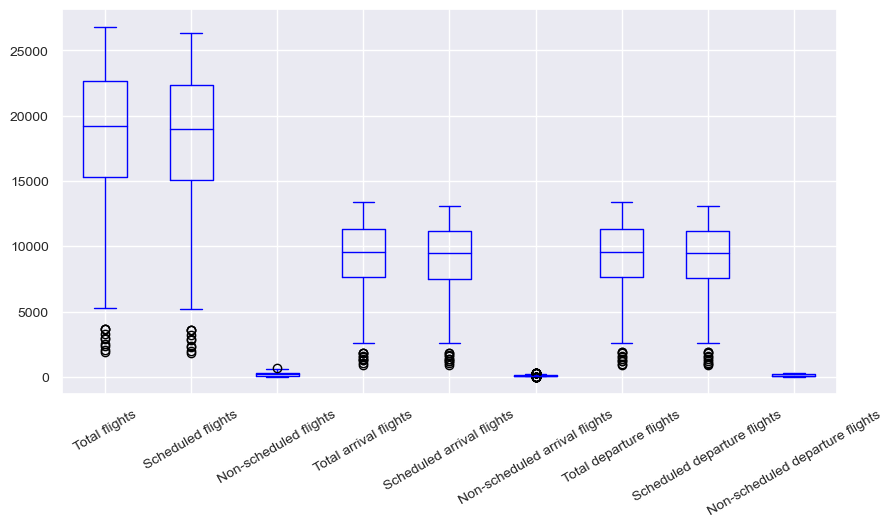

In [125]:
 #Identifying outliers for flights
plt.rcParams['figure.figsize'] = (10,5)
dfIrTotal.iloc[:,2:11].boxplot(grid='true', color='blue',fontsize=10, rot=30)

<Axes: >

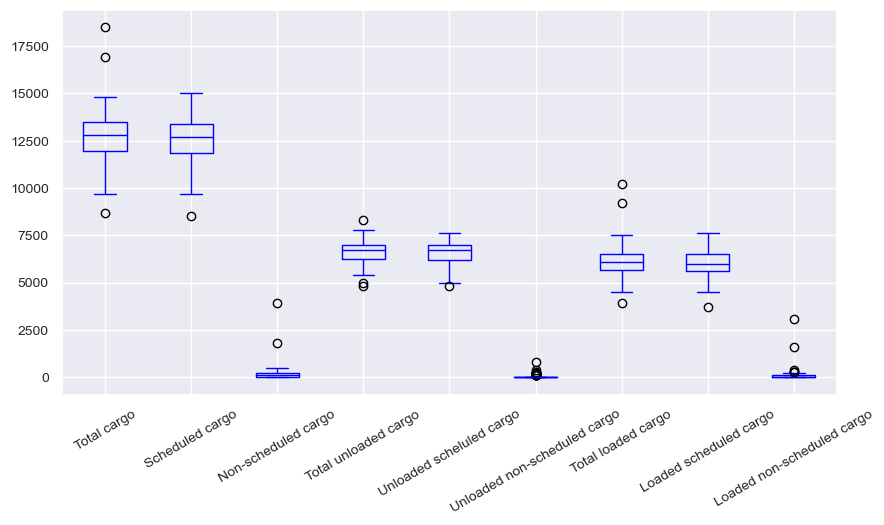

In [126]:
#Identifying outliers for cargo
plt.rcParams['figure.figsize'] = (10,5)
dfIrTotal.iloc[:,11:20].boxplot(grid='true', color='blue',fontsize=10, rot=30)

<Axes: >

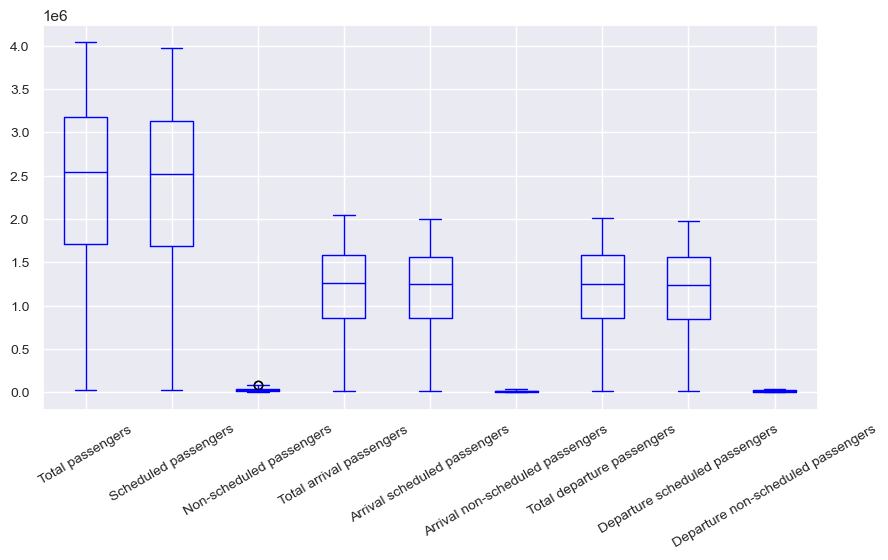

In [127]:
#Identifying outliers for passengers
plt.rcParams['figure.figsize'] = (10,5)
dfIrTotal.iloc[:,20:].boxplot(grid='true', color='blue',fontsize=10, rot=30)

In [128]:
dfIrTotal = outlier(dfIrTotal) #Same function can be called

dfIrTotal = dfIrTotal.fillna(dfIrTotal.median())

C:\Users\ruben\AppData\Local\Temp\ipykernel_9112\772409576.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfIrTotal = dfIrTotal.fillna(dfIrTotal.median())


<Axes: >

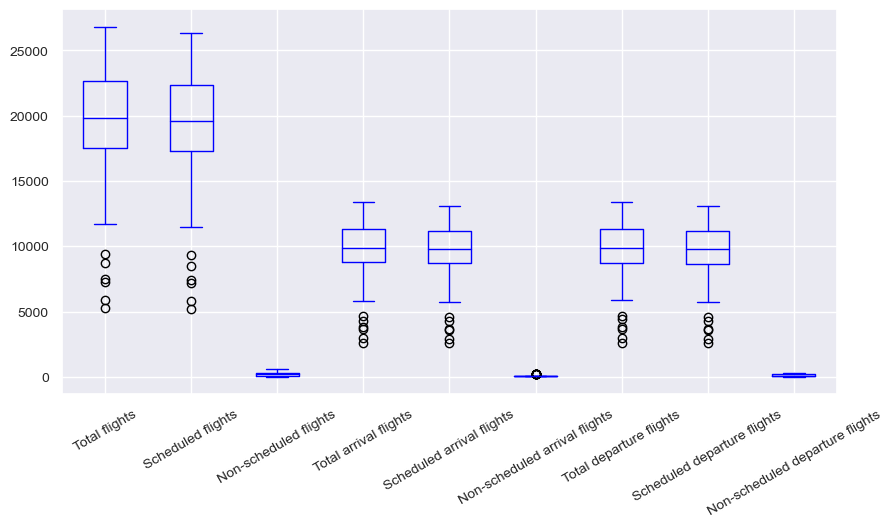

In [129]:
 #Confirming most outliers were dropped for flights
plt.rcParams['figure.figsize'] = (10,5)
dfIrTotal.iloc[:,2:11].boxplot(grid='true', color='blue',fontsize=10, rot=30)

<Axes: >

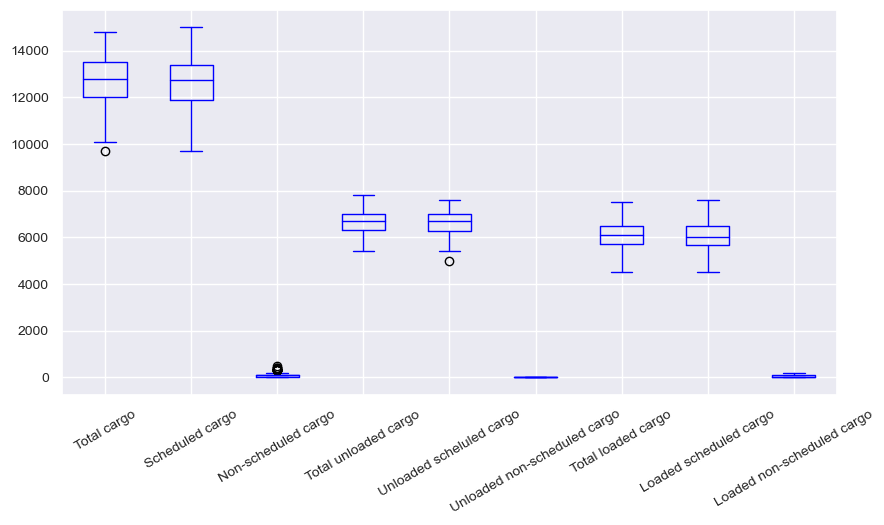

In [130]:
#Confirming most outliers were dropped for cargo
plt.rcParams['figure.figsize'] = (10,5)
dfIrTotal.iloc[:,11:20].boxplot(grid='true', color='blue',fontsize=10, rot=30)

<Axes: >

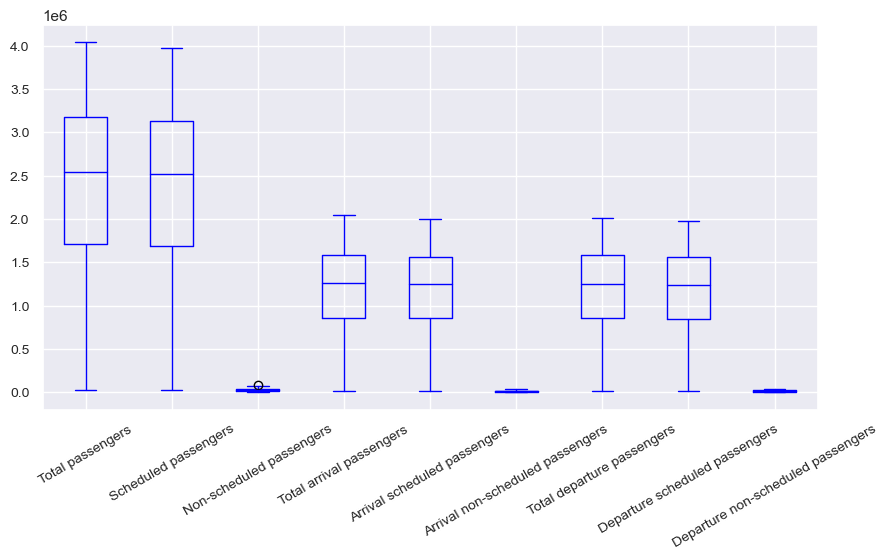

In [131]:
#COnfirming outliers changed for passengers

#Some outliers increased due to the outlier elimination in other features, but they are way less than the original ones in other features
plt.rcParams['figure.figsize'] = (10,5)
dfIrTotal.iloc[:,20:].boxplot(grid='true', color='blue',fontsize=10, rot=30)

C:\Users\ruben\AppData\Local\Temp\ipykernel_9112\3956342518.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= dfIrTotal.corr()


Year  Total flights  \
Year                                1.000000      -0.239264   
Total flights                      -0.239264       1.000000   
Scheduled flights                  -0.230840       0.999634   
Non-scheduled flights              -0.384330       0.535734   
Total arrival flights              -0.239226       0.999890   
Scheduled arrival flights          -0.231403       0.999581   
Non-scheduled arrival flights      -0.060176       0.311193   
Total departure flights            -0.235132       0.999899   
Scheduled departure flights        -0.229456       0.999584   
Non-scheduled departure flights    -0.411189       0.549073   
Total cargo                         0.175573       0.243497   
Scheduled cargo                     0.115396       0.256502   
Non-scheduled cargo                 0.318048      -0.077435   
Total unloaded cargo                0.269769       0.145479   
Unloaded scheluled cargo            0.211376       0.225443   
Unloaded non-scheduled cargo             NaN            NaN   
Total loaded cargo                  0.078233       0.233842   
Loaded scheduled cargo              0.014936       0.254146   
Loaded non-scheduled cargo          0.232874      -0.064138   
Total passengers                   -0.322281       0.723632   
Scheduled passengers               -0.318816       0.721633   
Non-scheduled passengers           -0.369238       0.602514   
Total arrival passengers           -0.318948       0.721314   
Arrival scheduled passengers       -0.315306       0.719374   
Arrival non-scheduled passengers   -0.399468       0.620131   
Total departure passengers         -0.325204       0.725039   
Departure scheduled passengers     -0.321906       0.722987   
Departure non-scheduled passengers -0.387819       0.625970   

                                    Scheduled flights  Non-scheduled flights  \
Year                                        -0.230840              -0.384330   
Total flights                                0.999634               0.535734   
Scheduled flights                            1.000000               0.516528   
Non-scheduled flights                        0.516528               1.000000   
Total arrival flights                        0.999525               0.536375   
Scheduled arrival flights                    0.999911               0.516672   
Non-scheduled arrival flights                0.305563               0.417204   
Total departure flights                      0.999528               0.536348   
Scheduled departure flights                  0.999916               0.516452   
Non-scheduled departure flights              0.530625               0.882964   
Total cargo                                  0.247906              -0.009452   
Scheduled cargo                              0.261239              -0.008499   
Non-scheduled cargo                         -0.075645              -0.132615   
Total unloaded cargo                         0.152056              -0.138951   
Unloaded scheluled cargo                     0.231474              -0.078209   
Unloaded non-scheduled cargo                      NaN                    NaN   
Total loaded cargo                           0.236158               0.061880   
Loaded scheduled cargo                       0.257165               0.057227   
Loaded non-scheduled cargo                  -0.062507              -0.090291   
Total passengers                             0.719584               0.674418   
Scheduled passengers                         0.717932               0.664754   
Non-scheduled passengers                     0.585877               0.934913   
Total arrival passengers                     0.717371               0.672605   
Arrival scheduled passengers                 0.715778               0.662871   
Arrival non-scheduled passengers             0.601611               0.934576   
Total departure passengers                   0.720892               0.675385   
Departure scheduled passengers               0.71918

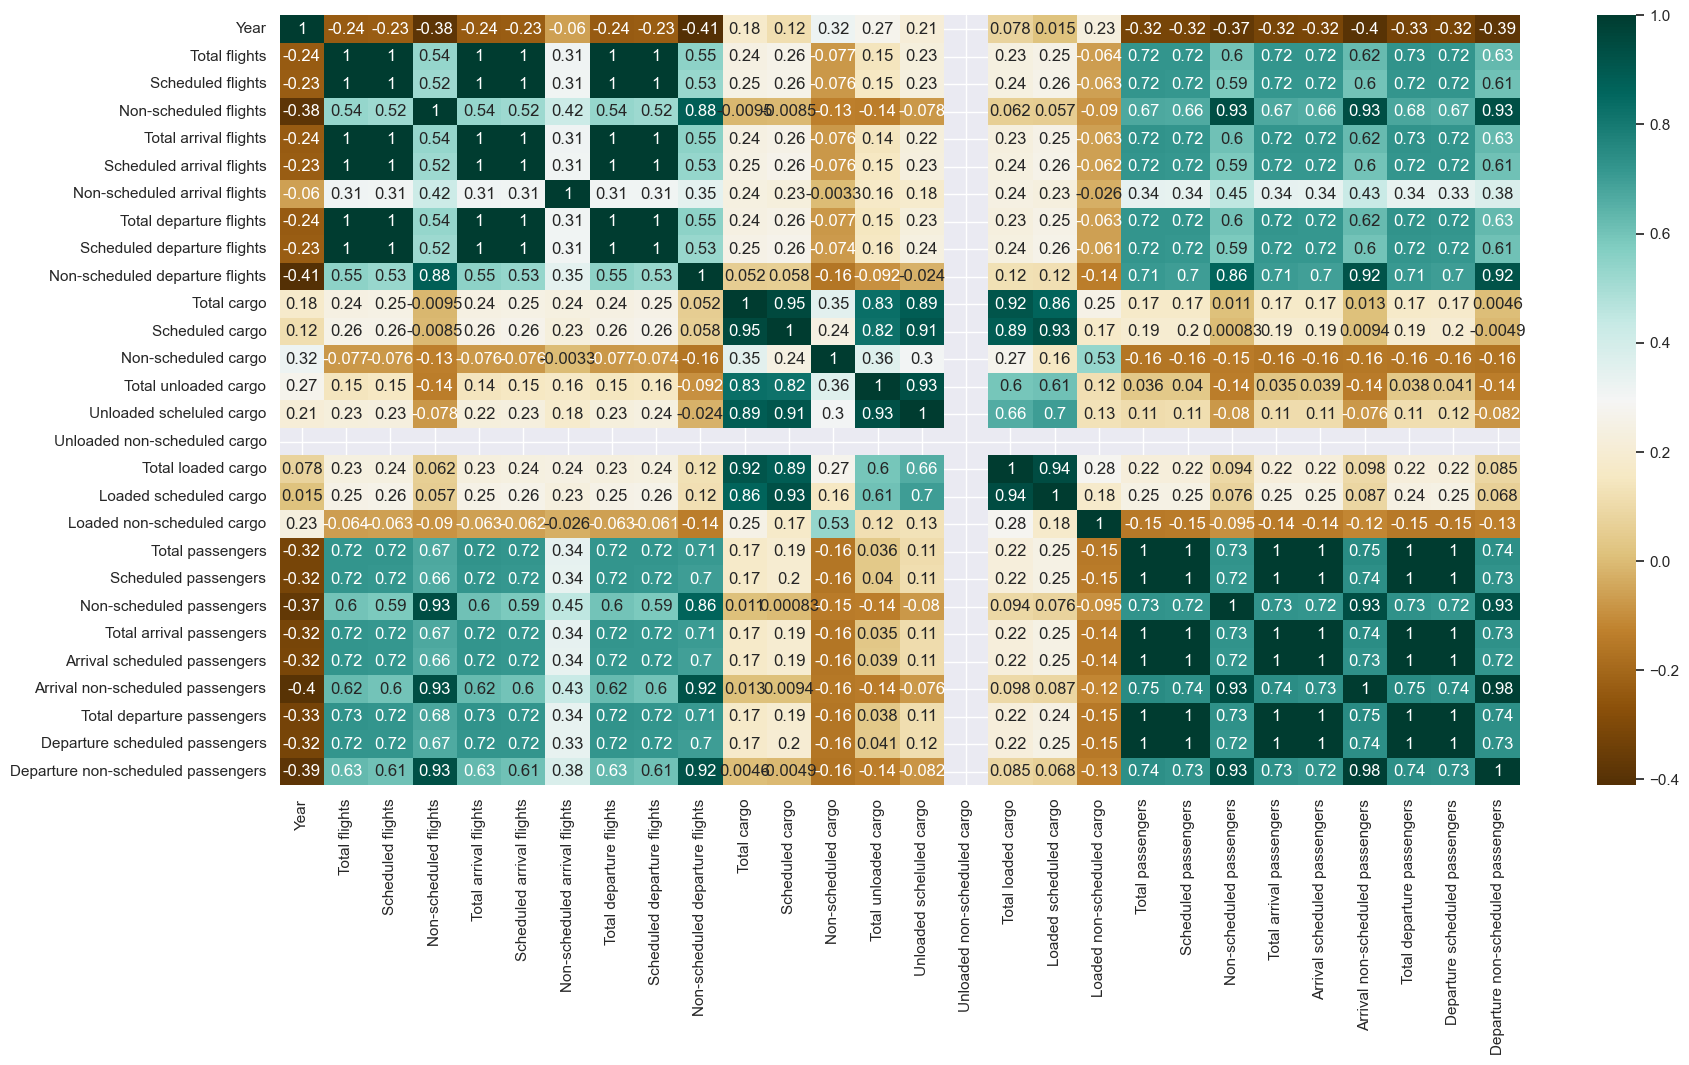

In [132]:
plt.figure(figsize=(20,10))
c= dfIrTotal.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

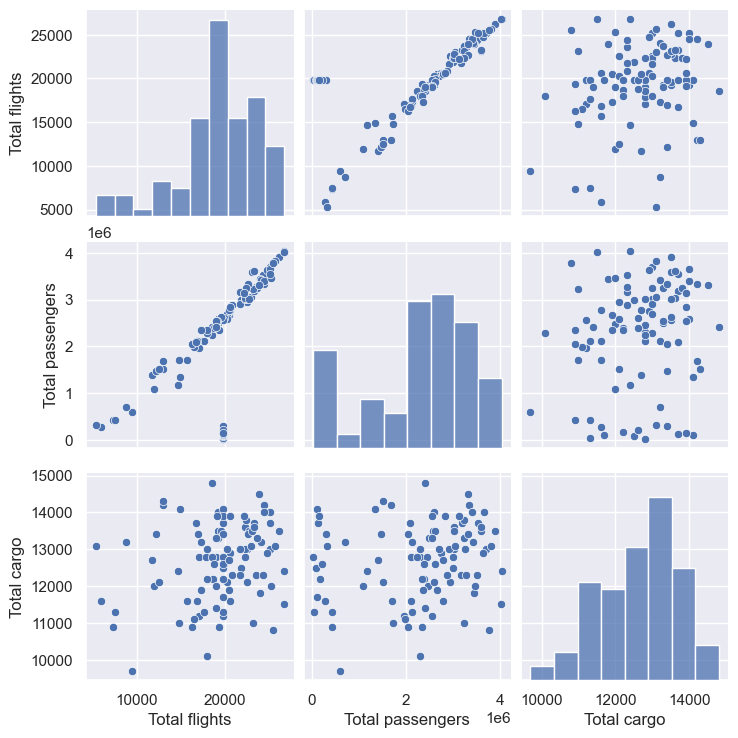

In [133]:
sns.pairplot(dfIrTotal[['Total flights','Total passengers','Total cargo']])

In [134]:
dfMerged = pd.merge(dfNdTotal, dfIrTotal, on=['Year','Month'],suffixes=(' Nd', ' Ir'))

In [135]:
dfMerged.drop('Airports', axis=1)

Year     Month  Cross-country flights  Local flights  Total flights Nd  \
0   2015   January                37288.0         3315.0           35424.0   
1   2015  February                36279.0         4654.0           34013.0   
2   2015     March                41870.0         5089.0           38723.0   
3   2015     April                45402.0         5802.0           42263.0   
4   2015       May                49852.0         4453.0           46525.0   
..   ...       ...                    ...            ...               ...   
94  2022  November                37876.0         5771.0           34597.0   
95  2022  December                37591.0         4447.0           34968.0   
96  2023   January                37038.0         6455.0           34322.0   
97  2023  February                35573.0         6982.0           32416.0   
98  2023     March                41983.0         7044.0           38044.0   

    Scheduled flights Nd  Non-scheduled flights Nd  Total arrival flights Nd  \
0                34028.0                    1396.0                   17679.0   
1                32608.0                    1405.0                   17001.0   
2                37208.0                    1515.0                   19371.0   
3                40040.0                    2223.0                   21126.0   
4                42848.0                    1252.0                   23258.0   
..                   ...                       ...                       ...   
94               33820.0                     777.0                   17292.0   
95               34327.0                     641.0                   17489.0   
96               33553.0                     769.0                   17149.0   
97               31673.0                     743.0                   16218.0   
98               37109.0                     935.0                   19009.0   

    Scheduled arrival flights Nd  Non-scheduled arrival flights Nd  \
0                        16987.0                             692.0   
1                        16320.0                             681.0   
2                        18617.0                             754.0   
3                        20014.0                            1112.0   
4                        21451.0                             610.0   
..                           ...                               ...   
94                       16905.0                             387.0   
95                       17136.0                             353.0   
96                       16768.0                             381.0   
97                       15823.0                             395.0   
98                       18542.0                             467.0   

    Total departure flights Nd  Scheduled departure flights Nd  \
0                      17745.0                         17041.0   
1                      17012.0                         16288.0   
2                      19352.0                         18591.0   
3                      21137.0                         20026.0   
4                      23267.0                         21397.0   
..                         ...                             ...   
94                     17305.0                         16915.0   
95                     17479.0                         17191.0   
96                     17173.0                         16785.0   
97                     16198.0                         15850.0   
98                     19035.0                         18567.0   

    Non-scheduled departure flights Nd  Total passengers Nd  \
0                                704.0            4067159.0   
1                                724.0            3975652.0   
2                                761.0            4651418.0   
3                               1111.0            5318300.0   
4                                629.0            6064935.0   
..                                 ...                  ...   
94                             

In [136]:
dfMerged[['Year','Month','Total flights Ir','Total flights Nd','Total passengers Ir', 'Total passengers Nd', 'Total cargo Ir', 'Total cargo Nd']].head(10)

Year      Month  Total flights Ir  Total flights Nd  Total passengers Ir  \
0  2015    January           15700.0           35424.0            1702000.0   
1  2015   February           14800.0           34013.0            1719400.0   
2  2015      March           17100.0           38723.0            2119900.0   
3  2015      April           18700.0           42263.0            2398400.0   
4  2015        May           20500.0           46525.0            2673000.0   
5  2015       June           21900.0           45459.0            3001100.0   
6  2015       July           22600.0           47783.0            3252100.0   
7  2015     August           21800.0           47532.0            3166500.0   
8  2015  September           20600.0           45886.0            2748000.0   
9  2015    October           20300.0           45332.0            2699700.0   

   Total passengers Nd  Total cargo Ir  Total cargo Nd  
0            4067159.0         11600.0        124315.0  
1            3975652.0         11000.0        130082.0  
2            4651418.0         12800.0        144166.0  
3            5318300.0         12200.0        133041.0  
4            6064935.0         11900.0        142064.0  
5            5971077.0         12500.0        136586.0  
6            6568499.0         13000.0        137417.0  
7            6606203.0         12300.0        141268.0  
8            6115762.0         12900.0        141601.0  
9            5940890.0         13000.0        151020.0

In [137]:
dfMerged[['Year','Month','Total flights Ir','Total flights Nd','Total passengers Ir', 'Total passengers Nd', 'Total cargo Ir', 'Total cargo Nd']].tail(15)

Year      Month  Total flights Ir  Total flights Nd  Total passengers Ir  \
84  2022    January           11900.0           29604.0            1097600.0   
85  2022   February           12500.0           27456.0            1516700.0   
86  2022      March           16700.0           34568.0            2085900.0   
87  2022      April           20500.0           38824.0            2789700.0   
88  2022        May           22800.0           44823.0            3018100.0   
89  2022       June           22700.0           43248.0            3327100.0   
90  2022       July           23100.0           43218.0            3595200.0   
91  2022     August           23300.0           44862.0            3608300.0   
92  2022  September           22400.0           43523.0            3240700.0   
93  2022    October           22200.0           42909.0            3138600.0   
94  2022   November           19100.0           34597.0            2551100.0   
95  2022   December           19000.0           34968.0            2549100.0   
96  2023    January           19000.0           34322.0            2416800.0   
97  2023   February           17300.0           32416.0            2361400.0   
98  2023      March           20600.0           38044.0            2843700.0   

    Total passengers Nd  Total cargo Ir  Total cargo Nd  
84            2831598.0         12000.0        131588.0  
85            3040193.0         12100.0        126020.0  
86            4241663.0         13700.0        137570.0  
87            5140272.0         12700.0        126658.0  
88            6091195.0         13500.0        128112.0  
89            6118070.0         13400.0        125858.0  
90            6211931.0         13500.0        130029.0  
91            6378969.0         13600.0        125037.0  
92            6108567.0         13800.0        130738.0  
93            5854649.0         13900.0        135512.0  
94            4570458.0         13900.0        128395.0  
95            4680493.0         13300.0        120439.0  
96            4480014.0         11400.0        109114.0  
97            4348644.0         11900.0        113147.0  
98            5276851.0         13900.0        125407.0

Netherlands Total Flights Skewness: -1.01
Ireland Total Flights Skewness: -1.02
Netherlands Total Flight Kurtosis: 0.87
Ireland Total Flights Kurtosis: 1.13


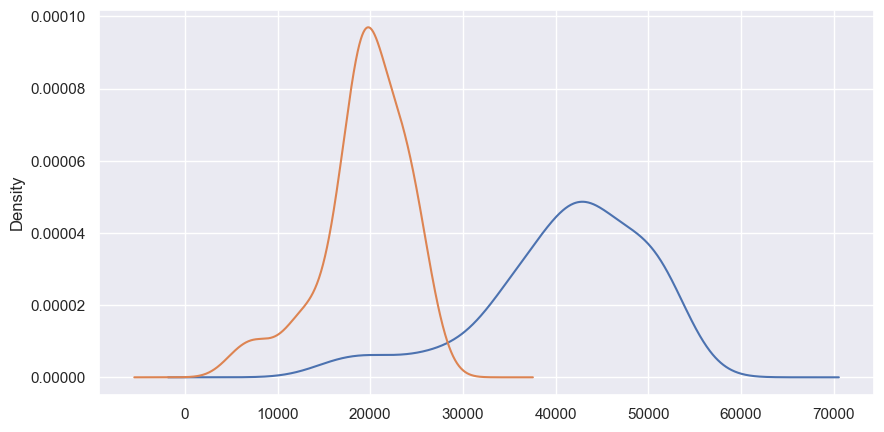

In [138]:
ax = dfMerged['Total flights Nd'].plot.kde()
ax = dfMerged['Total flights Ir'].plot.kde()
NdSk = dfMerged['Total flights Nd'].skew()
IrSk = dfMerged['Total flights Ir'].skew()
NdKu = dfMerged['Total flights Nd'].kurtosis()
IrKu = dfMerged['Total flights Ir'].kurtosis()
print('Netherlands Total Flights Skewness: {}\nIreland Total Flights Skewness: {}'.format(round(NdSk,2),round(IrSk,2)))
print('Netherlands Total Flight Kurtosis: {}\nIreland Total Flights Kurtosis: {}'.format(round(NdKu,2),round(IrKu,2)))

Netherlands Total passengers Skewness: -0.94
Ireland Total passengers Skewness: -0.72
Netherlands Total passengers Kurtosis: 0.6
Ireland Total passengers Kurtosis: -0.44


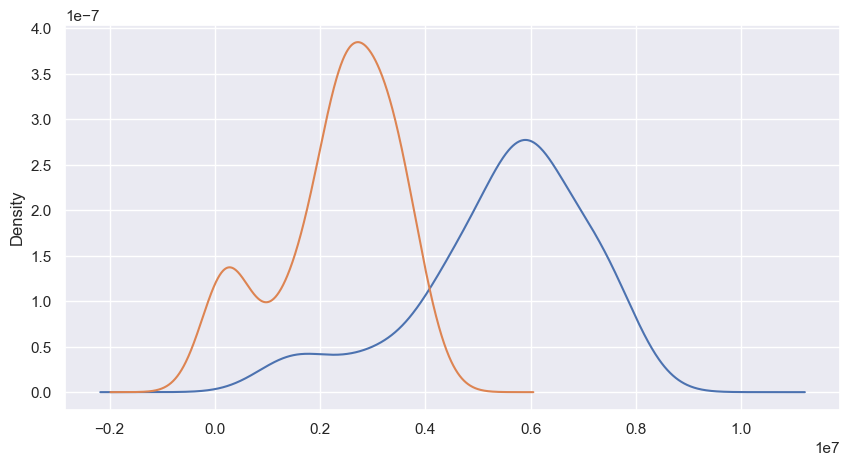

In [139]:
ax = dfMerged['Total passengers Nd'].plot.kde()
ax = dfMerged['Total passengers Ir'].plot.kde()
NdSkP = dfMerged['Total passengers Nd'].skew()
IrSkP = dfMerged['Total passengers Ir'].skew()
NdKuP = dfMerged['Total passengers Nd'].kurtosis()
IrKuP = dfMerged['Total passengers Ir'].kurtosis()
print('Netherlands Total passengers Skewness: {}\nIreland Total passengers Skewness: {}'.format(round(NdSkP,2),round(IrSkP,2)))
print('Netherlands Total passengers Kurtosis: {}\nIreland Total passengers Kurtosis: {}'.format(round(NdKuP,2),round(IrKuP,2)))

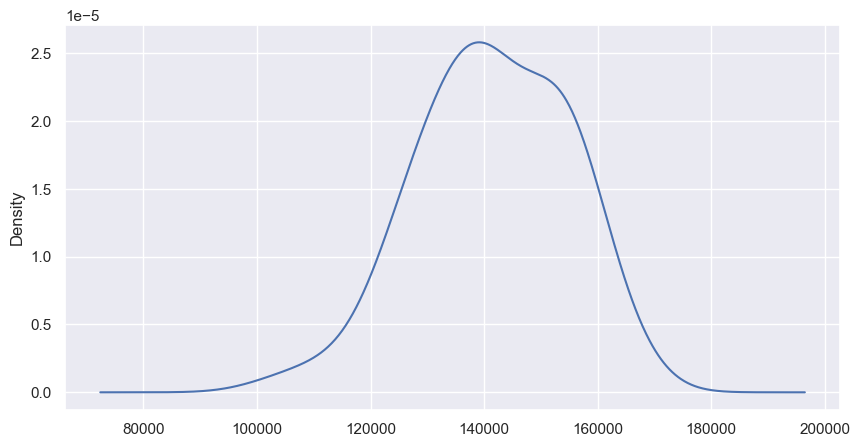

In [140]:
ax = dfMerged['Total cargo Nd'].plot.kde(bw_method=.5)


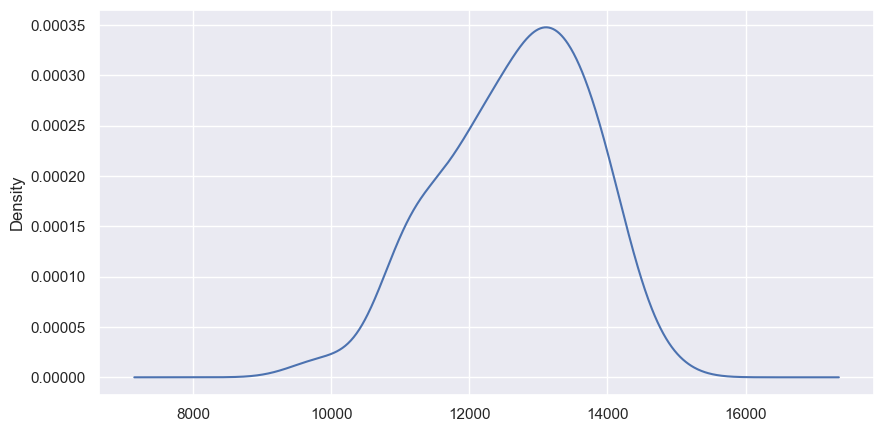

In [141]:
ax = dfMerged['Total cargo Ir'].plot.kde()

# Sentiment analysis

### Getting the Reddit information for Schipol Airport and Dublin airport posts and preprocessing

In [142]:
import requests
 
subreddit = 'ireland'
limit = 100
timeframe = 'all' 
listing = '12ybteq' 
 
def get_reddit(subreddit,listing,limit,timeframe):
    try:
        base_url = f'https://www.reddit.com/r/{subreddit}/comments/{listing}.json?limit={limit}&t={timeframe}&depth=0'
        request = requests.get(base_url, headers = {'User-agent': 'yourbot'})
    except:
        print('An Error Occured')
    return request.json()
 
r = get_reddit('ireland','12ybteq',200,'all')

In [143]:
print(r)

[{'kind': 'Listing', 'data': {'after': None, 'dist': 1, 'modhash': '', 'geo_filter': '', 'children': [{'kind': 't3', 'data': {'approved_at_utc': None, 'subreddit': 'ireland', 'selftext': 'Was amazing. \n\nI know we like to shit on things a lot as a people (and a sub) but having been away from the country for 4 years and transiting through Dublin Airport was amazing. \n\nCame in from the US and transiting to the UK. Off the plane and through transfers in 10 fucking minutes, along with a 10 second wait at passport check with a "welcome home limestone" from the Garda\n\nThe airport is extremely clean, well signposted and has great facilities. \n\nSuch a contrast to Heathrow or pretty much every airport in the US.', 'user_reports': [], 'saved': False, 'mod_reason_title': None, 'gilded': 0, 'clicked': False, 'title': 'It pains me to say this - but Dublin Airport..', 'link_flair_richtext': [{'e': 'text', 't': 'Careful now'}], 'subreddit_name_prefixed': 'r/ireland', 'hidden': False, 'pwls': 6

In [144]:
def get_results(r):
    myDict = {}
    for post in r[1]['data']['children'][:-1]:
        myDict[post['data']['name']] = {'comment': post['data']['body'],'upvotes':post['data']['ups'],'downvotes':post['data']['downs']}
        print(post['data']['body'])
    df = pd.DataFrame.from_dict(myDict, orient='index')
    return df
 
dfIrSent = get_results(r)
dfIrSent.reset_index()

Outside of that post covid shitshow for a few weeks I've always found it one of the easier airports to get around/get through security.
I cannot lie, the US section of the airport is immaculate.
I don't think anyone really shits on the building/layout itself. It's just that every now and then it's an absolute shitshow staffing wise, queues, etc. Also, commute to it is not ideal.
99% of the time it’s a fantastic airport.

The 1% of the time that it goes wrong, it really, really goes wrong.
I went to a wedding in a South Asian country last year and while the trip was amazing overall, I will never complain about Dublin airport ever again. 

Everything was just utter chaos. Rampant incompetence from everyone working there, a customs officer "escorted" us to our taxi and then tried to get us to pay him €200 (yes, euro not the local currency) until our driver scared him away. They very nearly lost my bag on the way back until I spotted that they had marked it for the wrong flight and made th

index                                            comment  upvotes  \
0   t1_jhmjcr5  Outside of that post covid shitshow for a few ...      639   
1   t1_jhms3p7  I cannot lie, the US section of the airport is...       62   
2   t1_jhmjxqr  I don't think anyone really shits on the build...      170   
3   t1_jhmmiec  99% of the time it’s a fantastic airport.\n\nT...      101   
4   t1_jhmslbi  I went to a wedding in a South Asian country l...       31   
..         ...                                                ...      ...   
78  t1_jhmrwap  Same experience I had after coming back a few ...       -2   
79  t1_jhmuw3g  I always find it funny that in the comments ab...       -2   
80  t1_jhn2w1s  Good to hear, but isn’t it expensive for prett...        1   
81  t1_jhn5tpv  Had a miserable experience of waiting 2+ hours...        1   
82  t1_jhn8va1  The jacks are a national embarassment to be fair.        1   

    downvotes  
0           0  
1           0  
2           0  
3           0  
4           0  
..        ...  
78          0  
79          0  
80          0  
81          0  
82          0  

[83 rows x 4 columns]

In [145]:
r2 = get_reddit('Amsterdam','uvxpf9',200,'all')

In [146]:
dfNdSent = get_results(r2)
dfNdSent.reset_index()

Thanks to /u/fluckyolife for their helpful comment: https://www.reddit.com/r/Amsterdam/comments/uvxpf9/schiphol_megathread/i9wy0wj/?context=3
Travelling to EU country on Sun March 12 around noon, terminal 1. Security line under 5 mins. Very swift.
Traveling to Sofia with a layover in Belgrade so leaving from Departures 3, passport control and all that jazz.
Non-EU passport with a valid Dutch residence permit for work.
Already checked in, hand luggage only.
Arrived in Schiphol Plaza with the bus around 8:26, was in line for security at ~8:32, cleared security by 8:45 and then was in line for passport control until around 9:15. Got to the gate (D) around 9:30.

(It was really messy in the passport control side, some of the self-scan machines weren’t working so they would allow them to cut into the other line, making the wait much longer.)
The train arrived at Schiphol at 0920hrs. We were able to check-in our baggage and go through security by 1000hrs. No issues at all this morning (inter

index                                            comment  upvotes  \
0    t1_idtq81f  Thanks to /u/fluckyolife for their helpful com...        1   
1    t1_jcoqr9e  Travelling to EU country on Sun March 12 aroun...        1   
2    t1_jcep996  Traveling to Sofia with a layover in Belgrade ...        1   
3    t1_jbio2tu  The train arrived at Schiphol at 0920hrs. We w...        1   
4    t1_jaerrx2  Hey everyone. Im flying to Dubai tomorrow and ...        1   
..          ...                                                ...      ...   
112  t1_iuvubvy                     Reply as a reference for later        1   
113  t1_iuv3q1n  1h for check in + security + passport check at...        1   
114  t1_iusosyi                                          [deleted]        1   
115  t1_iusbadp  Security and passport check in departures 2 to...        1   
116  t1_iuqqrqt  Anyone fly with Transavia recently? Heading to...        1   

     downvotes  
0            0  
1            0  
2            0  
3            0  
4            0  
..         ...  
112          0  
113          0  
114          0  
115          0  
116          0  

[117 rows x 4 columns]

In [147]:
dfNdSent.tail()

comment  upvotes  \
t1_iuvubvy                     Reply as a reference for later        1   
t1_iuv3q1n  1h for check in + security + passport check at...        1   
t1_iusosyi                                          [deleted]        1   
t1_iusbadp  Security and passport check in departures 2 to...        1   
t1_iuqqrqt  Anyone fly with Transavia recently? Heading to...        1   

            downvotes  
t1_iuvubvy          0  
t1_iuv3q1n          0  
t1_iusosyi          0  
t1_iusbadp          0  
t1_iuqqrqt          0

In [149]:
dfIrSent['word_count'] = dfIrSent['comment'].apply(lambda x: len(str(x).split(" ")))

In [150]:
dfNdSent['word_count'] = dfNdSent['comment'].apply(lambda x: len(str(x).split(" ")))

In [151]:
dfIrSent.head()

comment  upvotes  \
t1_jhmjcr5  Outside of that post covid shitshow for a few ...      639   
t1_jhms3p7  I cannot lie, the US section of the airport is...       62   
t1_jhmjxqr  I don't think anyone really shits on the build...      170   
t1_jhmmiec  99% of the time it’s a fantastic airport.\n\nT...      101   
t1_jhmslbi  I went to a wedding in a South Asian country l...       31   

            downvotes  word_count  
t1_jhmjcr5          0          24  
t1_jhms3p7          0          11  
t1_jhmjxqr          0          32  
t1_jhmmiec          0          21  
t1_jhmslbi          0         124

In [152]:
dfNdSent.head()

comment  upvotes  \
t1_idtq81f  Thanks to /u/fluckyolife for their helpful com...        1   
t1_jcoqr9e  Travelling to EU country on Sun March 12 aroun...        1   
t1_jcep996  Traveling to Sofia with a layover in Belgrade ...        1   
t1_jbio2tu  The train arrived at Schiphol at 0920hrs. We w...        1   
t1_jaerrx2  Hey everyone. Im flying to Dubai tomorrow and ...        1   

            downvotes  word_count  
t1_idtq81f          0           8  
t1_jcoqr9e          0          19  
t1_jcep996          0         101  
t1_jbio2tu          0          29  
t1_jaerrx2          0          27

In [153]:
dfIrSent['char_count'] = dfIrSent['comment'].str.len() 
dfNdSent['char_count'] = dfNdSent['comment'].str.len() 

In [154]:
dfIrSent.head()


comment  upvotes  \
t1_jhmjcr5  Outside of that post covid shitshow for a few ...      639   
t1_jhms3p7  I cannot lie, the US section of the airport is...       62   
t1_jhmjxqr  I don't think anyone really shits on the build...      170   
t1_jhmmiec  99% of the time it’s a fantastic airport.\n\nT...      101   
t1_jhmslbi  I went to a wedding in a South Asian country l...       31   

            downvotes  word_count  char_count  
t1_jhmjcr5          0          24         135  
t1_jhms3p7          0          11          58  
t1_jhmjxqr          0          32         186  
t1_jhmmiec          0          21         111  
t1_jhmslbi          0         124         686

In [155]:
dfNdSent.head()

comment  upvotes  \
t1_idtq81f  Thanks to /u/fluckyolife for their helpful com...        1   
t1_jcoqr9e  Travelling to EU country on Sun March 12 aroun...        1   
t1_jcep996  Traveling to Sofia with a layover in Belgrade ...        1   
t1_jbio2tu  The train arrived at Schiphol at 0920hrs. We w...        1   
t1_jaerrx2  Hey everyone. Im flying to Dubai tomorrow and ...        1   

            downvotes  word_count  char_count  
t1_idtq81f          0           8         141  
t1_jcoqr9e          0          19         105  
t1_jcep996          0         101         600  
t1_jbio2tu          0          29         170  
t1_jaerrx2          0          27         128

In [156]:
def avg_word(sentence): #Function to calculate the average word length of each comment
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

In [157]:
dfIrSent['avg_word'] = dfIrSent['comment'].apply(lambda x: avg_word(x))
dfNdSent['avg_word'] = dfNdSent['comment'].apply(lambda x: avg_word(x))

In [158]:
dfIrSent.head()

comment  upvotes  \
t1_jhmjcr5  Outside of that post covid shitshow for a few ...      639   
t1_jhms3p7  I cannot lie, the US section of the airport is...       62   
t1_jhmjxqr  I don't think anyone really shits on the build...      170   
t1_jhmmiec  99% of the time it’s a fantastic airport.\n\nT...      101   
t1_jhmslbi  I went to a wedding in a South Asian country l...       31   

            downvotes  word_count  char_count  avg_word  
t1_jhmjcr5          0          24         135  4.666667  
t1_jhms3p7          0          11          58  4.363636  
t1_jhmjxqr          0          32         186  4.843750  
t1_jhmmiec          0          21         111  4.045455  
t1_jhmslbi          0         124         686  4.472000

In [159]:
dfNdSent.head()

comment  upvotes  \
t1_idtq81f  Thanks to /u/fluckyolife for their helpful com...        1   
t1_jcoqr9e  Travelling to EU country on Sun March 12 aroun...        1   
t1_jcep996  Traveling to Sofia with a layover in Belgrade ...        1   
t1_jbio2tu  The train arrived at Schiphol at 0920hrs. We w...        1   
t1_jaerrx2  Hey everyone. Im flying to Dubai tomorrow and ...        1   

            downvotes  word_count  char_count   avg_word  
t1_idtq81f          0           8         141  16.750000  
t1_jcoqr9e          0          19         105   4.578947  
t1_jcep996          0         101         600   4.714286  
t1_jbio2tu          0          29         170   4.896552  
t1_jaerrx2          0          27         128   3.777778

In [160]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruben\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [161]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [162]:
dfIrSent['stopwords'] = dfIrSent['comment'].apply(lambda x: len([x for x in x.split() if x in stop]))
dfIrSent.head()

comment  upvotes  \
t1_jhmjcr5  Outside of that post covid shitshow for a few ...      639   
t1_jhms3p7  I cannot lie, the US section of the airport is...       62   
t1_jhmjxqr  I don't think anyone really shits on the build...      170   
t1_jhmmiec  99% of the time it’s a fantastic airport.\n\nT...      101   
t1_jhmslbi  I went to a wedding in a South Asian country l...       31   

            downvotes  word_count  char_count  avg_word  stopwords  
t1_jhmjcr5          0          24         135  4.666667         10  
t1_jhms3p7          0          11          58  4.363636          4  
t1_jhmjxqr          0          32         186  4.843750         14  
t1_jhmmiec          0          21         111  4.045455          8  
t1_jhmslbi          0         124         686  4.472000         51

In [163]:
dfNdSent['stopwords'] = dfNdSent['comment'].apply(lambda x: len([x for x in x.split() if x in stop]))
dfNdSent.head()

comment  upvotes  \
t1_idtq81f  Thanks to /u/fluckyolife for their helpful com...        1   
t1_jcoqr9e  Travelling to EU country on Sun March 12 aroun...        1   
t1_jcep996  Traveling to Sofia with a layover in Belgrade ...        1   
t1_jbio2tu  The train arrived at Schiphol at 0920hrs. We w...        1   
t1_jaerrx2  Hey everyone. Im flying to Dubai tomorrow and ...        1   

            downvotes  word_count  char_count   avg_word  stopwords  
t1_idtq81f          0           8         141  16.750000          3  
t1_jcoqr9e          0          19         105   4.578947          3  
t1_jcep996          0         101         600   4.714286         42  
t1_jbio2tu          0          29         170   4.896552         11  
t1_jaerrx2          0          27         128   3.777778          7

In [164]:
dfIrSent['numerics'] = dfIrSent['comment'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
dfIrSent[['comment','numerics']].head()

comment  numerics
t1_jhmjcr5  Outside of that post covid shitshow for a few ...         0
t1_jhms3p7  I cannot lie, the US section of the airport is...         0
t1_jhmjxqr  I don't think anyone really shits on the build...         0
t1_jhmmiec  99% of the time it’s a fantastic airport.\n\nT...         0
t1_jhmslbi  I went to a wedding in a South Asian country l...         0

In [165]:
dfNdSent['numerics'] = dfNdSent['comment'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
dfNdSent[['comment','numerics']].head()

comment  numerics
t1_idtq81f  Thanks to /u/fluckyolife for their helpful com...         0
t1_jcoqr9e  Travelling to EU country on Sun March 12 aroun...         2
t1_jcep996  Traveling to Sofia with a layover in Belgrade ...         0
t1_jbio2tu  The train arrived at Schiphol at 0920hrs. We w...         0
t1_jaerrx2  Hey everyone. Im flying to Dubai tomorrow and ...         1

In [166]:
dfIrSent['upper'] = dfIrSent['comment'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
dfIrSent[['comment','upper']].head()

comment  upper
t1_jhmjcr5  Outside of that post covid shitshow for a few ...      0
t1_jhms3p7  I cannot lie, the US section of the airport is...      2
t1_jhmjxqr  I don't think anyone really shits on the build...      1
t1_jhmmiec  99% of the time it’s a fantastic airport.\n\nT...      0
t1_jhmslbi  I went to a wedding in a South Asian country l...      3

In [167]:
dfNdSent['upper'] = dfNdSent['comment'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
dfNdSent[['comment','upper']].head()

comment  upper
t1_idtq81f  Thanks to /u/fluckyolife for their helpful com...      0
t1_jcoqr9e  Travelling to EU country on Sun March 12 aroun...      1
t1_jcep996  Traveling to Sofia with a layover in Belgrade ...      1
t1_jbio2tu  The train arrived at Schiphol at 0920hrs. We w...      0
t1_jaerrx2  Hey everyone. Im flying to Dubai tomorrow and ...      1

In [168]:
dfIrSent['comment'] = dfIrSent['comment'].apply(lambda x: " ".join(x.lower() for x in x.split())) #converting everything to lowercase
dfIrSent['comment'].head()

t1_jhmjcr5    outside of that post covid shitshow for a few ...
t1_jhms3p7    i cannot lie, the us section of the airport is...
t1_jhmjxqr    i don't think anyone really shits on the build...
t1_jhmmiec    99% of the time it’s a fantastic airport. the ...
t1_jhmslbi    i went to a wedding in a south asian country l...
Name: comment, dtype: object

In [169]:
dfNdSent['comment'] = dfNdSent['comment'].apply(lambda x: " ".join(x.lower() for x in x.split())) #converting everything to lowercase
dfNdSent['comment'].head()

t1_idtq81f    thanks to /u/fluckyolife for their helpful com...
t1_jcoqr9e    travelling to eu country on sun march 12 aroun...
t1_jcep996    traveling to sofia with a layover in belgrade ...
t1_jbio2tu    the train arrived at schiphol at 0920hrs. we w...
t1_jaerrx2    hey everyone. im flying to dubai tomorrow and ...
Name: comment, dtype: object

In [170]:
dfIrSent['comment'] = dfIrSent['comment'].str.replace('[^\w\s]','') #Replacing signs
dfNdSent['comment'] = dfNdSent['comment'].str.replace('[^\w\s]','')
dfIrSent['comment'].head()

C:\Users\ruben\AppData\Local\Temp\ipykernel_9112\1335956783.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dfIrSent['comment'] = dfIrSent['comment'].str.replace('[^\w\s]','') #Replacing signs
C:\Users\ruben\AppData\Local\Temp\ipykernel_9112\1335956783.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dfNdSent['comment'] = dfNdSent['comment'].str.replace('[^\w\s]','')


t1_jhmjcr5    outside of that post covid shitshow for a few ...
t1_jhms3p7    i cannot lie the us section of the airport is ...
t1_jhmjxqr    i dont think anyone really shits on the buildi...
t1_jhmmiec    99 of the time its a fantastic airport the 1 o...
t1_jhmslbi    i went to a wedding in a south asian country l...
Name: comment, dtype: object

In [171]:
dfNdSent['comment'].head()

t1_idtq81f    thanks to ufluckyolife for their helpful comme...
t1_jcoqr9e    travelling to eu country on sun march 12 aroun...
t1_jcep996    traveling to sofia with a layover in belgrade ...
t1_jbio2tu    the train arrived at schiphol at 0920hrs we we...
t1_jaerrx2    hey everyone im flying to dubai tomorrow and i...
Name: comment, dtype: object

In [172]:
dfIrSent['comment'] = dfIrSent['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Taking out the stopwords since they are the most repeated
dfNdSent['comment'] = dfNdSent['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dfIrSent['comment'].head()

t1_jhmjcr5    outside post covid shitshow weeks ive always f...
t1_jhms3p7             cannot lie us section airport immaculate
t1_jhmjxqr    dont think anyone really shits buildinglayout ...
t1_jhmmiec    99 time fantastic airport 1 time goes wrong re...
t1_jhmslbi    went wedding south asian country last year tri...
Name: comment, dtype: object

In [173]:
dfNdSent['comment'].head()

t1_idtq81f    thanks ufluckyolife helpful comment httpswwwre...
t1_jcoqr9e    travelling eu country sun march 12 around noon...
t1_jcep996    traveling sofia layover belgrade leaving depar...
t1_jbio2tu    train arrived schiphol 0920hrs able checkin ba...
t1_jaerrx2    hey everyone im flying dubai tomorrow need che...
Name: comment, dtype: object

In [174]:
freqIr = pd.Series(' '.join(dfIrSent['comment']).split()).value_counts()[:10]
freqNd = pd.Series(' '.join(dfNdSent['comment']).split()).value_counts()[:10]
freqIr

airport     56
dublin      37
security    26
airports    18
one         16
get         14
ive         13
last        11
always      10
good        10
dtype: int64

In [175]:
freqIr = list(freqIr.index) #Taking out the most appeared words for each database
dfIrSent['comment'] = dfIrSent['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in freqIr))
dfIrSent['comment'].head

<bound method NDFrame.head of t1_jhmjcr5    outside post covid shitshow weeks found easier...
t1_jhms3p7                     cannot lie us section immaculate
t1_jhmjxqr    dont think anyone really shits buildinglayout ...
t1_jhmmiec    99 time fantastic 1 time goes wrong really rea...
t1_jhmslbi    went wedding south asian country year trip ama...
                                    ...                        
t1_jhmrwap    experience coming back years ago prior covid g...
t1_jhmuw3g    find funny comments delays staffing issues you...
t1_jhn2w1s                hear isnt expensive pretty basic food
t1_jhn5tpv    miserable experience waiting 2 hours missing f...
t1_jhn8va1                     jacks national embarassment fair
Name: comment, Length: 83, dtype: object>

In [176]:
freqNd

security      70
flight        37
passport      33
minutes       32
1             21
3             19
schiphol      19
control       19
departures    18
around        18
dtype: int64

In [177]:
freqNd = list(freqNd.index)
dfNdSent['comment'] = dfNdSent['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in freqNd))
dfNdSent['comment'].head()

t1_idtq81f    thanks ufluckyolife helpful comment httpswwwre...
t1_jcoqr9e    travelling eu country sun march 12 noon termin...
t1_jcep996    traveling sofia layover belgrade leaving jazz ...
t1_jbio2tu    train arrived 0920hrs able checkin baggage go ...
t1_jaerrx2    hey everyone im flying dubai tomorrow need che...
Name: comment, dtype: object

In [178]:
#Getting the 10 most rare words in the dataset to delete as well
freqIr = pd.Series(' '.join(dfIrSent['comment']).split()).value_counts()[-10:]
freqIr

departures      1
newer           1
points          1
cart            1
young           1
access          1
ups             1
incredible      1
habit           1
embarassment    1
dtype: int64

In [179]:
freqNd = pd.Series(' '.join(dfNdSent['comment']).split()).value_counts()[-10:]
freqNd

745             1
visible         1
know            1
anywhere        1
specifically    1
golf            1
clubs           1
oversized       1
losing          1
1245pm          1
dtype: int64

In [180]:
dfIrSent['comment'] = dfIrSent['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in freqIr))


In [181]:
dfNdSent['comment'] = dfNdSent['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in freqNd))

In [182]:
from textblob import TextBlob #Text Correction
dfIrSent['comment'].apply(lambda x: str(TextBlob(x).correct()))
dfNdSent['comment'].apply(lambda x: str(TextBlob(x).correct()))

t1_idtq81f    thanks ufluckyolife helpful comment httpswwwre...
t1_jcoqr9e    travelling e country sun march 12 noon termina...
t1_jcep996    traveling sofa layer belgrade leaving jazz non...
t1_jbio2tu    train arrived 0920hrs able checking baggage go...
t1_jaerrx2    hey everyone in flying cuba tomorrow need chec...
                                    ...                        
t1_iuvubvy                                reply reference later
t1_iuv3q1n    oh check check am international ulm queue esti...
t1_iusosyi                                               delete
t1_iusbadp                               check 2 took half hour
t1_iuqqrqt    anyone fly transavia recently heading israel t...
Name: comment, Length: 117, dtype: object

In [183]:
nltk.download('wordnet') #converting to the root words, lemmatization
from textblob import Word
dfIrSent['comment'] = dfIrSent['comment'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
dfNdSent['comment'] = dfNdSent['comment'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
dfIrSent['comment'].head()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ruben\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


t1_jhmjcr5    outside post covid shitshow week found easier ...
t1_jhms3p7                      cannot lie u section immaculate
t1_jhmjxqr    dont think anyone really shit buildinglayout e...
t1_jhmmiec    99 time fantastic 1 time go wrong really reall...
t1_jhmslbi    went wedding south asian country year trip ama...
Name: comment, dtype: object

In [184]:
dfNdSent['comment'].head()

t1_idtq81f    thanks ufluckyolife helpful comment httpswwwre...
t1_jcoqr9e    travelling eu country sun march 12 noon termin...
t1_jcep996    traveling sofia layover belgrade leaving jazz ...
t1_jbio2tu    train arrived 0920hrs able checkin baggage go ...
t1_jaerrx2    hey everyone im flying dubai tomorrow need che...
Name: comment, dtype: object

In [185]:
dfIrSent['sentiment'] = dfIrSent['comment'].apply(lambda x:TextBlob(x).sentiment[0] )
dfIrSent[['comment','sentiment']].head(10)

comment  sentiment
t1_jhmjcr5  outside post covid shitshow week found easier ...   0.000000
t1_jhms3p7                    cannot lie u section immaculate   0.000000
t1_jhmjxqr  dont think anyone really shit buildinglayout e...   0.400000
t1_jhmmiec  99 time fantastic 1 time go wrong really reall...  -0.200000
t1_jhmslbi  went wedding south asian country year trip ama...  -0.016667
t1_jhmryry  t1 hasnt enough barscafes theyre rammed really...  -0.083333
t1_jhmoy7e                                           pain say   0.000000
t1_jhmsjn4  think took lot learning post covid queue flew ...   0.192063
t1_jhmjkof  gripe place back anyone outside leinster using...   0.200000
t1_jhmrx3c  main problem theyre trying create monopoly tra...   0.166667

In [186]:
dfNdSent['sentiment'] = dfNdSent['comment'].apply(lambda x:TextBlob(x).sentiment[0] )
dfNdSent[['comment','sentiment']].head(10)

comment  sentiment
t1_idtq81f  thanks ufluckyolife helpful comment httpswwwre...   0.200000
t1_jcoqr9e  travelling eu country sun march 12 noon termin...   0.000000
t1_jcep996  traveling sofia layover belgrade leaving jazz ...   0.000000
t1_jbio2tu  train arrived 0920hrs able checkin baggage go ...   0.150000
t1_jaerrx2  hey everyone im flying dubai tomorrow need che...   0.500000
t1_j8vj31a  arrived 0640 15 remotely busy last time septem...   0.200000
t1_j8m0a68  httpsnltimesnl20230214schipholforceairlineslim...   0.033333
t1_j7t2mzd  hi newark 0915 carryon line still horrible enj...  -0.300000
t1_j7f0rj1  monday 6 feb 850 intraschengen departure hall ...   0.000000
t1_j713pw8  hello 9h layover going u take care board lugga...   0.000000

In [187]:
dfIrSent.head(10)

comment  upvotes  \
t1_jhmjcr5  outside post covid shitshow week found easier ...      639   
t1_jhms3p7                    cannot lie u section immaculate       62   
t1_jhmjxqr  dont think anyone really shit buildinglayout e...      170   
t1_jhmmiec  99 time fantastic 1 time go wrong really reall...      101   
t1_jhmslbi  went wedding south asian country year trip ama...       31   
t1_jhmryry  t1 hasnt enough barscafes theyre rammed really...       56   
t1_jhmoy7e                                           pain say       10   
t1_jhmsjn4  think took lot learning post covid queue flew ...       34   
t1_jhmjkof  gripe place back anyone outside leinster using...       52   
t1_jhmrx3c  main problem theyre trying create monopoly tra...       55   

            downvotes  word_count  char_count  avg_word  stopwords  numerics  \
t1_jhmjcr5          0          24         135  4.666667         10         0   
t1_jhms3p7          0          11          58  4.363636          4         0   
t1_jhmjxqr          0          32         186  4.843750         14         0   
t1_jhmmiec          0          21         111  4.045455          8         0   
t1_jhmslbi          0         124         686  4.472000         51         0   
t1_jhmryry          0          56         316  4.508772         22         2   
t1_jhmoy7e          0           8          31  3.000000          4         0   
t1_jhmsjn4          0          93         513  4.436170         37         2   
t1_jhmjkof          0          34         174  4.147059         14         0   
t1_jhmrx3c          0          46         249  4.369565         25         0   

            upper  sentiment  
t1_jhmjcr5      0   0.000000  
t1_jhms3p7      2   0.000000  
t1_jhmjxqr      1   0.400000  
t1_jhmmiec      0  -0.200000  
t1_jhmslbi      3  -0.016667  
t1_jhmryry      3  -0.083333  
t1_jhmoy7e      0   0.000000  
t1_jhmsjn4      6   0.192063  
t1_jhmjkof      0   0.200000  
t1_jhmrx3c      0   0.166667

In [188]:
dfIrSent['Rating'] = dfIrSent['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Neutral' if x == 0 else 'Negative'))
dfNdSent['Rating'] = dfNdSent['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Neutral' if x == 0 else 'Negative'))

In [189]:
#one_hotIr = pd.get_dummies(dfIrSent["Rating"])

#dfIrSent = pd.concat([dfIrSent,one_hotIr],axis=1)
dfIrSent.head()

comment  upvotes  \
t1_jhmjcr5  outside post covid shitshow week found easier ...      639   
t1_jhms3p7                    cannot lie u section immaculate       62   
t1_jhmjxqr  dont think anyone really shit buildinglayout e...      170   
t1_jhmmiec  99 time fantastic 1 time go wrong really reall...      101   
t1_jhmslbi  went wedding south asian country year trip ama...       31   

            downvotes  word_count  char_count  avg_word  stopwords  numerics  \
t1_jhmjcr5          0          24         135  4.666667         10         0   
t1_jhms3p7          0          11          58  4.363636          4         0   
t1_jhmjxqr          0          32         186  4.843750         14         0   
t1_jhmmiec          0          21         111  4.045455          8         0   
t1_jhmslbi          0         124         686  4.472000         51         0   

            upper  sentiment    Rating  
t1_jhmjcr5      0   0.000000   Neutral  
t1_jhms3p7      2   0.000000   Neutral  
t1_jhmjxqr      1   0.400000  Positive  
t1_jhmmiec      0  -0.200000  Negative  
t1_jhmslbi      3  -0.016667  Negative

In [190]:
#one_hotNd = pd.get_dummies(dfNdSent["Rating"])
#dfNdSent = pd.concat([dfNdSent,one_hotNd],axis=1)
dfNdSent.head()

comment  upvotes  \
t1_idtq81f  thanks ufluckyolife helpful comment httpswwwre...        1   
t1_jcoqr9e  travelling eu country sun march 12 noon termin...        1   
t1_jcep996  traveling sofia layover belgrade leaving jazz ...        1   
t1_jbio2tu  train arrived 0920hrs able checkin baggage go ...        1   
t1_jaerrx2  hey everyone im flying dubai tomorrow need che...        1   

            downvotes  word_count  char_count   avg_word  stopwords  numerics  \
t1_idtq81f          0           8         141  16.750000          3         0   
t1_jcoqr9e          0          19         105   4.578947          3         2   
t1_jcep996          0         101         600   4.714286         42         0   
t1_jbio2tu          0          29         170   4.896552         11         0   
t1_jaerrx2          0          27         128   3.777778          7         1   

            upper  sentiment    Rating  
t1_idtq81f      0       0.20  Positive  
t1_jcoqr9e      1       0.00   Neutral  
t1_jcep996      1       0.00   Neutral  
t1_jbio2tu      0       0.15  Positive  
t1_jaerrx2      1       0.50  Positive

In [191]:
dfNdSent['comment'].shape

(117,)

In [192]:

x1 = dfIrSent['comment']
x2 = dfNdSent['comment']
y1 = dfIrSent['Rating']
y2 = dfNdSent['Rating']
print(y1)

t1_jhmjcr5     Neutral
t1_jhms3p7     Neutral
t1_jhmjxqr    Positive
t1_jhmmiec    Negative
t1_jhmslbi    Negative
                ...   
t1_jhmrwap    Positive
t1_jhmuw3g    Positive
t1_jhn2w1s    Negative
t1_jhn5tpv    Negative
t1_jhn8va1    Positive
Name: Rating, Length: 83, dtype: object


In [193]:
sentiment_ordering = ['Negative', 'Neutral', 'Positive']
y1 = y1.apply(lambda x: sentiment_ordering.index(x))
y2 = y2.apply(lambda x: sentiment_ordering.index(x))

In [194]:
y1.head()

t1_jhmjcr5    1
t1_jhms3p7    1
t1_jhmjxqr    2
t1_jhmmiec    0
t1_jhmslbi    0
Name: Rating, dtype: int64

### Naive Bayes Regression

In [195]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=750) #Skipping stopwords since they were cleaned before
xIr = cv.fit_transform(dfIrSent['comment'])
xNd = cv.fit_transform(dfNdSent['comment'])

xIr.shape

(83, 750)

In [196]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Instantiate an object model by calling a method MultinomialNB()
model1 = MultinomialNB()

In [197]:
x_train, x_test, y_train, y_test = train_test_split(xIr, y1, test_size=0.3)

In [198]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(xNd, y2, test_size=0.3)

In [199]:
model1.fit(x_train,y_train)

MultinomialNB()

In [200]:
y_pred = model1.predict(x_test)

In [201]:
from sklearn.metrics import classification_report

# Instantiate a mthod named as Cla
cf = classification_report(y_test, y_pred)

# Display the values of an object cf
print(cf)

              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.33      0.25      0.29         8
           2       0.50      0.67      0.57        12

    accuracy                           0.44        25
   macro avg       0.39      0.37      0.37        25
weighted avg       0.41      0.44      0.42        25



In [202]:
tweet = 'The travel experience was worst'
model1.predict_proba(cv.transform([tweet]))[0][1]

0.18801532941497018

In [203]:
tweet = 'The airport is comfortable, the lanes are fast and efficient and its overall a good experience'
model1.predict_proba(cv.transform([tweet]))[0][1]

0.18445075415042927

## Logistic regression model Dublin Airport

In [204]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 100, random_state = 35)
model.fit(x_train, y_train)

LogisticRegression(random_state=35)

In [205]:
model.score(x_train, y_train)

1.0

In [206]:
model.score(x_test, y_test)

0.48

In [207]:
from sklearn.model_selection import GridSearchCV
#Obtainint the best number of iterations using GridSearchCv
para=[{'max_iter':[1,10,100,1000,10000]}]
clf=GridSearchCV(LogisticRegression(), param_grid=para, cv=5, scoring='r2')
clf.fit(x_train, y_train)


C:\Users\ruben\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ruben\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'max_iter': [1, 10, 100, 1000, 10000]}],
             scoring='r2')

In [208]:
clf.score(x_train, y_train)

-0.28767123287671237

In [209]:
clf.score(x_test, y_test)

-0.8617021276595744